#IS DATATHON 
## Group 2: Uzair Masih Israrahmed


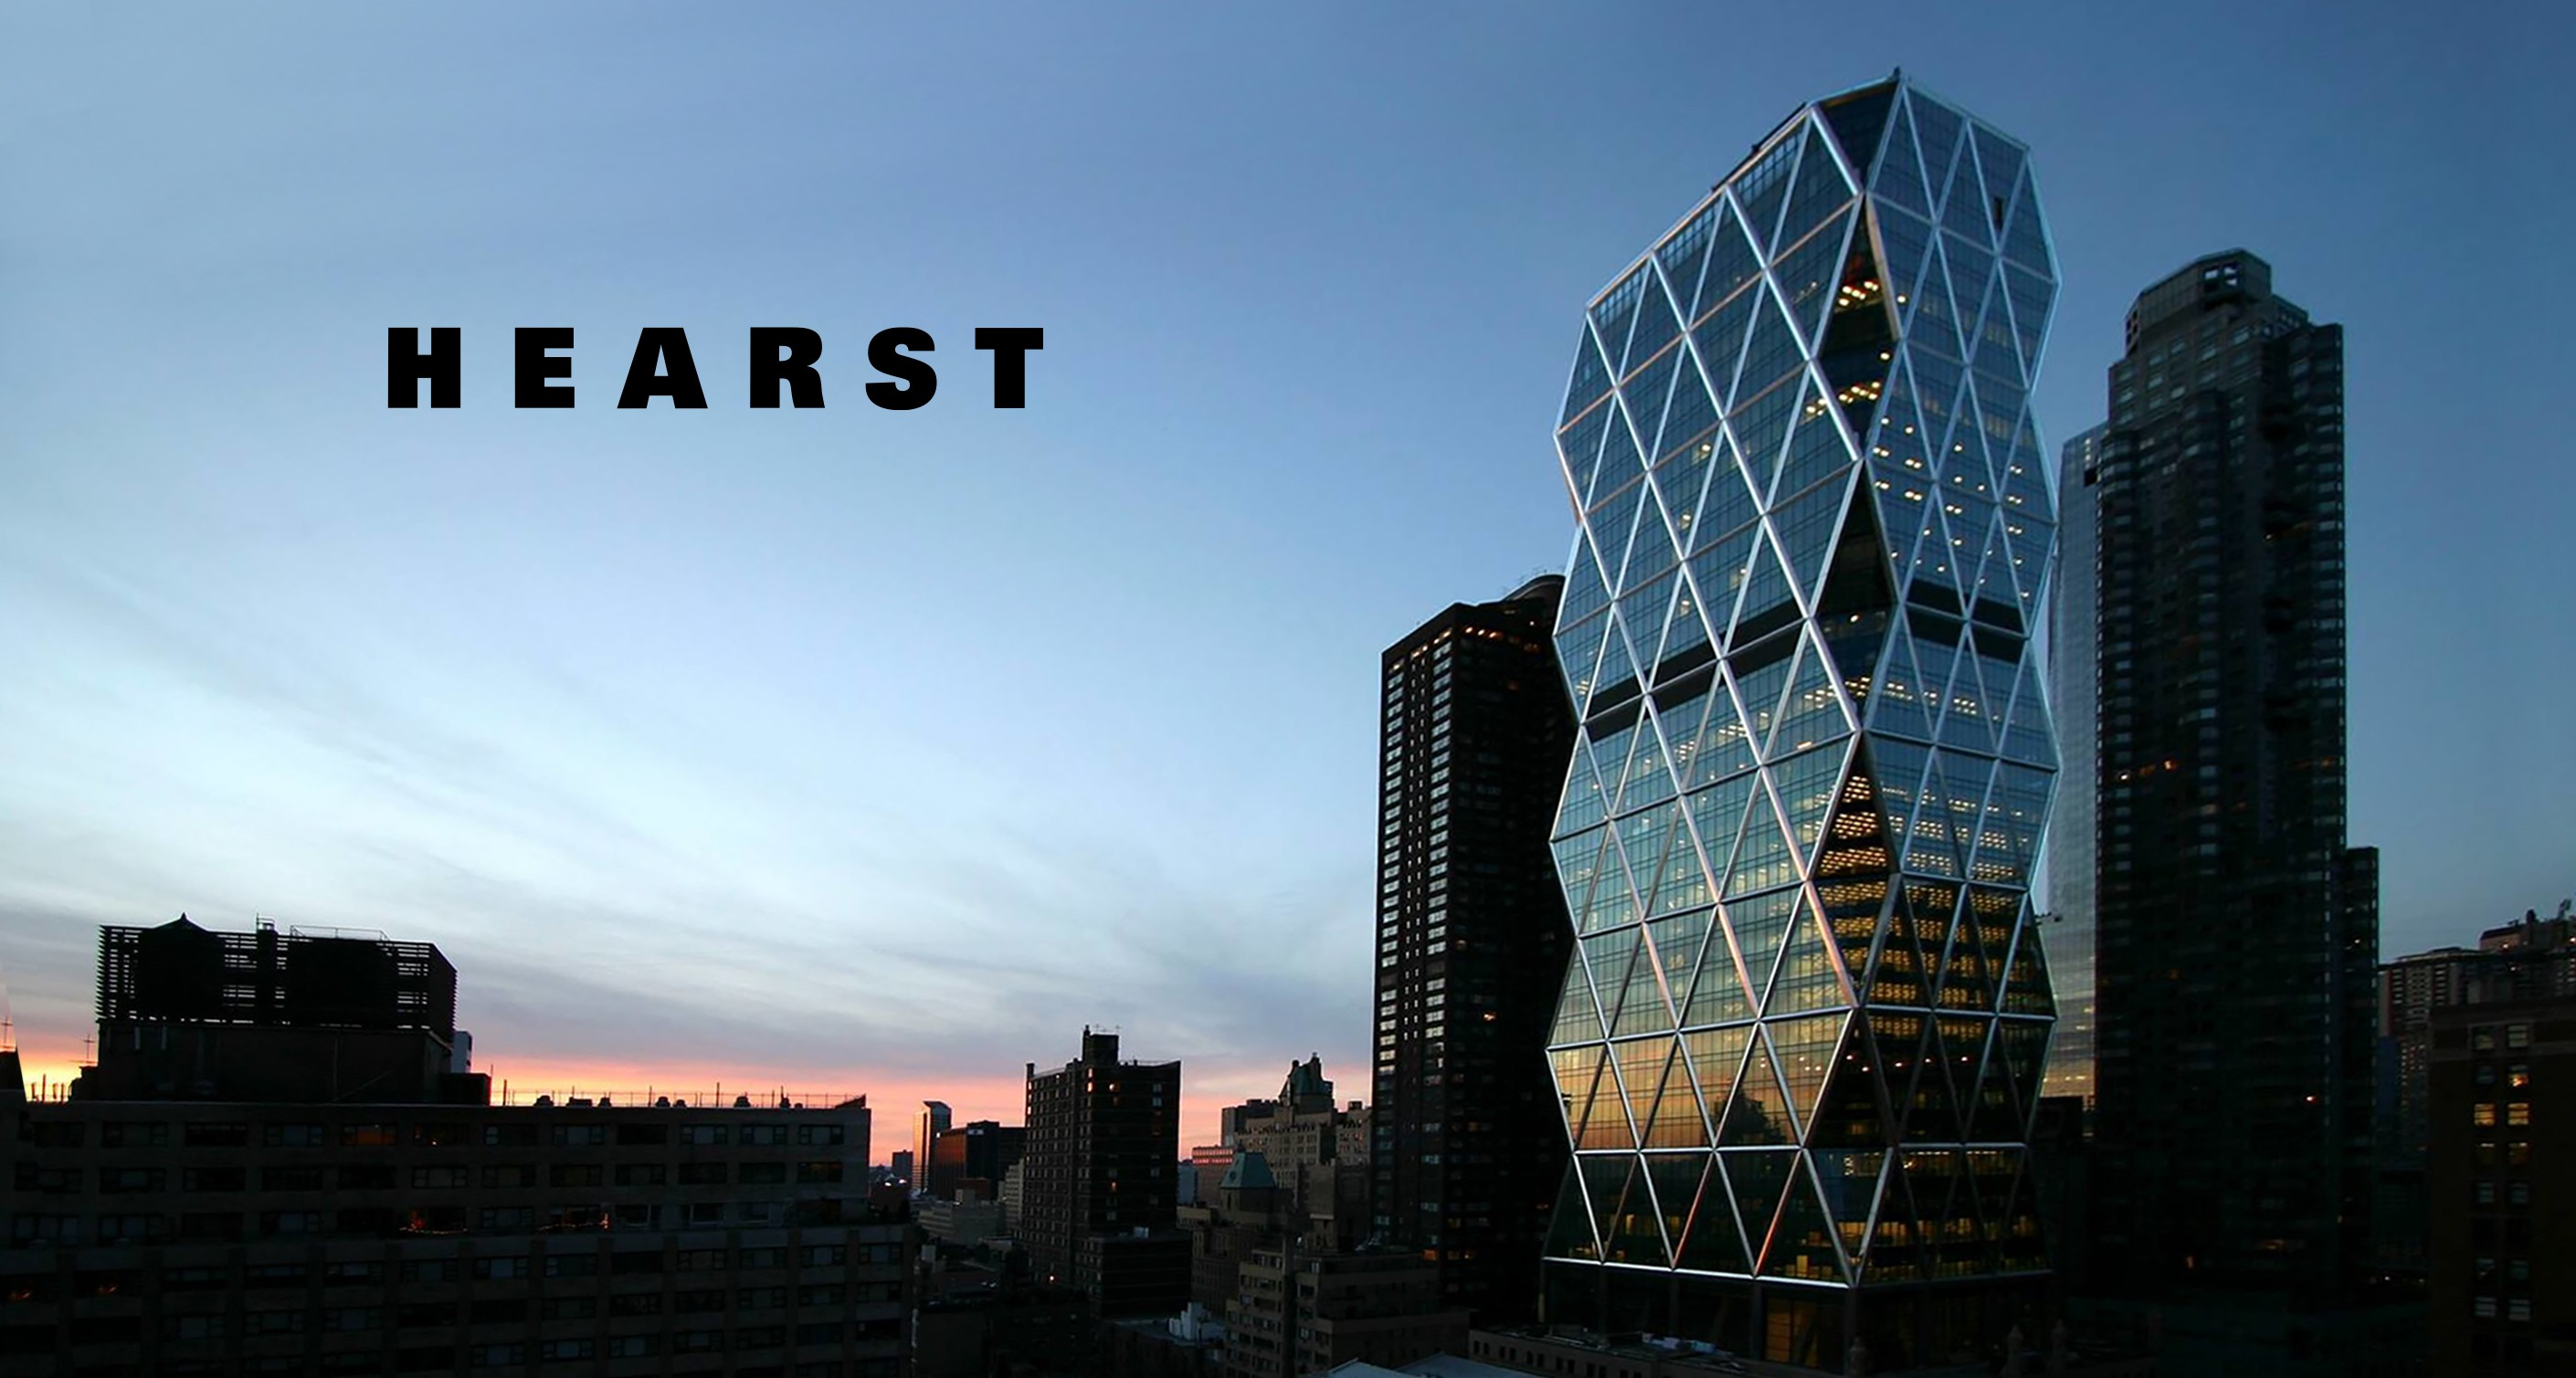

In [3]:
#Installing important libraries
# !pip install selenium
# !pip install pyspark==3.0.0
# !pip install boto3

#restart runtime after this

     |████████████████████████████████| 132 kB 8.0 MB/s 
     |████████████████████████████████| 8.7 MB 15.3 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 


In [2]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'IS Datathon Data')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np

In [2]:
metadata_images = pd.read_csv("metadata.csv")
remove_id =  pd.read_csv('remove_id.csv')

In [3]:
# metadata_images.columns

Index(['Record ID', 'File Name', 'Assignment ID', 'Year', 'Person', 'Keywords',
       'Creators', 'Date'],
      dtype='object')

In [7]:
# metadata_images.shape

(9299, 8)

In [3]:
metadata_images.head()

,Record ID,File Name,Assignment ID,Year,Person,Keywords,Creators,Date
0,207431327,HearstTransportation_CAMP_MontrealTeam.png,CPR6931p,NaN,Unidentified,"People @ Work,Hearst transportation,Transporta...",NaN,NaN
1,207431332,HearstTransportation_MicrosoftTeams_ZoomMeetin...,CPR6931p,NaN,"Unidentified,Don Dickson,Danya Bynoe,Varun Kum...","People @ Work,Hearst transportation,Transporta...",NaN,NaN
2,207431348,HearstTransportation_BlackBook_LauraWehunt_1.png,CPR6931p,NaN,Laura Wehunt,"People @ Work,Hearst transportation,Headshots,...",NaN,NaN
3,207431356,HearstTransportation_BlackBook_LauraWehunt_2.png,CPR6931p,NaN,Laura Wehunt,"People @ Work,Hearst transportation,Headshots,...",NaN,NaN
4,207432753,HearstMagazines_CDS_Employee.png,CPR6931p,NaN,Bryan Phillips,"People @ Work,CDS,Hearst Magazines,Hearst maga...",NaN,NaN


In [4]:
remove_id.head()

,Record ID
0,208769826
1,208769827
2,208770745
3,208770747
4,208770748


In [4]:
# remove_id.shape

(387, 1)

In [12]:
# 8912+387

9299

In [5]:
df = pd.merge(metadata_images, remove_id, on=['Record ID','Record ID'], how="outer", indicator=True)
df = df[df['_merge'] == 'left_only']

In [6]:
df =  df.reset_index(drop = True)

In [5]:
# import random

# a=np.random.randn(len(df))
# check=a<0.8
# training=df[check]
# testing=df[~check]

In [7]:
# training = training.reset_index(drop = True)
# testing = testing.reset_index(drop = True)

In [ ]:
# metadata_images.isnull().sum()

Record ID           0
File Name           0
Assignment ID    2830
Year              745
Person           1643
Keywords            0
Creators         5131
Date             9287
dtype: int64

In [ ]:
# metadata_images["Keywords"][0].split(",")

['People @ Work',
 'Hearst transportation',
 'Transportation',
 'Employee Image',
 'CAMP',
 'Hearst Transportation',
 'Career Site']

In [8]:
# training.head()

,Record ID,File Name,Assignment ID,Year,Person,Keywords,Creators,Date,_merge
0,207431327,HearstTransportation_CAMP_MontrealTeam.png,CPR6931p,NaN,Unidentified,"People @ Work,Hearst transportation,Transporta...",NaN,NaN,left_only
1,207431356,HearstTransportation_BlackBook_LauraWehunt_2.png,CPR6931p,NaN,Laura Wehunt,"People @ Work,Hearst transportation,Headshots,...",NaN,NaN,left_only
2,207432753,HearstMagazines_CDS_Employee.png,CPR6931p,NaN,Bryan Phillips,"People @ Work,CDS,Hearst Magazines,Hearst maga...",NaN,NaN,left_only
3,207432786,HearstMagazines_Value_WeEvolveWithPurpose.png,CPR6931p,NaN,NaN,"People @ Work,Hearst Magazines,Hearst magazine...",NaN,NaN,left_only
4,207432788,HearstMagazines_Value_hearst_galleries.png,CPR6931p,NaN,Unidentified,"People @ Work,Hearst Magazines,Hearst magazine...",NaN,NaN,left_only


In [7]:
all_categories = df["Keywords"].str.split(",").dropna().to_numpy()

In [8]:
unique_categories = np.unique(sum(all_categories,[]))

In [ ]:
# len(unique_categories)

1451

In [9]:
freq_categories = []
for i in all_categories:
  for element in i:
    freq_categories.append(element)


In [10]:
categories_df = pd.DataFrame(freq_categories)

In [11]:
categories_df.head(5)

,0
0,People @ Work
1,Hearst transportation
2,Transportation
3,Employee Image
4,CAMP


In [ ]:
# with pd.option_context('display.max_rows',None,
#                            'display.max_columns',None,
#                            'display.precision',3):
#   display(categories_df.value_counts().sort_values(ascending=False))

In [12]:
freq_cats_df = categories_df.value_counts().sort_values(ascending=False).to_frame()
freq_cats_df.columns = ["Freq"]
freq_cats_df.reset_index(inplace=True)
freq_cats_df.columns =["Category","Frequency"]

In [13]:
freq_cats_df.head(10)

,Category,Frequency
0,People @ Work,6777
1,Events,6468
2,44th Floor,2804
3,Texas,2090
4,Hearst Magazines,1535
5,Magazines,1418
6,FAB,1343
7,Frank Bennack,1336
8,2019,1313
9,2016,1240


In [14]:
filtered_category_name = list(freq_cats_df[freq_cats_df["Frequency"]<100]["Category"].unique())

In [15]:
len(filtered_category_name)

1252

In [55]:
# new_filtered_category_name

In [54]:
# len(new_filtered_category_name)

1327

In [16]:
metadata_df = df.copy(deep=True)

In [15]:
# filtered_category_name.append('People @ Work')
# filtered_category_name.append('Events')

In [17]:
test_set =set(filtered_category_name)
# test_set = set(['People @ Work','Events'])
# print(test_set)
for i in range(len(metadata_df['Keywords'])):
  categories = set(metadata_df['Keywords'][i].split(','))
  res = set(categories-test_set)
  # print(list(res))
  metadata_df['Keywords'][i] = list(res)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# import tensorflow as tf

# tf.test.gpu_device_name()

'/device:GPU:0'

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
import io
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
#!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS, ALSModel
from sklearn.model_selection import train_test_split
from functools import reduce
#upload functions.py
# !pip install selenium
# !pip install boto3
# restart kernal aftre installation

from functions import prepare_image, extract_features
import os
from tqdm import tqdm
from scipy.spatial.distance import cosine
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [19]:
use_category_name = list(freq_cats_df[freq_cats_df["Frequency"]>=100]["Category"].unique())

In [19]:
# use_category_name.remove('People @ Work')
# use_category_name.remove('Events')

In [20]:
use_category_name

['People @ Work',
 'Events',
 '44th Floor',
 'Texas',
 'Hearst Magazines',
 'Magazines',
 'FAB',
 'Frank Bennack',
 '2019',
 '2016',
 'Frank A. Bennack',
 '2021',
 '2018',
 'Friday',
 'Hearst Tower',
 'Thursday',
 '2013',
 'The Long Gray Line',
 'Homecoming',
 'Retreat',
 'Texas 2018',
 'Corporate',
 '2017',
 'Spotlight',
 'SRS',
 'Headshots',
 'Portraits',
 'Awards',
 'Steven R. Swartz',
 'Steve Swartz',
 'Annual',
 'Hearst magazines',
 'Executives',
 'Alfred E. Smith Memorial Foundation',
 'Al Smith Dinner',
 'Alfred E. Smith Memorial Foundation Dinner',
 'Dinners',
 'Al Smith Dinner 2021',
 'Archdiocese of New York',
 'Catholic charities',
 'Charities',
 'Texas 2016',
 'Editorial Excellence',
 'magazines',
 'Texas 2017',
 'Gil Maurer',
 'GCM',
 'Texas 2019',
 'Masterclass',
 'Gilbert C. Maurer',
 'Spotlight 2016',
 'Tower Gala',
 'Leave Something on the Table',
 'Photography',
 'Hearst Real Estate',
 'Real Estate',
 'Annual Review',
 '135',
 'Joseph Urban Theater',
 'Hearst Ranch',


In [21]:
hashtag_lookup = {hashtag: i for i, hashtag in enumerate(use_category_name)}

In [22]:
hashtag_rec_data = []
for i in metadata_df.index:
    hashtag_list = metadata_df.loc[i, 'Keywords']
    for hashtag in hashtag_list:
        hashtag_rec_data.append(
            {'image_id': i,
             'hashtag_id': hashtag_lookup[hashtag],
             'rating': 1}
        )
hashtag_rec_data = pd.DataFrame(hashtag_rec_data)
hashtag_rec_data.tail()

,image_id,hashtag_id,rating
64076,8911,28,1
64077,8911,29,1
64078,8911,25,1
64079,8911,24,1
64080,8911,26,1


#Creating our Neural Network

In [23]:
img_shape = (160, 160, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

neural_network = tf.keras.Sequential([
  base_model,
  global_average_layer,
])


9420800/9406464 [==============================] - 0s 0us/step


####Neural networks require very specifically and consistently formatted image data. In the code cell below we build a list of dictionaries each describing one picture: the file name, the (main) hashtag, and of course the image data itself (represented using a TensorFlow "EagerTensor" type).

In [24]:
metadata_df = metadata_df[metadata_df["Keywords"].str.len() != 0]

In [25]:
metadata_df['Search_Keywords'] = metadata_df['Keywords'].str[0]

In [26]:
!unzip gdrive/MyDrive/Colab\ Notebooks/IS\ Datathon\ Data/images-20220409T194454Z-001 

Streaming output truncated to the last 5000 lines.
  inflating: images/207913702.jpg    
  inflating: images/207913690.jpg    
  inflating: images/207913692.jpg    
  inflating: images/207913694.jpg    
  inflating: images/207913682.jpg    
  inflating: images/207913697.jpg    
  inflating: images/207913700.jpg    
  inflating: images/207913701.jpg    
  inflating: images/207913705.jpg    
  inflating: images/207913696.jpg    
  inflating: images/207913693.jpg    
  inflating: images/207913698.jpg    
  inflating: images/207913678.jpg    
  inflating: images/207913699.jpg    
  inflating: images/207913685.jpg    
  inflating: images/207913695.jpg    
  inflating: images/207913684.jpg    
  inflating: images/207913689.jpg    
  inflating: images/207913688.jpg    
  inflating: images/207913687.jpg    
  inflating: images/207913706.jpg    
  inflating: images/207913703.jpg    
  inflating: images/207902708.jpg    
  inflating: images/207913704.jpg    
  inflating: images/207913686.jpg    

In [27]:
pics = []

for i, row in tqdm(metadata_df.iloc[:6500].iterrows()):
  name = row["Record ID"]
  hashtag = row['Search_Keywords']
  img_path = f'images/{name}'+'.jpg'
  print(img_path)
  try:
    img = prepare_image(img_path,where='local')
    deep_features = extract_features(img,neural_network)
    pics.append({'pic':img,
                 'hashtag':hashtag,
                 'name':name,
                 'deep_features':deep_features})
  except Exception as e:
    error_type = type(e).__name__
    if error_type =="NotFoundError":
      pass
    else:
      print(e)

0it [00:00, ?it/s]

images/207431327.jpg


3it [00:01,  2.41it/s]

images/207431332.jpg
images/207431348.jpg
images/207431356.jpg


5it [00:01,  4.05it/s]

images/207432753.jpg
images/207432784.jpg
images/207432786.jpg


9it [00:02,  7.09it/s]

images/207432788.jpg
images/207432796.jpg
images/207432797.jpg


11it [00:02,  8.23it/s]

images/207432881.jpg
images/207432894.jpg
images/207432937.jpg


15it [00:02,  9.84it/s]

images/207432942.jpg
images/207432947.jpg
images/207432949.jpg


17it [00:02, 10.18it/s]

images/207891158.jpg
images/207921642.jpg
images/207921643.jpg


21it [00:03, 11.16it/s]

images/207921644.jpg
images/207921645.jpg
images/207921646.jpg


23it [00:03, 11.06it/s]

images/207921647.jpg
images/207921648.jpg
images/207921649.jpg


27it [00:03, 11.33it/s]

images/207921650.jpg
images/207921651.jpg
images/207921652.jpg


29it [00:03, 11.37it/s]

images/207921653.jpg
images/207921654.jpg
images/207921655.jpg


33it [00:04, 11.69it/s]

images/207921656.jpg
images/207921657.jpg
images/207921658.jpg


35it [00:04, 11.76it/s]

images/207921659.jpg
images/207921660.jpg
images/207921661.jpg


39it [00:04, 12.17it/s]

images/207921662.jpg
images/207921663.jpg
images/207921664.jpg


41it [00:04, 12.14it/s]

images/207921665.jpg
images/207921666.jpg
images/207921667.jpg


45it [00:05, 12.05it/s]

images/207921668.jpg
images/207921669.jpg
images/207921670.jpg


47it [00:05, 12.08it/s]

images/207921671.jpg
images/207921672.jpg
images/207921673.jpg


51it [00:05, 12.35it/s]

images/207921974.jpg
images/207921994.jpg
images/207921995.jpg


53it [00:05, 12.20it/s]

images/207921996.jpg
images/207921997.jpg
images/207993765.jpg


57it [00:06, 12.50it/s]

images/207993767.jpg
images/207993773.jpg
images/207993776.jpg


59it [00:06, 12.44it/s]

images/207993778.jpg
images/207993781.jpg
images/207993784.jpg


63it [00:06, 12.21it/s]

images/207993797.jpg
images/207993798.jpg
images/207993803.jpg


65it [00:06, 12.18it/s]

images/208008747.jpg
images/208008785.jpg
images/208059211.jpg


69it [00:07, 12.21it/s]

images/208707856.jpg
images/208707857.jpg
images/208707858.jpg


71it [00:07, 12.03it/s]

images/208707859.jpg
images/208707860.jpg
images/208707861.jpg


75it [00:07, 12.08it/s]

images/208707862.jpg
images/208707863.jpg
images/208707864.jpg


77it [00:07, 12.07it/s]

images/208707865.jpg
images/208707866.jpg
images/208713839.jpg


81it [00:08, 12.02it/s]

images/208733451.jpg
images/208735433.jpg
images/208755804.jpg


83it [00:08, 12.09it/s]

images/208759351.jpg
images/208759824.jpg
images/208759825.jpg


87it [00:08, 11.86it/s]

images/208759826.jpg
images/208759827.jpg
images/208759828.jpg


89it [00:08, 12.17it/s]

images/208759829.jpg
images/208759830.jpg
images/208759831.jpg


93it [00:09, 12.44it/s]

images/208759832.jpg
images/208759833.jpg
images/208759834.jpg


95it [00:09, 12.19it/s]

images/208759835.jpg
images/208759836.jpg
images/208759837.jpg


99it [00:09, 11.97it/s]

images/208759838.jpg
images/208759839.jpg
images/208759840.jpg


101it [00:09, 11.87it/s]

images/208759841.jpg
images/208759842.jpg
images/208759843.jpg


105it [00:10, 11.97it/s]

images/208759844.jpg
images/208759845.jpg
images/208759846.jpg


107it [00:10, 11.62it/s]

images/208759847.jpg
images/208759848.jpg
images/208759849.jpg


111it [00:10, 11.68it/s]

images/208759850.jpg
images/208759851.jpg
images/208759852.jpg


113it [00:10, 11.67it/s]

images/208759853.jpg
images/208759854.jpg
images/208759855.jpg


117it [00:11, 11.65it/s]

images/208759856.jpg
images/208759857.jpg
images/208759858.jpg


119it [00:11, 11.59it/s]

images/208759859.jpg
images/208759860.jpg
images/208759861.jpg


123it [00:11, 11.24it/s]

images/208759862.jpg
images/208759863.jpg
images/208759864.jpg


125it [00:11, 11.47it/s]

images/208759865.jpg
images/208759866.jpg
images/208759867.jpg


129it [00:12, 11.91it/s]

images/208759868.jpg
images/208759869.jpg
images/208759870.jpg


131it [00:12, 11.69it/s]

images/208759871.jpg
images/208759872.jpg
images/208759873.jpg


135it [00:12, 11.79it/s]

images/208759874.jpg
images/208759875.jpg
images/208759876.jpg


137it [00:12, 11.83it/s]

images/208759877.jpg
images/208759878.jpg
images/208759879.jpg


141it [00:13, 11.70it/s]

images/208759880.jpg
images/208759881.jpg
images/208759882.jpg


143it [00:13, 11.46it/s]

images/208759883.jpg
images/208759884.jpg
images/208759885.jpg


147it [00:13, 11.76it/s]

images/208759886.jpg
images/208759887.jpg
images/208759888.jpg


149it [00:13, 11.89it/s]

images/208759889.jpg
images/208759890.jpg
images/208759891.jpg


153it [00:14, 11.21it/s]

images/208759892.jpg
images/208759893.jpg
images/208759894.jpg


155it [00:14, 11.29it/s]

images/208759895.jpg
images/208759896.jpg
images/208759897.jpg


159it [00:14, 11.52it/s]

images/208759898.jpg
images/208759899.jpg
images/208759900.jpg


161it [00:14, 11.34it/s]

images/208759901.jpg
images/208759902.jpg
images/208759903.jpg


165it [00:15, 11.59it/s]

images/208759904.jpg
images/208759905.jpg
images/208759906.jpg


167it [00:15, 11.56it/s]

images/208759907.jpg
images/208759908.jpg
images/208759909.jpg


171it [00:15, 11.53it/s]

images/208759910.jpg
images/208759911.jpg
images/208759912.jpg


173it [00:15, 11.82it/s]

images/208759913.jpg
images/208759914.jpg
images/208759915.jpg


177it [00:16, 12.03it/s]

images/208759916.jpg
images/208759917.jpg
images/208759918.jpg


179it [00:16, 11.85it/s]

images/208759919.jpg
images/208759920.jpg
images/208759921.jpg


183it [00:16, 12.22it/s]

images/208759922.jpg
images/208759923.jpg
images/208759924.jpg


185it [00:16, 12.35it/s]

images/208759925.jpg
images/208759926.jpg
images/208759927.jpg


189it [00:17, 11.72it/s]

images/208759928.jpg
images/208759929.jpg
images/208759930.jpg


191it [00:17, 11.85it/s]

images/208759931.jpg
images/208759932.jpg
images/208759933.jpg


193it [00:17, 11.99it/s]

images/208759934.jpg
images/208759935.jpg


195it [00:17, 10.14it/s]

images/208759936.jpg


197it [00:18,  7.80it/s]

images/208759937.jpg
images/208759938.jpg
images/208759939.jpg


201it [00:18,  9.59it/s]

images/208759940.jpg
images/208759941.jpg
images/208759942.jpg
images/208759943.jpg


203it [00:18,  8.16it/s]

images/208759944.jpg


206it [00:19,  8.12it/s]

images/208759945.jpg
images/208759946.jpg
images/208759947.jpg


208it [00:19,  8.86it/s]

images/208759948.jpg
images/208759949.jpg
images/208759950.jpg


210it [00:19,  9.39it/s]

images/208760342.jpg


212it [00:20,  6.74it/s]

images/208760397.jpg
images/208760399.jpg


214it [00:20,  8.07it/s]

images/208762615.jpg
images/208762616.jpg
images/208762617.jpg


218it [00:20,  9.68it/s]

images/208762618.jpg
images/208762619.jpg
images/208762620.jpg


220it [00:20,  9.93it/s]

images/208762621.jpg
images/208762622.jpg
images/208762623.jpg


224it [00:21, 10.74it/s]

images/208762624.jpg
images/208762625.jpg
images/208762626.jpg


226it [00:21, 11.09it/s]

images/208762627.jpg
images/208762628.jpg
images/208762629.jpg


230it [00:21, 11.38it/s]

images/208762630.jpg
images/208762631.jpg
images/208762632.jpg


232it [00:21, 11.60it/s]

images/208762633.jpg
images/208762634.jpg
images/208762635.jpg


236it [00:22, 11.62it/s]

images/208762636.jpg
images/208762637.jpg
images/208762638.jpg


238it [00:22, 11.48it/s]

images/208762639.jpg
images/208762640.jpg
images/208762641.jpg


242it [00:22, 11.69it/s]

images/208762642.jpg
images/208762644.jpg
images/208762645.jpg


244it [00:22, 11.87it/s]

images/208762646.jpg
images/208762647.jpg
images/208762648.jpg


248it [00:23, 11.42it/s]

images/208762649.jpg
images/208762650.jpg
images/208762651.jpg


250it [00:23, 11.43it/s]

images/208762652.jpg
images/208762653.jpg
images/208762654.jpg


254it [00:23, 11.52it/s]

images/208762655.jpg
images/208762656.jpg
images/208762657.jpg


256it [00:23, 11.58it/s]

images/208762658.jpg
images/208762660.jpg
images/208762661.jpg


260it [00:24, 11.61it/s]

images/208762662.jpg
images/208762663.jpg
images/208762664.jpg


262it [00:24, 11.88it/s]

images/208764347.jpg
images/208764348.jpg
images/208764349.jpg


266it [00:24, 12.14it/s]

images/208765518.jpg
images/208765593.jpg
images/208765594.jpg


268it [00:24, 11.97it/s]

images/208765595.jpg
images/208765596.jpg
images/208766356.jpg


272it [00:25, 11.67it/s]

images/208766358.jpg
images/208766368.jpg
images/208766370.jpg


274it [00:25, 11.49it/s]

images/208766371.jpg
images/208766413.jpg
images/208766414.jpg


278it [00:25, 11.77it/s]

images/208766424.jpg
images/208766425.jpg
images/208766426.jpg


280it [00:25, 11.98it/s]

images/208766427.jpg
images/208766463.jpg
images/208766464.jpg


284it [00:26, 11.50it/s]

images/208767268.jpg
images/208767269.jpg
images/208767271.jpg


286it [00:26, 11.66it/s]

images/208767272.jpg
images/208767273.jpg
images/208767274.jpg


290it [00:26, 11.97it/s]

images/208767275.jpg
images/208767276.jpg
images/208767277.jpg


292it [00:26, 12.13it/s]

images/208767278.jpg
images/208767279.jpg
images/208767280.jpg


296it [00:27, 11.97it/s]

images/208767281.jpg
images/208767282.jpg
images/208767283.jpg


298it [00:27, 11.78it/s]

images/208768303.jpg
images/208768304.jpg
images/208768305.jpg


302it [00:27, 12.03it/s]

images/208768306.jpg
images/208768307.jpg
images/208768308.jpg


304it [00:27, 12.15it/s]

images/208768309.jpg
images/208768310.jpg
images/208768311.jpg


308it [00:28, 11.73it/s]

images/208768312.jpg
images/208768313.jpg
images/208768314.jpg


310it [00:28, 11.82it/s]

images/208768315.jpg
images/208768316.jpg
images/208768317.jpg


314it [00:28, 12.17it/s]

images/208768318.jpg
images/208768319.jpg
images/208768320.jpg


316it [00:29, 12.11it/s]

images/208768321.jpg
images/208768322.jpg
images/208768323.jpg


320it [00:29, 11.56it/s]

images/208768324.jpg
images/208768325.jpg
images/208768326.jpg


322it [00:29, 11.55it/s]

images/208768327.jpg
images/208768328.jpg
images/208768329.jpg


326it [00:29, 12.00it/s]

images/208768330.jpg
images/208768332.jpg
images/208768333.jpg


328it [00:30, 11.95it/s]

images/208768334.jpg
images/208768335.jpg
images/208768336.jpg


332it [00:30, 11.93it/s]

images/208768337.jpg
images/208768338.jpg
images/208768339.jpg


334it [00:30, 11.92it/s]

images/208768340.jpg
images/208768341.jpg
images/208768342.jpg


338it [00:30, 12.04it/s]

images/208768343.jpg
images/208768344.jpg
images/208768345.jpg


340it [00:31, 11.91it/s]

images/208768346.jpg
images/208768347.jpg
images/208768348.jpg


344it [00:31, 11.96it/s]

images/208768349.jpg
images/208768350.jpg
images/208768351.jpg


346it [00:31, 11.82it/s]

images/208768352.jpg
images/208768353.jpg
images/208768354.jpg


350it [00:31, 11.95it/s]

images/208768355.jpg
images/208768356.jpg
images/208768357.jpg


352it [00:32, 11.98it/s]

images/208768358.jpg
images/208768359.jpg
images/208768360.jpg


356it [00:32, 11.81it/s]

images/208768361.jpg
images/208768362.jpg
images/208768363.jpg


358it [00:32, 11.50it/s]

images/208768364.jpg
images/208768365.jpg
images/208768366.jpg


362it [00:32, 11.79it/s]

images/208768367.jpg
images/208768368.jpg
images/208768369.jpg


364it [00:33, 11.83it/s]

images/208768370.jpg
images/208768371.jpg
images/208768372.jpg


368it [00:33, 11.86it/s]

images/208768373.jpg
images/208768374.jpg
images/208768375.jpg


370it [00:33, 11.44it/s]

images/208768376.jpg
images/208768377.jpg
images/208768378.jpg


374it [00:33, 11.71it/s]

images/208768379.jpg
images/208768380.jpg
images/208768381.jpg


376it [00:34, 11.50it/s]

images/208768382.jpg
images/208768383.jpg
images/208768384.jpg


380it [00:34, 11.70it/s]

images/208768385.jpg
images/208768386.jpg
images/208768387.jpg


382it [00:34, 11.49it/s]

images/208768388.jpg
images/208768389.jpg
images/208768390.jpg


386it [00:34, 11.85it/s]

images/208768391.jpg
images/208768392.jpg
images/208768393.jpg


388it [00:35, 11.65it/s]

images/208768394.jpg
images/208768395.jpg
images/208768396.jpg


392it [00:35, 11.67it/s]

images/208768397.jpg
images/208768398.jpg
images/208768399.jpg


394it [00:35, 11.70it/s]

images/208768400.jpg
images/208768401.jpg
images/208768402.jpg


398it [00:35, 12.03it/s]

images/208768403.jpg
images/208768404.jpg
images/208768405.jpg


400it [00:36, 11.90it/s]

images/208768406.jpg
images/208768407.jpg
images/208768408.jpg


404it [00:36, 12.18it/s]

images/208769237.jpg
images/208769240.jpg
images/208769241.jpg


406it [00:36, 11.87it/s]

images/208769828.jpg
images/208770746.jpg
images/208770752.jpg


410it [00:36, 12.30it/s]

images/208770756.jpg
images/208771585.jpg
images/208771599.jpg


412it [00:37, 12.41it/s]

images/208771600.jpg
images/208771610.jpg
images/208771611.jpg


416it [00:37, 12.26it/s]

images/208772119.jpg
images/208772145.jpg
images/208772149.jpg


418it [00:37, 11.80it/s]

images/208772150.jpg
images/208772151.jpg
images/208772157.jpg


422it [00:37, 12.20it/s]

images/208772158.jpg
images/208776805.jpg
images/208776806.jpg


424it [00:38, 11.99it/s]

images/208776807.jpg
images/208776808.jpg
images/208779819.jpg


428it [00:38, 12.00it/s]

images/208779820.jpg
images/208782576.jpg
images/208782931.jpg


430it [00:38, 11.69it/s]

images/208782932.jpg
images/208782933.jpg
images/208782934.jpg


434it [00:38, 12.15it/s]

images/208782935.jpg
images/208782936.jpg
images/208782938.jpg


436it [00:39, 11.60it/s]

images/208782939.jpg
images/208782940.jpg
images/208782941.jpg


440it [00:39, 11.92it/s]

images/208782942.jpg
images/208782943.jpg
images/208782944.jpg


442it [00:39, 11.74it/s]

images/208782945.jpg
images/208782946.jpg
images/208782947.jpg


446it [00:40, 11.68it/s]

images/208782948.jpg
images/208782949.jpg
images/208782950.jpg


448it [00:40, 11.64it/s]

images/208782951.jpg
images/208782952.jpg
images/208782953.jpg


452it [00:40, 11.91it/s]

images/208782954.jpg
images/208782955.jpg
images/208782956.jpg


454it [00:40, 11.98it/s]

images/208782957.jpg
images/208782959.jpg
images/208782960.jpg


458it [00:41, 12.07it/s]

images/208782961.jpg
images/208782962.jpg
images/208782963.jpg


460it [00:41, 11.87it/s]

images/208782964.jpg
images/208782965.jpg
images/208782966.jpg


464it [00:41, 11.60it/s]

images/208782967.jpg
images/208782968.jpg
images/208782969.jpg


466it [00:41, 11.30it/s]

images/208782970.jpg
images/208782971.jpg
images/208782972.jpg


470it [00:42, 12.01it/s]

images/208782973.jpg
images/208782975.jpg
images/208782976.jpg


472it [00:42, 11.74it/s]

images/208782977.jpg
images/208782978.jpg
images/208782979.jpg


476it [00:42, 11.79it/s]

images/208782980.jpg
images/208782981.jpg
images/208782982.jpg


478it [00:42, 11.44it/s]

images/208782983.jpg
images/208782984.jpg
images/208782985.jpg


482it [00:43, 11.67it/s]

images/208782986.jpg
images/208782987.jpg
images/208782988.jpg


484it [00:43, 11.72it/s]

images/208782989.jpg
images/208782990.jpg
images/208782991.jpg


488it [00:43, 11.69it/s]

images/208782992.jpg
images/208782993.jpg
images/208782994.jpg


490it [00:43, 11.66it/s]

images/208782995.jpg
images/208782996.jpg
images/208782997.jpg


494it [00:44, 11.67it/s]

images/208782998.jpg
images/208782999.jpg
images/208783000.jpg


496it [00:44, 11.57it/s]

images/208783001.jpg
images/208783002.jpg
images/208783003.jpg


500it [00:44, 11.87it/s]

images/208783004.jpg
images/208783005.jpg
images/208783006.jpg


502it [00:44, 11.62it/s]

images/208783007.jpg
images/208783008.jpg
images/208783009.jpg


506it [00:45, 11.92it/s]

images/208783010.jpg
images/208783011.jpg
images/208783012.jpg


508it [00:45, 11.72it/s]

images/208783013.jpg
images/208783014.jpg
images/208783015.jpg


512it [00:45, 11.98it/s]

images/208783016.jpg
images/208783018.jpg
images/208783019.jpg


514it [00:45, 11.71it/s]

images/208783020.jpg
images/208783021.jpg
images/208783022.jpg


518it [00:46, 11.84it/s]

images/208783024.jpg
images/208783025.jpg
images/208783026.jpg


520it [00:46, 11.83it/s]

images/208783027.jpg
images/208783028.jpg
images/208783029.jpg


524it [00:46, 11.76it/s]

images/208783030.jpg
images/208783031.jpg
images/208783032.jpg


526it [00:46, 11.68it/s]

images/208783033.jpg
images/208783034.jpg
images/208783035.jpg


530it [00:47, 12.00it/s]

images/208783036.jpg
images/208783037.jpg
images/208783038.jpg


532it [00:47, 11.66it/s]

images/208783039.jpg
images/208783040.jpg
images/208783041.jpg


536it [00:47, 11.79it/s]

images/208783042.jpg
images/208783043.jpg
images/208783044.jpg


538it [00:47, 11.62it/s]

images/208783045.jpg
images/208783046.jpg
images/208783047.jpg


542it [00:48, 12.06it/s]

images/208783048.jpg
images/208783049.jpg
images/208783050.jpg


544it [00:48, 11.64it/s]

images/208783051.jpg
images/208783052.jpg
images/208783053.jpg


548it [00:48, 12.09it/s]

images/208783054.jpg
images/208783055.jpg
images/208783056.jpg


550it [00:48, 12.04it/s]

images/208783057.jpg
images/208783058.jpg
images/208783059.jpg


554it [00:49, 12.22it/s]

images/208783060.jpg
images/208783061.jpg
images/208783062.jpg


556it [00:49, 12.15it/s]

images/208783063.jpg
images/208783064.jpg
images/208783065.jpg


560it [00:49, 11.93it/s]

images/208783066.jpg
images/208783067.jpg
images/208783068.jpg


562it [00:49, 11.83it/s]

images/208783069.jpg
images/208783070.jpg
images/208783071.jpg


566it [00:50, 11.98it/s]

images/208783072.jpg
images/208783073.jpg
images/208783074.jpg


568it [00:50, 12.11it/s]

images/208783075.jpg
images/208783076.jpg
images/208783077.jpg


572it [00:50, 11.84it/s]

images/208783078.jpg
images/208783079.jpg
images/208783080.jpg


574it [00:50, 11.70it/s]

images/208783081.jpg
images/208783082.jpg
images/208783083.jpg


578it [00:51, 12.00it/s]

images/208783084.jpg
images/208783085.jpg
images/208783086.jpg


580it [00:51, 11.88it/s]

images/208783087.jpg
images/208783088.jpg
images/208783089.jpg


584it [00:51, 11.84it/s]

images/208783113.jpg
images/208783114.jpg
images/208783115.jpg


586it [00:51, 11.65it/s]

images/208783116.jpg
images/208783117.jpg


588it [00:52, 11.16it/s]

images/208783118.jpg
images/208783119.jpg
images/208783120.jpg


592it [00:52, 11.57it/s]

images/208783121.jpg
images/208783122.jpg
images/208783123.jpg


594it [00:52, 11.54it/s]

images/208783124.jpg
images/208783125.jpg
images/208783126.jpg


598it [00:52, 11.70it/s]

images/208783127.jpg
images/208783128.jpg
images/208783129.jpg


600it [00:53, 11.63it/s]

images/208783130.jpg
images/208783131.jpg
images/208783132.jpg


604it [00:53, 11.78it/s]

images/208783133.jpg
images/208783134.jpg
images/208783135.jpg


606it [00:53, 11.84it/s]

images/208783136.jpg
images/208783137.jpg
images/208783138.jpg


610it [00:53, 11.56it/s]

images/208783139.jpg
images/208783140.jpg
images/208783141.jpg


612it [00:54, 11.45it/s]

images/208783142.jpg
images/208783143.jpg
images/208783144.jpg


616it [00:54,  8.41it/s]

images/208783145.jpg
images/208783146.jpg
images/208783147.jpg


618it [00:54,  9.09it/s]

images/208783148.jpg
images/208783149.jpg
images/208783150.jpg


622it [00:55, 10.22it/s]

images/208783151.jpg
images/208783152.jpg
images/208783153.jpg


624it [00:55, 10.50it/s]

images/208783154.jpg
images/208783155.jpg
images/208783156.jpg


628it [00:55, 11.05it/s]

images/208783157.jpg
images/208783158.jpg
images/208783159.jpg


630it [00:56, 11.13it/s]

images/208783160.jpg
images/208783161.jpg
images/208783162.jpg


634it [00:56, 11.52it/s]

images/208783163.jpg
images/208783164.jpg
images/208783165.jpg


636it [00:56, 11.50it/s]

images/208783166.jpg
images/208783167.jpg
images/208783168.jpg


640it [00:56, 12.04it/s]

images/208783169.jpg
images/208783170.jpg
images/208783171.jpg


642it [00:57, 11.73it/s]

images/208783172.jpg
images/208783173.jpg
images/208783174.jpg


646it [00:57, 11.77it/s]

images/208783175.jpg
images/208783176.jpg
images/208783177.jpg


648it [00:57, 11.73it/s]

images/208783178.jpg
images/208783179.jpg
images/208783180.jpg


652it [00:57, 11.86it/s]

images/208783181.jpg
images/208783182.jpg
images/208783183.jpg


654it [00:58, 11.81it/s]

images/208783184.jpg
images/208783185.jpg
images/208783186.jpg


658it [00:58, 11.85it/s]

images/208783187.jpg
images/208783188.jpg
images/208783189.jpg


660it [00:58, 11.94it/s]

images/208783190.jpg
images/208783191.jpg
images/208783192.jpg


664it [00:58, 12.12it/s]

images/208783193.jpg
images/208783194.jpg
images/208783195.jpg


666it [00:59, 11.95it/s]

images/208783196.jpg
images/208783197.jpg
images/208783198.jpg


670it [00:59, 11.89it/s]

images/208783199.jpg
images/208783200.jpg
images/208783201.jpg


672it [00:59, 11.66it/s]

images/208783202.jpg
images/208783203.jpg
images/208783204.jpg


676it [00:59, 11.87it/s]

images/208783205.jpg
images/208783206.jpg
images/208783207.jpg


678it [01:00, 11.61it/s]

images/208783208.jpg
images/208783209.jpg
images/208783210.jpg


682it [01:00, 11.77it/s]

images/208783211.jpg
images/208783212.jpg
images/208783213.jpg


684it [01:00, 11.83it/s]

images/208783214.jpg
images/208783215.jpg
images/208783216.jpg


688it [01:00, 12.13it/s]

images/208783217.jpg
images/208783218.jpg
images/208783219.jpg


690it [01:01, 11.95it/s]

images/208783220.jpg
images/208783221.jpg
images/208783222.jpg


694it [01:01, 11.43it/s]

images/208783223.jpg
images/208783224.jpg
images/208783225.jpg


696it [01:01, 11.36it/s]

images/208783226.jpg
images/208783227.jpg
images/208783228.jpg


700it [01:01, 11.65it/s]

images/208783229.jpg
images/208783230.jpg
images/208783231.jpg


702it [01:02, 11.18it/s]

images/208783232.jpg
images/208783233.jpg
images/208783234.jpg


706it [01:02, 11.64it/s]

images/208783235.jpg
images/208783236.jpg
images/208783237.jpg


708it [01:02, 11.63it/s]

images/208783238.jpg
images/208783239.jpg
images/208783240.jpg


712it [01:02, 11.86it/s]

images/208783241.jpg
images/208783242.jpg
images/208783243.jpg


714it [01:03, 11.75it/s]

images/208783244.jpg
images/208783245.jpg
images/208783246.jpg


718it [01:03, 11.82it/s]

images/208783247.jpg
images/208783248.jpg
images/208783249.jpg


720it [01:03, 11.86it/s]

images/208783250.jpg
images/208783251.jpg
images/208783252.jpg


724it [01:03, 12.06it/s]

images/208783253.jpg
images/208783254.jpg
images/208783255.jpg


726it [01:04, 11.73it/s]

images/208783256.jpg
images/208783257.jpg
images/208783258.jpg


730it [01:04, 11.68it/s]

images/208783259.jpg
images/208783260.jpg
images/208783261.jpg


732it [01:04, 11.77it/s]

images/208783262.jpg
images/208783263.jpg
images/208783264.jpg


736it [01:05, 12.10it/s]

images/208783265.jpg
images/208783266.jpg
images/208783267.jpg


738it [01:05, 11.71it/s]

images/208783268.jpg
images/208783269.jpg
images/208783270.jpg


742it [01:05, 11.70it/s]

images/208783271.jpg
images/208783272.jpg
images/208783273.jpg


744it [01:05, 11.75it/s]

images/208783274.jpg
images/208783275.jpg
images/208783276.jpg


748it [01:06, 11.96it/s]

images/208783277.jpg
images/208783278.jpg
images/208783279.jpg


750it [01:06, 11.56it/s]

images/208783280.jpg
images/208783281.jpg
images/208783282.jpg


754it [01:06, 11.62it/s]

images/208783283.jpg
images/208783284.jpg
images/208783285.jpg


756it [01:06, 11.80it/s]

images/208783286.jpg
images/208783287.jpg
images/208783288.jpg


760it [01:07, 11.89it/s]

images/208783289.jpg
images/208783290.jpg
images/208783291.jpg


762it [01:07, 11.58it/s]

images/208783292.jpg
images/208783294.jpg
images/208783295.jpg


766it [01:07, 11.76it/s]

images/208783296.jpg
images/208783297.jpg
images/208783298.jpg


768it [01:07, 11.97it/s]

images/208783299.jpg
images/208783300.jpg
images/208783301.jpg


772it [01:08, 11.73it/s]

images/208783302.jpg
images/208783303.jpg
images/208783304.jpg


774it [01:08, 11.43it/s]

images/208783305.jpg
images/208783306.jpg
images/208783307.jpg


778it [01:08, 11.69it/s]

images/208783308.jpg
images/208783309.jpg
images/208783310.jpg


780it [01:08, 11.43it/s]

images/208783311.jpg
images/208783312.jpg
images/208783313.jpg


784it [01:09, 11.78it/s]

images/208783314.jpg
images/208783315.jpg
images/208783316.jpg


786it [01:09, 11.70it/s]

images/208783317.jpg
images/208783318.jpg
images/208783319.jpg


790it [01:09, 11.87it/s]

images/208783320.jpg
images/208783321.jpg
images/208783322.jpg


792it [01:09, 11.87it/s]

images/208783323.jpg
images/208783324.jpg
images/208783325.jpg


796it [01:10, 12.02it/s]

images/208783326.jpg
images/208783327.jpg
images/208783328.jpg


798it [01:10, 11.41it/s]

images/208783329.jpg
images/208783330.jpg
images/208783331.jpg


802it [01:10, 11.66it/s]

images/208783332.jpg
images/208783333.jpg
images/208783334.jpg


804it [01:10, 11.78it/s]

images/208783335.jpg
images/208783336.jpg
images/208783337.jpg


808it [01:11, 11.98it/s]

images/208783338.jpg
images/208783341.jpg
images/208783342.jpg


810it [01:11, 11.30it/s]

images/208783343.jpg
images/208783344.jpg
images/208783345.jpg


814it [01:11, 11.65it/s]

images/208783346.jpg
images/208783356.jpg
images/208783357.jpg


816it [01:11, 11.76it/s]

images/208783358.jpg
images/208783359.jpg
images/208783360.jpg


820it [01:12, 11.86it/s]

images/208783361.jpg
images/208783362.jpg
images/208783363.jpg


822it [01:12, 11.72it/s]

images/208783382.jpg
images/208783383.jpg
images/208783387.jpg


826it [01:12, 12.02it/s]

images/208784008.jpg
images/208784060.jpg
images/208784064.jpg


828it [01:12, 12.18it/s]

images/208784099.jpg
images/208784100.jpg
images/208784101.jpg


832it [01:13, 11.72it/s]

images/208784102.jpg
images/208784103.jpg
images/208784104.jpg


834it [01:13, 11.56it/s]

images/208784105.jpg
images/208784106.jpg
images/208784107.jpg


838it [01:13, 11.95it/s]

images/208784108.jpg
images/208784109.jpg
images/208784110.jpg


840it [01:13, 11.84it/s]

images/208784111.jpg
images/208784112.jpg
images/208784113.jpg


844it [01:14, 12.00it/s]

images/208784114.jpg
images/208784115.jpg
images/208784119.jpg


846it [01:14, 11.73it/s]

images/208784120.jpg
images/208784121.jpg
images/208787449.jpg


850it [01:14, 11.58it/s]

images/208791413.jpg
images/208791414.jpg
images/208791415.jpg


852it [01:14, 11.83it/s]

images/208791416.jpg
images/208791417.jpg
images/208791418.jpg


856it [01:15, 11.88it/s]

images/208791419.jpg
images/208791420.jpg
images/208791421.jpg


858it [01:15, 11.77it/s]

images/208791422.jpg
images/208791423.jpg
images/208791424.jpg


862it [01:15, 11.80it/s]

images/208791425.jpg
images/208791426.jpg
images/208791427.jpg


864it [01:15, 11.68it/s]

images/208791428.jpg
images/208791429.jpg
images/208791430.jpg


868it [01:16, 11.45it/s]

images/208791431.jpg
images/208791432.jpg
images/208791433.jpg


870it [01:16, 11.50it/s]

images/208791434.jpg
images/208791435.jpg
images/208791436.jpg


874it [01:16, 11.74it/s]

images/208791437.jpg
images/208791438.jpg
images/208791439.jpg


876it [01:16, 11.86it/s]

images/208791440.jpg
images/208791441.jpg
images/208791442.jpg


880it [01:17, 11.90it/s]

images/208791443.jpg
images/208791444.jpg
images/208791445.jpg


882it [01:17, 11.76it/s]

images/208791446.jpg
images/208791447.jpg
images/208791448.jpg


886it [01:17, 11.94it/s]

images/208791449.jpg
images/208791450.jpg
images/208791451.jpg


888it [01:17, 11.77it/s]

images/208791452.jpg
images/208791453.jpg
images/208791454.jpg


892it [01:18, 11.72it/s]

images/208791455.jpg
images/208791456.jpg
images/208791457.jpg


894it [01:18, 11.69it/s]

images/208791458.jpg
images/208791459.jpg
images/208791460.jpg


898it [01:18, 11.75it/s]

images/208791461.jpg
images/208791462.jpg
images/208791463.jpg


900it [01:18, 11.88it/s]

images/208791464.jpg
images/208791465.jpg
images/208791466.jpg


904it [01:19, 11.65it/s]

images/208791467.jpg
images/208791468.jpg
images/208791469.jpg


906it [01:19, 11.44it/s]

images/208791470.jpg
images/208791471.jpg
images/208791472.jpg


910it [01:19, 11.72it/s]

images/208791473.jpg
images/208795094.jpg
images/208795095.jpg


912it [01:20, 11.69it/s]

images/208795096.jpg
images/208795097.jpg
images/208795098.jpg


916it [01:20, 11.37it/s]

images/208795099.jpg
images/208795100.jpg
images/208795101.jpg


918it [01:20, 11.14it/s]

images/208795102.jpg
images/208795103.jpg
images/208795104.jpg


922it [01:20, 11.56it/s]

images/208795393.jpg
images/208795421.jpg
images/208795422.jpg


924it [01:21, 11.58it/s]

images/208795423.jpg
images/208795424.jpg
images/208795425.jpg


928it [01:21, 10.98it/s]

images/208795426.jpg
images/208795428.jpg
images/208795429.jpg


930it [01:21, 11.03it/s]

images/208795430.jpg
images/208795431.jpg
images/208795432.jpg


934it [01:21, 11.71it/s]

images/208795433.jpg
images/208795436.jpg
images/208795437.jpg


936it [01:22, 11.75it/s]

images/208795438.jpg
images/208795439.jpg
images/208795440.jpg


940it [01:22, 11.57it/s]

images/208799237.jpg
images/208803170.jpg
images/208803171.jpg


942it [01:22, 11.48it/s]

images/208803172.jpg
images/208803173.jpg
images/208803174.jpg


946it [01:23, 12.00it/s]

images/208806079.jpg
images/208806080.jpg
images/208806094.jpg


948it [01:23, 11.55it/s]

images/208806095.jpg
images/208806098.jpg
images/208806102.jpg


952it [01:23, 11.76it/s]

images/208806103.jpg
images/208806104.jpg
images/208808481.jpg


954it [01:23, 11.68it/s]

images/208808744.jpg
images/208808745.jpg
images/208808746.jpg


958it [01:24, 11.61it/s]

images/208808747.jpg
images/207929964.jpg
images/207929965.jpg


960it [01:24, 11.55it/s]

images/207929966.jpg
images/207929967.jpg
images/207929968.jpg


964it [01:24, 11.68it/s]

images/207929969.jpg
images/207929970.jpg
images/207929971.jpg


966it [01:24, 11.59it/s]

images/207929972.jpg
images/207929973.jpg
images/207929974.jpg


970it [01:25, 11.87it/s]

images/207929975.jpg
images/207929976.jpg
images/207929977.jpg


972it [01:25, 11.76it/s]

images/207929978.jpg
images/207929979.jpg
images/207929980.jpg


976it [01:25, 11.74it/s]

images/207929981.jpg
images/207929982.jpg
images/207929983.jpg


978it [01:25, 11.43it/s]

images/207929984.jpg
images/207929985.jpg
images/207929986.jpg


982it [01:26, 11.49it/s]

images/207929987.jpg
images/207929988.jpg
images/207929989.jpg


984it [01:26, 11.38it/s]

images/207929991.jpg
images/207929992.jpg
images/207929993.jpg


988it [01:26, 11.21it/s]

images/207929994.jpg
images/207929995.jpg
images/207929996.jpg


990it [01:26, 11.22it/s]

images/207929997.jpg
images/207929998.jpg
images/207929999.jpg


994it [01:27, 11.14it/s]

images/207930000.jpg
images/207930001.jpg
images/207930002.jpg


996it [01:27, 11.07it/s]

images/207930003.jpg
images/207930004.jpg
images/207930005.jpg


1000it [01:27, 11.36it/s]

images/207930006.jpg
images/207930007.jpg
images/207930008.jpg


1002it [01:27, 11.50it/s]

images/207930319.jpg
images/207930320.jpg
images/207930321.jpg


1006it [01:28, 11.36it/s]

images/207930322.jpg
images/207930323.jpg
images/207930324.jpg


1008it [01:28, 11.41it/s]

images/207930325.jpg
images/207930326.jpg
images/207930327.jpg


1012it [01:28, 11.64it/s]

images/207930328.jpg
images/207930329.jpg
images/207930330.jpg


1014it [01:28, 11.68it/s]

images/207930331.jpg
images/207930332.jpg
images/207930333.jpg


1018it [01:29, 11.74it/s]

images/207930334.jpg
images/207930670.jpg
images/207930671.jpg


1020it [01:29, 11.67it/s]

images/207930672.jpg
images/207930673.jpg
images/207930674.jpg


1024it [01:29, 11.72it/s]

images/207930675.jpg
images/207930676.jpg
images/207930677.jpg


1026it [01:29, 11.63it/s]

images/207930678.jpg
images/207930679.jpg
images/207930680.jpg


1030it [01:30, 11.85it/s]

images/207930681.jpg
images/207930682.jpg
images/207930683.jpg


1032it [01:30, 11.82it/s]

images/207930684.jpg
images/207930686.jpg
images/207930687.jpg


1036it [01:30, 11.70it/s]

images/207930688.jpg
images/207930689.jpg
images/207930690.jpg


1038it [01:30, 11.83it/s]

images/207930691.jpg
images/207930692.jpg
images/207930693.jpg


1042it [01:31, 12.00it/s]

images/207930694.jpg
images/207930695.jpg
images/207931577.jpg


1044it [01:31, 12.03it/s]

images/207931578.jpg
images/207931579.jpg
images/207931580.jpg


1048it [01:31, 11.85it/s]

images/207931581.jpg
images/207931762.jpg
images/207931763.jpg


1050it [01:31, 11.83it/s]

images/207931764.jpg
images/207931765.jpg
images/207931766.jpg


1054it [01:32, 11.90it/s]

images/207931767.jpg
images/207931768.jpg
images/207931769.jpg


1056it [01:32, 11.73it/s]

images/207931770.jpg
images/207931771.jpg
images/207931772.jpg


1060it [01:32, 11.99it/s]

images/207931773.jpg
images/207931774.jpg
images/207931777.jpg


1062it [01:32, 12.01it/s]

images/207931778.jpg
images/207931780.jpg
images/207931781.jpg


1066it [01:33, 11.84it/s]

images/207931782.jpg
images/207931783.jpg
images/207931784.jpg


1068it [01:33, 11.72it/s]

images/207931785.jpg
images/207931786.jpg
images/207931787.jpg


1072it [01:33, 11.84it/s]

images/207931788.jpg
images/207931789.jpg
images/207931790.jpg


1074it [01:34, 11.76it/s]

images/207931791.jpg
images/207931792.jpg
images/207931793.jpg


1078it [01:34, 11.57it/s]

images/207931794.jpg
images/207931796.jpg
images/207931797.jpg


1080it [01:34, 11.58it/s]

images/207931798.jpg
images/207931799.jpg
images/207931800.jpg


1084it [01:34, 11.88it/s]

images/207931801.jpg
images/207931802.jpg
images/207931803.jpg


1086it [01:35, 11.82it/s]

images/207931804.jpg
images/207931805.jpg
images/207931806.jpg


1090it [01:35, 11.88it/s]

images/207931807.jpg
images/207931808.jpg
images/207931810.jpg


1092it [01:35, 11.52it/s]

images/207931811.jpg
images/207931812.jpg
images/207931813.jpg


1096it [01:35, 11.53it/s]

images/207931814.jpg
images/207931815.jpg
images/207931816.jpg
images/207931817.jpg


1098it [01:36,  7.50it/s]

images/207931818.jpg


1100it [01:36,  6.39it/s]

images/207931819.jpg
images/207931820.jpg


1103it [01:37,  7.64it/s]

images/207931821.jpg
images/207931822.jpg
images/207931823.jpg


1104it [01:37,  7.97it/s]

images/207931824.jpg


1105it [01:37,  5.05it/s]

images/207931825.jpg


1106it [01:38,  3.92it/s]

images/207931826.jpg


1108it [01:38,  4.46it/s]

images/207931827.jpg
images/207931828.jpg
images/207931829.jpg


1112it [01:38,  7.51it/s]

images/207931830.jpg
images/207931831.jpg
images/207931832.jpg


1113it [01:39,  7.66it/s]

images/207931833.jpg


1114it [01:39,  5.09it/s]

images/207931834.jpg


1116it [01:39,  4.96it/s]

images/207931835.jpg
images/207931836.jpg


1119it [01:40,  7.16it/s]

images/207931837.jpg
images/207931838.jpg
images/207931839.jpg


1122it [01:40,  8.72it/s]

images/207931840.jpg
images/207931841.jpg
images/207931842.jpg


1125it [01:40,  9.96it/s]

images/207931843.jpg
images/207931844.jpg
images/207931845.jpg


1127it [01:40, 10.64it/s]

images/207931846.jpg
images/207931847.jpg
images/207931848.jpg


1131it [01:41, 11.22it/s]

images/207933065.jpg
images/207933066.jpg
images/207933067.jpg


1133it [01:41, 10.97it/s]

images/207933068.jpg
images/207933069.jpg
images/207933070.jpg


1137it [01:41, 11.57it/s]

images/207933071.jpg
images/207933072.jpg
images/207933073.jpg


1139it [01:41, 11.80it/s]

images/207933074.jpg
images/207933075.jpg
images/207933076.jpg


1143it [01:42, 11.77it/s]

images/207933077.jpg
images/207933078.jpg
images/207933079.jpg


1145it [01:42, 11.73it/s]

images/207933080.jpg
images/207933081.jpg
images/207933082.jpg


1149it [01:42, 11.97it/s]

images/207933083.jpg
images/207933084.jpg
images/207933085.jpg


1151it [01:42, 11.97it/s]

images/207933086.jpg
images/207933087.jpg
images/207933088.jpg


1155it [01:43, 11.67it/s]

images/207933089.jpg
images/207933090.jpg
images/207933091.jpg


1157it [01:43, 11.61it/s]

images/207933092.jpg
images/207933093.jpg
images/207933094.jpg


1161it [01:43, 11.97it/s]

images/207933095.jpg
images/207933096.jpg
images/207933097.jpg


1163it [01:43, 11.88it/s]

images/207933098.jpg
images/207933099.jpg
images/207933100.jpg


1167it [01:44, 11.77it/s]

images/207933101.jpg
images/207933102.jpg
images/207934879.jpg


1169it [01:44, 11.64it/s]

images/207934880.jpg
images/207934881.jpg
images/207934882.jpg


1173it [01:44, 11.68it/s]

images/207934883.jpg
images/207934884.jpg
images/207934885.jpg


1175it [01:44, 11.70it/s]

images/207934886.jpg
images/207934887.jpg
images/207934888.jpg


1179it [01:45, 11.73it/s]

images/207934889.jpg
images/207934890.jpg
images/207934891.jpg


1181it [01:45, 11.70it/s]

images/207934892.jpg
images/207934893.jpg
images/207934894.jpg


1185it [01:45, 11.89it/s]

images/207934895.jpg
images/207934896.jpg
images/207934897.jpg


1187it [01:45, 12.04it/s]

images/207934898.jpg
images/207934899.jpg
images/207934900.jpg


1191it [01:46, 11.52it/s]

images/207934901.jpg
images/207934902.jpg
images/207934910.jpg


1193it [01:46, 11.35it/s]

images/207934911.jpg
images/207934912.jpg
images/207934913.jpg


1197it [01:46, 11.88it/s]

images/207934914.jpg
images/207934916.jpg
images/207934917.jpg


1199it [01:46, 11.83it/s]

images/207934918.jpg
images/207934919.jpg
images/207934920.jpg


1203it [01:47, 11.49it/s]

images/207934921.jpg
images/207934922.jpg
images/207934923.jpg


1205it [01:47, 11.62it/s]

images/207934924.jpg
images/207934926.jpg
images/207934927.jpg


1209it [01:47, 11.80it/s]

images/207964671.jpg
images/207964672.jpg
images/207964673.jpg


1211it [01:47, 11.90it/s]

images/207964675.jpg
images/207993766.jpg
images/207993768.jpg


1215it [01:48, 11.57it/s]

images/207993769.jpg
images/207993770.jpg
images/207993771.jpg


1217it [01:48, 11.58it/s]

images/207993772.jpg
images/207993774.jpg
images/207993777.jpg


1221it [01:48, 11.92it/s]

images/207993779.jpg
images/207993780.jpg
images/207993783.jpg


1223it [01:49, 11.84it/s]

images/207993785.jpg
images/207993786.jpg
images/207993788.jpg


1227it [01:49, 11.93it/s]

images/207993792.jpg
images/207993796.jpg
images/207993799.jpg


1229it [01:49, 11.89it/s]

images/207993801.jpg
images/207993802.jpg
images/207998100.jpg


1233it [01:49, 11.99it/s]

images/207998102.jpg
images/207998309.jpg
images/207998494.jpg


1235it [01:50, 12.20it/s]

images/207998672.jpg
images/208008488.jpg
images/208008491.jpg


1239it [01:50, 11.77it/s]

images/208008492.jpg
images/208008493.jpg
images/208008494.jpg


1241it [01:50, 11.70it/s]

images/208008495.jpg
images/208008496.jpg
images/208008497.jpg


1245it [01:50, 11.95it/s]

images/208008499.jpg
images/208008503.jpg
images/208008504.jpg


1247it [01:51, 12.01it/s]

images/208008506.jpg
images/208008508.jpg
images/208008509.jpg


1251it [01:51, 11.93it/s]

images/208008510.jpg
images/208008511.jpg
images/208008514.jpg


1253it [01:51, 11.64it/s]

images/208008515.jpg
images/208008520.jpg
images/208008521.jpg


1257it [01:51, 11.88it/s]

images/208008522.jpg
images/208008523.jpg
images/208008524.jpg


1259it [01:52, 12.02it/s]

images/208008526.jpg
images/208008527.jpg
images/208008530.jpg


1263it [01:52, 11.61it/s]

images/208008533.jpg
images/208008534.jpg
images/208008537.jpg


1265it [01:52, 11.63it/s]

images/208008538.jpg
images/208008539.jpg
images/208008541.jpg


1269it [01:52, 11.84it/s]

images/208008542.jpg
images/208008548.jpg
images/208008549.jpg


1271it [01:53, 12.03it/s]

images/208008551.jpg
images/208008553.jpg
images/208008554.jpg


1275it [01:53, 12.00it/s]

images/208008556.jpg
images/208008557.jpg
images/208008560.jpg


1277it [01:53, 12.01it/s]

images/208008561.jpg
images/208008562.jpg
images/208008565.jpg


1281it [01:53, 12.46it/s]

images/208008568.jpg
images/208008569.jpg
images/208008571.jpg


1283it [01:54, 12.20it/s]

images/208008575.jpg
images/208008578.jpg
images/208008579.jpg


1287it [01:54, 12.31it/s]

images/208008582.jpg
images/208008583.jpg
images/208008584.jpg


1289it [01:54, 12.21it/s]

images/208008585.jpg
images/208008587.jpg
images/208008588.jpg


1293it [01:54, 12.25it/s]

images/208008589.jpg
images/208008590.jpg
images/208008591.jpg


1295it [01:55, 12.16it/s]

images/208008592.jpg
images/208008594.jpg
images/208008596.jpg


1299it [01:55, 12.15it/s]

images/208008598.jpg
images/208008599.jpg
images/208008603.jpg


1301it [01:55, 11.93it/s]

images/208008604.jpg
images/208008607.jpg
images/208008614.jpg


1305it [01:55, 12.29it/s]

images/208008616.jpg
images/208008618.jpg
images/208008620.jpg


1307it [01:56, 12.19it/s]

images/208008621.jpg
images/208008623.jpg
images/208008624.jpg


1311it [01:56, 11.91it/s]

images/208008625.jpg
images/208008629.jpg
images/208008632.jpg


1313it [01:56, 11.76it/s]

images/208008633.jpg
images/208008634.jpg
images/208008635.jpg


1317it [01:56, 11.83it/s]

images/208008636.jpg
images/208008637.jpg
images/208008638.jpg


1319it [01:57, 11.79it/s]

images/208008639.jpg
images/208008640.jpg
images/208008641.jpg


1323it [01:57, 11.94it/s]

images/208008643.jpg
images/208008645.jpg
images/208008647.jpg


1325it [01:57, 11.80it/s]

images/208008649.jpg
images/208008650.jpg
images/208008651.jpg


1329it [01:57, 12.11it/s]

images/208008655.jpg
images/208008656.jpg
images/208008659.jpg


1331it [01:58, 11.87it/s]

images/208008664.jpg
images/208008665.jpg
images/208008667.jpg


1335it [01:58, 11.82it/s]

images/208008670.jpg
images/208008673.jpg
images/208008674.jpg


1337it [01:58, 11.66it/s]

images/208008677.jpg
images/208008678.jpg
images/208008681.jpg


1341it [01:58, 12.07it/s]

images/208008682.jpg
images/208008684.jpg
images/208008686.jpg


1343it [01:59, 12.10it/s]

images/208008689.jpg
images/208008691.jpg
images/208008695.jpg


1347it [01:59, 12.29it/s]

images/208008696.jpg
images/208008698.jpg
images/208008699.jpg


1349it [01:59, 12.11it/s]

images/208008703.jpg
images/208008704.jpg
images/208008705.jpg


1353it [01:59, 12.17it/s]

images/208008708.jpg
images/208008709.jpg
images/208008710.jpg


1355it [02:00, 12.08it/s]

images/208008712.jpg
images/208008713.jpg
images/208008714.jpg


1359it [02:00, 12.30it/s]

images/208008715.jpg
images/208008716.jpg
images/208008719.jpg


1361it [02:00, 11.94it/s]

images/208008720.jpg
images/208008721.jpg
images/208008722.jpg


1365it [02:00, 12.05it/s]

images/208008723.jpg
images/208008724.jpg
images/208008725.jpg


1367it [02:01, 12.09it/s]

images/208008727.jpg
images/208008728.jpg
images/208008729.jpg


1371it [02:01, 11.98it/s]

images/208008730.jpg
images/208008735.jpg
images/208008736.jpg


1373it [02:01, 11.94it/s]

images/208008737.jpg
images/208008739.jpg
images/208008740.jpg


1377it [02:01, 12.00it/s]

images/208008742.jpg
images/208008743.jpg
images/208008744.jpg


1379it [02:02, 11.89it/s]

images/208008745.jpg
images/208008746.jpg
images/208008748.jpg


1383it [02:02, 11.90it/s]

images/208008751.jpg
images/208008753.jpg
images/208008754.jpg


1385it [02:02, 11.85it/s]

images/208008755.jpg
images/208008756.jpg
images/208008761.jpg


1389it [02:02, 12.00it/s]

images/208008763.jpg
images/208008765.jpg
images/208008767.jpg


1391it [02:03, 11.56it/s]

images/208008768.jpg
images/208008769.jpg
images/208008770.jpg


1395it [02:03, 11.76it/s]

images/208008771.jpg
images/208008772.jpg
images/208008774.jpg


1397it [02:03, 11.58it/s]

images/208008775.jpg
images/208008776.jpg
images/208008778.jpg


1401it [02:03, 11.55it/s]

images/208008780.jpg
images/208008782.jpg
images/208008783.jpg


1403it [02:04, 11.57it/s]

images/208008784.jpg
images/208008787.jpg
images/208008788.jpg


1407it [02:04, 11.80it/s]

images/208008789.jpg
images/208008792.jpg
images/208008793.jpg


1409it [02:04, 11.61it/s]

images/208008795.jpg
images/208008796.jpg
images/208008799.jpg


1413it [02:04, 11.80it/s]

images/208008802.jpg
images/208008804.jpg
images/208008808.jpg


1415it [02:05, 11.88it/s]

images/208008809.jpg
images/208008811.jpg
images/208008812.jpg


1419it [02:05, 11.70it/s]

images/208008813.jpg
images/208008816.jpg
images/208008817.jpg


1421it [02:05, 11.43it/s]

images/208008818.jpg
images/208008819.jpg
images/208008820.jpg


1425it [02:05, 11.88it/s]

images/208008822.jpg
images/208008824.jpg
images/208008825.jpg


1427it [02:06, 11.83it/s]

images/208008827.jpg
images/208008830.jpg
images/208008832.jpg


1431it [02:06, 11.94it/s]

images/208008833.jpg
images/208008836.jpg
images/208008839.jpg


1433it [02:06, 11.95it/s]

images/208008842.jpg
images/208008843.jpg
images/208008844.jpg


1437it [02:06, 12.47it/s]

images/208008845.jpg
images/208008848.jpg
images/208029533.jpg


1439it [02:07, 12.20it/s]

images/208039502.jpg
images/208042944.jpg
images/208042973.jpg


1443it [02:07, 12.43it/s]

images/208042974.jpg
images/208042975.jpg
images/208042980.jpg


1445it [02:07, 11.83it/s]

images/208042981.jpg
images/208044323.jpg
images/208044325.jpg


1449it [02:07, 11.73it/s]

images/208044326.jpg
images/208044329.jpg
images/208044330.jpg


1451it [02:08, 11.70it/s]

images/208044331.jpg
images/208044332.jpg
images/208044333.jpg


1455it [02:08, 12.00it/s]

images/208044334.jpg
images/208044335.jpg
images/208044336.jpg


1457it [02:08, 11.87it/s]

images/208044338.jpg
images/208044341.jpg
images/208044342.jpg


1461it [02:08, 11.95it/s]

images/208044343.jpg
images/208044344.jpg
images/208044345.jpg


1463it [02:09, 11.89it/s]

images/208044346.jpg
images/208044347.jpg
images/208044348.jpg


1467it [02:09, 11.83it/s]

images/208044350.jpg
images/208044351.jpg
images/208044352.jpg


1469it [02:09, 11.62it/s]

images/208044353.jpg
images/208044355.jpg
images/208059204.jpg


1473it [02:10, 11.89it/s]

images/208059205.jpg
images/208059206.jpg
images/208059207.jpg


1475it [02:10, 11.81it/s]

images/208059208.jpg
images/208059209.jpg
images/208059210.jpg


1479it [02:10, 11.97it/s]

images/208059262.jpg
images/208059263.jpg
images/208059264.jpg


1481it [02:10,  7.75it/s]

images/208059265.jpg
images/208059266.jpg
images/208059267.jpg


1485it [02:11,  9.60it/s]

images/208059268.jpg
images/208059269.jpg
images/208059270.jpg


1487it [02:11, 10.11it/s]

images/208059271.jpg
images/208059272.jpg
images/208059273.jpg


1491it [02:11, 10.80it/s]

images/208059274.jpg
images/208059275.jpg
images/208059276.jpg


1493it [02:11, 11.31it/s]

images/208059277.jpg
images/208059278.jpg
images/208059279.jpg


1497it [02:12, 11.61it/s]

images/208059280.jpg
images/208684614.jpg
images/208684615.jpg


1499it [02:12, 11.18it/s]

images/208684616.jpg
images/208684617.jpg
images/208684618.jpg


1503it [02:12, 11.15it/s]

images/208684619.jpg
images/208684620.jpg
images/208684621.jpg


1505it [02:13, 11.36it/s]

images/208696713.jpg
images/208696735.jpg
images/208699363.jpg


1509it [02:13, 11.58it/s]

images/208702353.jpg
images/208704599.jpg
images/208704600.jpg


1511it [02:13, 11.61it/s]

images/208704601.jpg
images/208704602.jpg
images/208704603.jpg


1515it [02:13, 11.74it/s]

images/208704604.jpg
images/208704605.jpg
images/208704606.jpg


1517it [02:14, 11.92it/s]

images/208704607.jpg
images/208704608.jpg
images/208704609.jpg


1521it [02:14, 11.80it/s]

images/208704610.jpg
images/208706577.jpg
images/208706578.jpg


1523it [02:14, 11.65it/s]

images/208706579.jpg
images/208706580.jpg
images/208706581.jpg


1527it [02:14, 11.70it/s]

images/208706583.jpg
images/208706584.jpg
images/208706585.jpg


1529it [02:15, 11.78it/s]

images/208706586.jpg
images/208706587.jpg
images/208706588.jpg


1533it [02:15, 11.79it/s]

images/208706590.jpg
images/208706591.jpg
images/208706592.jpg


1535it [02:15, 11.75it/s]

images/208706593.jpg
images/208706594.jpg
images/208706595.jpg


1539it [02:15, 11.50it/s]

images/208706596.jpg
images/208706597.jpg
images/208706599.jpg


1541it [02:16, 11.43it/s]

images/208706600.jpg
images/208706601.jpg
images/208706602.jpg


1545it [02:16, 11.54it/s]

images/208706604.jpg
images/208706606.jpg
images/208706607.jpg


1547it [02:16, 11.44it/s]

images/208706608.jpg
images/208706611.jpg
images/208706612.jpg


1551it [02:16, 11.61it/s]

images/208706614.jpg
images/208706615.jpg
images/208706616.jpg


1553it [02:17, 11.48it/s]

images/208706617.jpg
images/208706618.jpg
images/208706619.jpg


1557it [02:17, 11.37it/s]

images/208706620.jpg
images/208706621.jpg
images/208706623.jpg


1559it [02:17, 11.18it/s]

images/208706624.jpg
images/208706625.jpg
images/208706626.jpg


1563it [02:18, 11.25it/s]

images/208706627.jpg
images/208706628.jpg
images/208706629.jpg


1565it [02:18, 11.05it/s]

images/208706630.jpg
images/208706631.jpg
images/208706632.jpg


1569it [02:18, 11.28it/s]

images/208706634.jpg
images/208706635.jpg
images/208706636.jpg


1571it [02:18, 11.23it/s]

images/208706640.jpg
images/208706641.jpg
images/208707851.jpg


1575it [02:19, 11.13it/s]

images/208707852.jpg
images/208707853.jpg
images/208707854.jpg


1577it [02:19, 10.71it/s]

images/208708716.jpg
images/208708717.jpg
images/208708718.jpg


1581it [02:19, 10.90it/s]

images/208708719.jpg
images/208708720.jpg
images/208708721.jpg


1583it [02:19, 10.95it/s]

images/208708723.jpg
images/208708724.jpg
images/208708725.jpg


1587it [02:20, 10.80it/s]

images/208708726.jpg
images/208708727.jpg
images/208708728.jpg


1589it [02:20, 10.83it/s]

images/208708729.jpg
images/208708731.jpg
images/208708732.jpg


1593it [02:20, 11.18it/s]

images/208708733.jpg
images/208708734.jpg
images/208708735.jpg


1595it [02:20, 11.19it/s]

images/208708736.jpg
images/208708737.jpg
images/208708738.jpg


1599it [02:21, 11.36it/s]

images/208708739.jpg
images/208708740.jpg
images/208708741.jpg


1601it [02:21, 11.44it/s]

images/208708742.jpg
images/208708743.jpg
images/208708744.jpg


1605it [02:21, 11.75it/s]

images/208708746.jpg
images/208708747.jpg
images/208708748.jpg


1607it [02:22, 11.51it/s]

images/208708749.jpg
images/208708750.jpg
images/208708751.jpg


1611it [02:22, 11.49it/s]

images/208708752.jpg
images/208708753.jpg
images/208708754.jpg


1613it [02:22, 11.46it/s]

images/208708755.jpg
images/208708756.jpg
images/208708757.jpg


1617it [02:22, 11.59it/s]

images/208708758.jpg
images/208708759.jpg
images/208708760.jpg


1619it [02:23, 11.07it/s]

images/208708761.jpg
images/208708762.jpg
images/208708763.jpg


1623it [02:23, 11.31it/s]

images/208708764.jpg
images/208708765.jpg
images/208708767.jpg


1625it [02:23, 11.22it/s]

images/208708768.jpg
images/208708769.jpg
images/208708770.jpg


1629it [02:23, 11.66it/s]

images/208708772.jpg
images/208708775.jpg
images/208708776.jpg


1631it [02:24, 11.45it/s]

images/208708777.jpg
images/208708778.jpg
images/208708779.jpg


1635it [02:24, 11.80it/s]

images/208708780.jpg
images/208708781.jpg
images/208708782.jpg


1637it [02:24, 11.69it/s]

images/208708783.jpg
images/208708784.jpg
images/208708785.jpg


1641it [02:24, 11.77it/s]

images/208708786.jpg
images/208708787.jpg
images/208708788.jpg


1643it [02:25, 11.54it/s]

images/208708789.jpg
images/208708790.jpg
images/208708791.jpg


1647it [02:25, 11.64it/s]

images/208708792.jpg
images/208708793.jpg
images/208708794.jpg


1649it [02:25, 11.70it/s]

images/208708795.jpg
images/208708796.jpg
images/208708797.jpg


1653it [02:25, 12.06it/s]

images/208708798.jpg
images/208708799.jpg
images/208708800.jpg


1655it [02:26, 11.40it/s]

images/208708801.jpg
images/208708802.jpg
images/208708803.jpg


1659it [02:26, 11.56it/s]

images/208708804.jpg
images/208708805.jpg
images/208708806.jpg


1661it [02:26, 11.65it/s]

images/208708807.jpg
images/208708808.jpg
images/208708809.jpg


1665it [02:27, 11.84it/s]

images/208708810.jpg
images/208708811.jpg
images/208708812.jpg


1667it [02:27, 11.39it/s]

images/208708813.jpg
images/208708814.jpg
images/208708815.jpg


1671it [02:27, 11.53it/s]

images/208708816.jpg
images/208708817.jpg
images/208708818.jpg


1673it [02:27, 11.51it/s]

images/208708819.jpg
images/208708820.jpg
images/208708821.jpg


1677it [02:28, 11.69it/s]

images/208708822.jpg
images/208708823.jpg
images/208708824.jpg


1679it [02:28, 11.44it/s]

images/208708825.jpg
images/208708826.jpg
images/208708827.jpg


1683it [02:28, 11.59it/s]

images/208708828.jpg
images/208708829.jpg
images/208708830.jpg


1685it [02:28, 11.40it/s]

images/208708831.jpg
images/208708832.jpg
images/208708833.jpg


1689it [02:29, 11.66it/s]

images/208708834.jpg
images/208708835.jpg
images/208708836.jpg


1691it [02:29, 11.04it/s]

images/208708837.jpg
images/208708838.jpg
images/208708839.jpg


1695it [02:29, 11.09it/s]

images/208708840.jpg
images/208708841.jpg
images/208708842.jpg


1697it [02:29, 11.11it/s]

images/208708843.jpg
images/208708844.jpg
images/208708845.jpg


1701it [02:30, 11.25it/s]

images/208708846.jpg
images/208708847.jpg
images/208708848.jpg


1703it [02:30, 11.21it/s]

images/208708849.jpg
images/208708850.jpg
images/208708851.jpg


1707it [02:30, 11.61it/s]

images/208708852.jpg
images/208708853.jpg
images/208708855.jpg


1709it [02:30, 11.62it/s]

images/208708856.jpg
images/208708857.jpg
images/208708859.jpg


1713it [02:31, 11.45it/s]

images/208708860.jpg
images/208708861.jpg
images/208708862.jpg


1715it [02:31, 11.37it/s]

images/208708863.jpg
images/208708864.jpg
images/208708865.jpg


1719it [02:31, 11.68it/s]

images/208708867.jpg
images/208708869.jpg
images/208708870.jpg


1721it [02:31, 11.70it/s]

images/208708871.jpg
images/208708872.jpg
images/208708873.jpg


1725it [02:32, 11.47it/s]

images/208708874.jpg
images/208708875.jpg
images/208708876.jpg


1727it [02:32, 11.56it/s]

images/208708877.jpg
images/208708878.jpg
images/208708880.jpg


1731it [02:32, 11.84it/s]

images/208708881.jpg
images/208708882.jpg
images/208708884.jpg


1733it [02:32, 11.81it/s]

images/208708886.jpg
images/208708888.jpg
images/208708889.jpg


1737it [02:33, 11.51it/s]

images/208708890.jpg
images/208708891.jpg
images/208708892.jpg


1739it [02:33, 11.63it/s]

images/208708894.jpg
images/208708895.jpg
images/208708896.jpg


1743it [02:33, 11.95it/s]

images/208708897.jpg
images/208708898.jpg
images/208708899.jpg


1745it [02:33, 11.77it/s]

images/208708900.jpg
images/208708901.jpg
images/208708903.jpg


1749it [02:34, 11.60it/s]

images/208708905.jpg
images/208708906.jpg
images/208708907.jpg


1751it [02:34, 11.48it/s]

images/208708908.jpg
images/208708910.jpg
images/208708911.jpg


1755it [02:34, 11.58it/s]

images/208708912.jpg
images/208708914.jpg
images/208708915.jpg


1757it [02:35, 11.53it/s]

images/208708916.jpg
images/208708917.jpg
images/208708918.jpg


1761it [02:35, 11.46it/s]

images/208708919.jpg
images/208708920.jpg
images/208708921.jpg


1763it [02:35, 11.32it/s]

images/208708922.jpg
images/208708923.jpg
images/208708924.jpg


1767it [02:35, 11.81it/s]

images/208708925.jpg
images/208708926.jpg
images/208708927.jpg


1769it [02:36, 11.59it/s]

images/208708928.jpg
images/208708929.jpg
images/208708930.jpg


1773it [02:36, 11.38it/s]

images/208708931.jpg
images/208708932.jpg
images/208708935.jpg


1775it [02:36, 11.49it/s]

images/208708937.jpg
images/208708938.jpg
images/208708941.jpg


1779it [02:36, 11.76it/s]

images/208708942.jpg
images/208708943.jpg
images/208708944.jpg


1781it [02:37, 11.63it/s]

images/208708945.jpg
images/208708946.jpg
images/208709846.jpg


1785it [02:37, 11.50it/s]

images/208711022.jpg
images/208712639.jpg
images/208712668.jpg


1787it [02:37, 11.62it/s]

images/208712669.jpg
images/208712691.jpg
images/208713833.jpg


1791it [02:37, 11.82it/s]

images/208713834.jpg
images/208713835.jpg
images/208713836.jpg


1793it [02:38, 11.42it/s]

images/208713837.jpg
images/208713838.jpg
images/208713840.jpg


1797it [02:38, 11.44it/s]

images/208714196.jpg
images/208715819.jpg
images/208715820.jpg


1799it [02:38, 11.50it/s]

images/208715821.jpg
images/208715822.jpg
images/208715823.jpg


1803it [02:39, 11.59it/s]

images/208715824.jpg
images/208715825.jpg
images/208715826.jpg


1805it [02:39, 11.60it/s]

images/208715827.jpg
images/208720042.jpg
images/208723178.jpg


1809it [02:39, 11.64it/s]

images/208730025.jpg
images/208731259.jpg
images/208734093.jpg


1811it [02:39, 11.84it/s]

images/208739276.jpg
images/208739277.jpg
images/208739278.jpg


1815it [02:40, 12.05it/s]

images/208739319.jpg
images/208755809.jpg
images/208755810.jpg


1817it [02:40, 11.53it/s]

images/208755811.jpg
images/208759703.jpg
images/208759704.jpg


1819it [02:40, 11.63it/s]

images/208759705.jpg
images/208759706.jpg


1823it [02:40, 11.23it/s]

images/208759707.jpg
images/208759708.jpg
images/208759709.jpg


1825it [02:40, 11.54it/s]

images/208759710.jpg
images/208759711.jpg
images/208759712.jpg


1829it [02:41, 11.75it/s]

images/208759713.jpg
images/208759714.jpg
images/208759715.jpg


1831it [02:41, 11.62it/s]

images/208759716.jpg
images/208759717.jpg
images/208759718.jpg


1835it [02:41, 11.76it/s]

images/208759719.jpg
images/208759720.jpg
images/208759721.jpg


1837it [02:41, 11.91it/s]

images/208759722.jpg
images/208759723.jpg
images/208759724.jpg


1841it [02:42, 12.07it/s]

images/208759725.jpg
images/208759727.jpg
images/208759728.jpg


1843it [02:42, 11.89it/s]

images/208759729.jpg
images/208759730.jpg
images/208759731.jpg


1847it [02:42, 11.74it/s]

images/208759732.jpg
images/208759733.jpg
images/208759734.jpg


1850it [02:42, 13.59it/s]

images/208759735.jpg
images/208759736.jpg
images/208759737.jpg
images/208759738.jpg


1854it [02:43, 12.63it/s]

images/208759739.jpg
images/208759740.jpg
images/208759741.jpg


1856it [02:43, 12.32it/s]

images/208759742.jpg
images/208759743.jpg
images/208759744.jpg


1860it [02:43, 12.01it/s]

images/208759745.jpg
images/208759746.jpg
images/208759747.jpg


1862it [02:43, 12.00it/s]

images/208759748.jpg
images/208759749.jpg
images/208759750.jpg


1866it [02:44, 11.74it/s]

images/208759751.jpg
images/208759752.jpg
images/208759753.jpg


1868it [02:44, 11.84it/s]

images/208759754.jpg
images/208759755.jpg
images/208759756.jpg


1872it [02:44, 11.93it/s]

images/208759757.jpg
images/208759758.jpg
images/208759759.jpg


1874it [02:45, 11.80it/s]

images/208759760.jpg
images/208759761.jpg
images/208759762.jpg


1878it [02:45, 11.99it/s]

images/208759763.jpg
images/208759764.jpg
images/208759765.jpg


1880it [02:45, 11.83it/s]

images/208759766.jpg
images/208759767.jpg
images/208759768.jpg


1884it [02:45, 11.88it/s]

images/208759769.jpg
images/208759770.jpg
images/208759771.jpg


1886it [02:46, 12.04it/s]

images/208759772.jpg
images/208759773.jpg
images/208759774.jpg


1890it [02:46, 11.97it/s]

images/208759775.jpg
images/208759776.jpg
images/208759777.jpg


1892it [02:46, 11.83it/s]

images/208759778.jpg
images/208759784.jpg
images/208759785.jpg


1896it [02:46, 11.80it/s]

images/208759786.jpg
images/208759787.jpg
images/208759788.jpg


1898it [02:47, 11.72it/s]

images/208759789.jpg
images/208759790.jpg
images/208759791.jpg


1902it [02:47, 11.60it/s]

images/208759792.jpg
images/208759793.jpg
images/208759794.jpg


1904it [02:47, 11.28it/s]

images/208759795.jpg
images/208759796.jpg
images/208759797.jpg


1908it [02:47, 11.65it/s]

images/208759798.jpg
images/208759799.jpg
images/208759800.jpg


1910it [02:48, 11.52it/s]

images/208759801.jpg
images/208759802.jpg
images/208759803.jpg


1914it [02:48, 11.80it/s]

images/208759804.jpg
images/208759805.jpg
images/208759806.jpg


1916it [02:48, 11.90it/s]

images/208759807.jpg
images/208759808.jpg
images/208759809.jpg


1920it [02:48, 11.80it/s]

images/208759810.jpg
images/208759811.jpg
images/208759812.jpg


1922it [02:49, 11.61it/s]

images/208759813.jpg
images/208759814.jpg
images/208759815.jpg


1926it [02:49, 11.76it/s]

images/208759816.jpg
images/208759817.jpg
images/208759818.jpg


1928it [02:49, 11.71it/s]

images/208759819.jpg
images/208759820.jpg
images/208759821.jpg


1932it [02:49, 11.73it/s]

images/208759822.jpg
images/208759823.jpg
images/207919410.jpg


1934it [02:50, 11.68it/s]

images/207919411.jpg
images/207919412.jpg
images/207919413.jpg


1938it [02:50, 11.95it/s]

images/207919414.jpg
images/207919415.jpg
images/207919906.jpg


1940it [02:50, 11.83it/s]

images/207919907.jpg
images/207919908.jpg
images/207919909.jpg


1944it [02:50, 11.68it/s]

images/207919910.jpg
images/207919911.jpg
images/207919912.jpg


1946it [02:51, 11.61it/s]

images/207919913.jpg
images/207919914.jpg
images/207919915.jpg


1950it [02:51, 11.61it/s]

images/207919916.jpg
images/207919917.jpg
images/207919918.jpg


1952it [02:51, 11.55it/s]

images/207919919.jpg
images/207919920.jpg
images/207919921.jpg


1956it [02:52, 11.67it/s]

images/207919922.jpg
images/207919923.jpg
images/207919924.jpg


1958it [02:52, 11.58it/s]

images/207919925.jpg
images/207919926.jpg
images/207919927.jpg


1962it [02:52, 11.54it/s]

images/207919928.jpg
images/207919929.jpg
images/207919930.jpg


1964it [02:52, 11.45it/s]

images/207919931.jpg
images/207919932.jpg
images/207919933.jpg


1968it [02:53, 11.74it/s]

images/207919934.jpg
images/207919935.jpg
images/207919936.jpg


1970it [02:53, 11.81it/s]

images/207919937.jpg
images/207919938.jpg
images/207919939.jpg


1974it [02:53, 11.97it/s]

images/207919940.jpg
images/207919941.jpg
images/207919942.jpg


1976it [02:53, 12.02it/s]

images/207919943.jpg
images/207919944.jpg
images/207919945.jpg


1980it [02:54, 12.11it/s]

images/207919946.jpg
images/207919947.jpg
images/207919948.jpg


1982it [02:54, 11.71it/s]

images/207919949.jpg
images/207919950.jpg
images/207919951.jpg


1986it [02:54, 11.57it/s]

images/207919952.jpg
images/207919953.jpg
images/207919954.jpg


1988it [02:54, 11.48it/s]

images/207919955.jpg
images/207919956.jpg
images/207919957.jpg


1992it [02:55, 11.63it/s]

images/207919958.jpg
images/207919959.jpg
images/207919960.jpg


1994it [02:55, 11.59it/s]

images/207919961.jpg
images/207919962.jpg
images/207919963.jpg


1998it [02:55, 11.71it/s]

images/207919964.jpg
images/207919965.jpg
images/207919966.jpg


2000it [02:55, 11.75it/s]

images/207919967.jpg
images/207919968.jpg
images/207919969.jpg


2004it [02:56, 11.52it/s]

images/207919970.jpg
images/207919971.jpg
images/207919972.jpg


2006it [02:56, 11.45it/s]

images/207919973.jpg
images/207919974.jpg
images/207919975.jpg


2010it [02:56, 11.76it/s]

images/207919976.jpg
images/207919977.jpg
images/207919978.jpg


2012it [02:56, 11.62it/s]

images/207919979.jpg
images/207919980.jpg
images/207919981.jpg


2016it [02:57, 11.61it/s]

images/207919982.jpg
images/207919983.jpg
images/207919984.jpg


2018it [02:57, 11.54it/s]

images/207919985.jpg
images/207919986.jpg
images/207919987.jpg


2022it [02:57, 11.63it/s]

images/207919988.jpg
images/207919989.jpg
images/207919990.jpg


2024it [02:57, 11.54it/s]

images/207919991.jpg
images/207919992.jpg
images/207919993.jpg


2028it [02:58, 11.82it/s]

images/207919994.jpg
images/207919995.jpg
images/207919996.jpg


2030it [02:58, 11.76it/s]

images/207919997.jpg
images/207919998.jpg
images/207919999.jpg


2034it [02:58, 11.82it/s]

images/207920000.jpg
images/207920001.jpg
images/207920002.jpg


2036it [02:58, 11.59it/s]

images/207920003.jpg
images/207920004.jpg
images/207920005.jpg


2040it [02:59, 11.50it/s]

images/207920006.jpg
images/207920007.jpg
images/207920008.jpg


2042it [02:59, 11.34it/s]

images/207920009.jpg
images/207920010.jpg
images/207920011.jpg


2046it [02:59, 11.49it/s]

images/207920012.jpg
images/207920013.jpg
images/207920014.jpg


2048it [02:59, 11.22it/s]

images/207920015.jpg
images/207920016.jpg
images/207920017.jpg


2052it [03:00, 11.44it/s]

images/207920018.jpg
images/207920019.jpg
images/207920020.jpg


2054it [03:00, 11.39it/s]

images/207920021.jpg
images/207920022.jpg
images/207920023.jpg


2058it [03:00, 11.63it/s]

images/207920024.jpg
images/207920025.jpg
images/207920026.jpg


2060it [03:01, 11.09it/s]

images/207920027.jpg
images/207920028.jpg
images/207920029.jpg


2064it [03:01, 11.42it/s]

images/207920030.jpg
images/207920031.jpg
images/207920032.jpg


2066it [03:01, 11.51it/s]

images/207920033.jpg
images/207920034.jpg
images/207920035.jpg


2070it [03:01, 11.80it/s]

images/207921017.jpg
images/207921018.jpg
images/207921019.jpg


2072it [03:02, 11.48it/s]

images/207921020.jpg
images/207921022.jpg
images/207921023.jpg


2076it [03:02, 11.74it/s]

images/207921024.jpg
images/207921961.jpg
images/207921963.jpg


2078it [03:02, 11.80it/s]

images/207921966.jpg
images/207921968.jpg
images/207921976.jpg


2082it [03:02, 11.80it/s]

images/207921978.jpg
images/207921980.jpg
images/207921981.jpg


2084it [03:03, 11.58it/s]

images/207921986.jpg
images/207921987.jpg
images/207921988.jpg


2088it [03:03, 11.74it/s]

images/207921989.jpg
images/207921990.jpg
images/207921991.jpg


2090it [03:03, 11.42it/s]

images/207922291.jpg
images/207922292.jpg
images/207922293.jpg


2094it [03:03, 11.75it/s]

images/207922294.jpg
images/207922295.jpg
images/207922296.jpg


2096it [03:04, 11.56it/s]

images/207922297.jpg
images/207922298.jpg
images/207922299.jpg


2100it [03:04, 11.59it/s]

images/207922300.jpg
images/207922301.jpg
images/207922302.jpg


2102it [03:04, 11.54it/s]

images/207922303.jpg
images/207922304.jpg
images/207922305.jpg


2106it [03:04, 12.05it/s]

images/207922306.jpg
images/207922307.jpg
images/207922308.jpg


2108it [03:05, 11.64it/s]

images/207922309.jpg
images/207922310.jpg
images/207922311.jpg


2112it [03:05, 11.41it/s]

images/207922312.jpg
images/207922313.jpg
images/207922314.jpg


2114it [03:05, 11.38it/s]

images/207922332.jpg
images/207922333.jpg
images/207922334.jpg


2118it [03:06, 11.18it/s]

images/207922335.jpg
images/207922336.jpg
images/207922337.jpg


2120it [03:06, 10.99it/s]

images/207922338.jpg
images/207922339.jpg
images/207922340.jpg


2124it [03:06, 11.44it/s]

images/207922341.jpg
images/207922346.jpg
images/207922347.jpg


2126it [03:06, 11.34it/s]

images/207922348.jpg
images/207922349.jpg
images/207922350.jpg


2130it [03:07, 11.34it/s]

images/207922351.jpg
images/207922352.jpg
images/207922353.jpg


2132it [03:07, 11.29it/s]

images/207922354.jpg
images/207922355.jpg
images/207925205.jpg


2136it [03:07, 11.50it/s]

images/207925206.jpg
images/207925207.jpg
images/207925208.jpg


2138it [03:07, 11.62it/s]

images/207925210.jpg
images/207925211.jpg
images/207925212.jpg


2142it [03:08, 11.59it/s]

images/207925213.jpg
images/207925214.jpg
images/207925216.jpg


2144it [03:08, 11.50it/s]

images/207925217.jpg
images/207925218.jpg
images/207925219.jpg


2148it [03:08, 11.52it/s]

images/207925221.jpg
images/207925222.jpg
images/207925223.jpg


2150it [03:08, 11.51it/s]

images/207925224.jpg
images/207925225.jpg
images/207925226.jpg


2154it [03:09, 11.46it/s]

images/207925258.jpg
images/207925259.jpg
images/207925260.jpg


2156it [03:09, 11.51it/s]

images/207925261.jpg
images/207925262.jpg
images/207925263.jpg


2160it [03:09, 11.63it/s]

images/207925264.jpg
images/207925265.jpg
images/207925266.jpg


2162it [03:09, 11.79it/s]

images/207925267.jpg
images/207925268.jpg
images/207925269.jpg


2166it [03:10, 11.47it/s]

images/207925438.jpg
images/207925439.jpg
images/207925440.jpg


2168it [03:10, 11.34it/s]

images/207925441.jpg
images/207925442.jpg
images/207925443.jpg


2172it [03:10, 11.41it/s]

images/207925444.jpg
images/207925445.jpg
images/207925446.jpg


2174it [03:10, 11.31it/s]

images/207925447.jpg
images/207925448.jpg
images/207925449.jpg


2178it [03:11, 11.20it/s]

images/207925450.jpg
images/207925451.jpg
images/207925452.jpg


2180it [03:11, 11.41it/s]

images/207925453.jpg
images/207925454.jpg
images/207925455.jpg


2184it [03:11, 11.79it/s]

images/207925456.jpg
images/207925457.jpg
images/207925458.jpg


2186it [03:11, 12.00it/s]

images/207925459.jpg
images/207925460.jpg
images/207925461.jpg


2190it [03:12, 11.43it/s]

images/207925462.jpg
images/207925463.jpg
images/207925464.jpg


2192it [03:12, 11.32it/s]

images/207925478.jpg
images/207925479.jpg
images/207925480.jpg


2196it [03:12, 11.60it/s]

images/207925481.jpg
images/207925483.jpg
images/207925486.jpg


2198it [03:13, 11.39it/s]

images/207925487.jpg
images/207925488.jpg
images/207925489.jpg


2202it [03:13, 11.62it/s]

images/207925490.jpg
images/207925491.jpg
images/207925492.jpg


2204it [03:13, 11.46it/s]

images/207925493.jpg
images/207925494.jpg
images/207925495.jpg


2208it [03:13, 11.82it/s]

images/207925496.jpg
images/207925497.jpg
images/207925498.jpg


2210it [03:14, 11.08it/s]

images/207925499.jpg
images/207925500.jpg


2212it [03:14, 10.91it/s]

images/207925502.jpg
images/207925503.jpg
images/207925504.jpg


2216it [03:14, 11.19it/s]

images/207925505.jpg
images/207925506.jpg
images/207925507.jpg


2218it [03:14, 11.37it/s]

images/207925508.jpg
images/207925509.jpg
images/207925511.jpg


2222it [03:15, 11.70it/s]

images/207925512.jpg
images/207925513.jpg
images/207925568.jpg


2224it [03:15, 11.54it/s]

images/207925569.jpg
images/207925570.jpg
images/207925571.jpg


2228it [03:15, 11.77it/s]

images/207925572.jpg
images/207925573.jpg
images/207925574.jpg


2230it [03:15, 11.79it/s]

images/207925575.jpg
images/207925576.jpg
images/207925577.jpg


2234it [03:16, 12.03it/s]

images/207925578.jpg
images/207925579.jpg
images/207925587.jpg


2236it [03:16, 11.25it/s]

images/207925588.jpg
images/207925589.jpg
images/207925590.jpg


2240it [03:16, 11.51it/s]

images/207925591.jpg
images/207925594.jpg
images/207925595.jpg


2242it [03:16, 11.57it/s]

images/207925596.jpg
images/207925597.jpg
images/207925598.jpg


2246it [03:17, 11.64it/s]

images/207925599.jpg
images/207925688.jpg
images/207925689.jpg


2248it [03:17, 11.45it/s]

images/207925690.jpg
images/207925691.jpg
images/207925692.jpg


2252it [03:17, 11.64it/s]

images/207925693.jpg
images/207925694.jpg
images/207925695.jpg


2254it [03:17, 11.39it/s]

images/207925696.jpg
images/207925697.jpg
images/207925698.jpg


2258it [03:18, 11.25it/s]

images/207925699.jpg
images/207925700.jpg
images/207925701.jpg


2260it [03:18, 11.15it/s]

images/207925702.jpg
images/207925723.jpg
images/207925724.jpg


2264it [03:18, 11.69it/s]

images/207925725.jpg
images/207925726.jpg
images/207925727.jpg


2266it [03:18, 11.57it/s]

images/207925728.jpg
images/207925730.jpg
images/207925731.jpg


2270it [03:19, 11.57it/s]

images/207925732.jpg
images/207925733.jpg
images/207925734.jpg


2272it [03:19, 11.51it/s]

images/207925735.jpg
images/207925736.jpg
images/207925737.jpg


2276it [03:19, 11.47it/s]

images/207925738.jpg
images/207925739.jpg
images/207925740.jpg


2278it [03:19, 11.50it/s]

images/207925741.jpg
images/207925742.jpg
images/207925743.jpg


2282it [03:20, 11.31it/s]

images/207925744.jpg
images/207925745.jpg
images/207925746.jpg


2284it [03:20, 10.95it/s]

images/207925747.jpg
images/207925748.jpg
images/207925749.jpg


2288it [03:20, 11.33it/s]

images/207925750.jpg
images/207925751.jpg
images/207925752.jpg


2290it [03:21, 11.38it/s]

images/207926032.jpg
images/207926033.jpg
images/207926034.jpg


2294it [03:21, 11.51it/s]

images/207926035.jpg
images/207926036.jpg
images/207926037.jpg


2296it [03:21, 11.11it/s]

images/207926038.jpg
images/207926039.jpg
images/207926040.jpg


2300it [03:21, 11.59it/s]

images/207926041.jpg
images/207926042.jpg
images/207926043.jpg


2302it [03:22, 11.69it/s]

images/207926044.jpg
images/207926045.jpg
images/207926046.jpg


2306it [03:22, 11.25it/s]

images/207926047.jpg
images/207926048.jpg
images/207926049.jpg


2308it [03:22, 11.12it/s]

images/207926051.jpg
images/207926052.jpg
images/207926053.jpg


2312it [03:23, 11.46it/s]

images/207926054.jpg
images/207926055.jpg
images/207926056.jpg


2314it [03:23, 11.44it/s]

images/207926057.jpg
images/207926058.jpg
images/207926059.jpg


2318it [03:23, 11.19it/s]

images/207926060.jpg
images/207926061.jpg
images/207926062.jpg


2320it [03:23, 11.16it/s]

images/207926063.jpg
images/207926064.jpg
images/207926065.jpg


2324it [03:24, 11.59it/s]

images/207926066.jpg
images/207926067.jpg
images/207926068.jpg


2326it [03:24, 11.35it/s]

images/207926069.jpg
images/207926070.jpg
images/207926071.jpg


2330it [03:24, 11.21it/s]

images/207926072.jpg
images/207926078.jpg
images/207926079.jpg


2332it [03:24, 11.07it/s]

images/207926080.jpg
images/207926081.jpg
images/207926082.jpg


2336it [03:25, 11.30it/s]

images/207926083.jpg
images/207926084.jpg
images/207926085.jpg


2338it [03:25, 11.35it/s]

images/207926086.jpg
images/207926087.jpg
images/207926088.jpg


2342it [03:25, 11.64it/s]

images/207926089.jpg
images/207926090.jpg
images/207926091.jpg


2344it [03:25, 11.52it/s]

images/207926092.jpg
images/207926093.jpg
images/207926094.jpg


2348it [03:26, 11.74it/s]

images/207926095.jpg
images/207926096.jpg
images/207926097.jpg


2350it [03:26, 11.51it/s]

images/207926098.jpg
images/207926099.jpg
images/207926100.jpg


2356it [03:27,  7.44it/s]

images/207926101.jpg
images/207926102.jpg
images/207926103.jpg
images/207926104.jpg


2357it [03:27,  7.74it/s]

images/207926105.jpg
images/207926106.jpg
images/207926107.jpg


2361it [03:27,  9.49it/s]

images/207926108.jpg
images/207926109.jpg
images/207926110.jpg


2363it [03:27, 10.28it/s]

images/207926111.jpg
images/207926112.jpg
images/207926113.jpg


2367it [03:28, 11.10it/s]

images/207926114.jpg
images/207926115.jpg
images/207926116.jpg


2369it [03:28, 11.17it/s]

images/207926117.jpg
images/207926118.jpg
images/207926119.jpg


2373it [03:28, 11.39it/s]

images/207926120.jpg
images/207926121.jpg
images/207926122.jpg


2375it [03:28, 11.50it/s]

images/207926766.jpg
images/207926767.jpg
images/207926768.jpg


2379it [03:29, 11.65it/s]

images/207926769.jpg
images/207926771.jpg
images/207926775.jpg


2381it [03:29, 11.57it/s]

images/207926776.jpg
images/207926777.jpg
images/207926778.jpg


2385it [03:29, 11.62it/s]

images/207926779.jpg
images/207926780.jpg
images/207926781.jpg


2387it [03:29, 11.47it/s]

images/207926782.jpg
images/207926783.jpg
images/207926784.jpg


2391it [03:30, 11.75it/s]

images/207926785.jpg
images/207926786.jpg
images/207926787.jpg


2393it [03:30, 11.78it/s]

images/207926788.jpg
images/207926789.jpg
images/207926790.jpg


2397it [03:30, 11.39it/s]

images/207926791.jpg
images/207926792.jpg
images/207926793.jpg


2399it [03:30, 11.37it/s]

images/207926811.jpg
images/207926812.jpg
images/207926813.jpg


2403it [03:31, 11.71it/s]

images/207926814.jpg
images/207926815.jpg
images/207926816.jpg


2405it [03:31, 11.55it/s]

images/207926817.jpg
images/207926818.jpg
images/207926819.jpg


2409it [03:31, 11.68it/s]

images/207926820.jpg
images/207926821.jpg
images/207926837.jpg


2411it [03:31, 11.82it/s]

images/207926838.jpg
images/207926839.jpg
images/207926840.jpg


2415it [03:32, 11.69it/s]

images/207926841.jpg
images/207926842.jpg
images/207926843.jpg


2417it [03:32, 11.71it/s]

images/207926844.jpg
images/207926845.jpg
images/207926846.jpg


2421it [03:32, 11.66it/s]

images/207926847.jpg
images/207926848.jpg
images/207926849.jpg


2423it [03:32, 11.75it/s]

images/207926850.jpg
images/207926851.jpg
images/207926852.jpg


2427it [03:33, 11.81it/s]

images/207926853.jpg
images/207926854.jpg
images/207926855.jpg


2429it [03:33, 11.41it/s]

images/207926856.jpg
images/207926857.jpg
images/207926858.jpg


2433it [03:33, 11.48it/s]

images/207926860.jpg
images/207926861.jpg
images/207926862.jpg


2435it [03:34, 11.21it/s]

images/207926863.jpg
images/207926864.jpg
images/207926865.jpg


2439it [03:34, 11.46it/s]

images/207926866.jpg
images/207926867.jpg
images/207926868.jpg


2441it [03:34, 11.46it/s]

images/207926869.jpg
images/207926893.jpg
images/207926894.jpg


2445it [03:34, 11.59it/s]

images/207926895.jpg
images/207926896.jpg
images/207926897.jpg


2447it [03:35, 11.47it/s]

images/207926898.jpg
images/207926899.jpg
images/207926900.jpg


2451it [03:35, 11.50it/s]

images/207926901.jpg
images/207926902.jpg
images/207926903.jpg


2453it [03:35, 11.53it/s]

images/207926904.jpg
images/207926938.jpg
images/207926939.jpg


2457it [03:35, 11.68it/s]

images/207926940.jpg
images/207926941.jpg
images/207926942.jpg


2459it [03:36, 11.46it/s]

images/207926943.jpg
images/207926944.jpg
images/207926945.jpg


2463it [03:36, 11.36it/s]

images/207926946.jpg
images/207926947.jpg
images/207926948.jpg


2465it [03:36, 10.89it/s]

images/207926949.jpg
images/207926950.jpg
images/207926951.jpg


2469it [03:36, 11.36it/s]

images/207926952.jpg
images/207926953.jpg
images/207926954.jpg


2471it [03:37, 11.49it/s]

images/207926955.jpg
images/207926956.jpg
images/207926957.jpg


2475it [03:37, 11.45it/s]

images/207926958.jpg
images/207926959.jpg
images/207926960.jpg


2477it [03:37, 11.57it/s]

images/207926961.jpg
images/207926962.jpg
images/207926963.jpg


2481it [03:38, 11.70it/s]

images/207926964.jpg
images/207926965.jpg
images/207926966.jpg


2483it [03:38, 11.49it/s]

images/207926967.jpg
images/207926968.jpg
images/207926969.jpg


2487it [03:38, 11.54it/s]

images/207926970.jpg
images/207926971.jpg
images/207926972.jpg


2489it [03:38, 11.64it/s]

images/207926973.jpg
images/207926974.jpg
images/207926975.jpg


2493it [03:39, 11.64it/s]

images/207926976.jpg
images/207926977.jpg
images/207926978.jpg


2495it [03:39, 11.20it/s]

images/207926979.jpg
images/207926980.jpg
images/207926981.jpg


2499it [03:39, 11.69it/s]

images/207926982.jpg
images/207926983.jpg
images/207926984.jpg


2501it [03:39, 11.69it/s]

images/207926985.jpg
images/207926986.jpg
images/207926987.jpg


2505it [03:40, 11.44it/s]

images/207926988.jpg
images/207926989.jpg
images/207926990.jpg


2507it [03:40, 11.21it/s]

images/207926991.jpg
images/207926992.jpg
images/207926993.jpg


2511it [03:40, 11.46it/s]

images/207926994.jpg
images/207926995.jpg
images/207926996.jpg


2513it [03:40, 11.55it/s]

images/207926997.jpg
images/207926998.jpg
images/207926999.jpg


2517it [03:41, 11.35it/s]

images/207927000.jpg
images/207927001.jpg
images/207927002.jpg


2519it [03:41, 11.33it/s]

images/207927003.jpg
images/207927004.jpg
images/207927005.jpg


2523it [03:41, 11.73it/s]

images/207927006.jpg
images/207927007.jpg
images/207927008.jpg


2525it [03:41, 11.53it/s]

images/207927009.jpg
images/207927010.jpg
images/207927011.jpg


2529it [03:42, 11.25it/s]

images/207927012.jpg
images/207927013.jpg
images/207927014.jpg


2531it [03:42, 11.32it/s]

images/207927015.jpg
images/207927016.jpg
images/207927017.jpg


2535it [03:42, 11.50it/s]

images/207927018.jpg
images/207927020.jpg
images/207927021.jpg


2537it [03:42, 11.49it/s]

images/207927022.jpg
images/207927023.jpg
images/207927024.jpg


2541it [03:43, 11.53it/s]

images/207927025.jpg
images/207927026.jpg
images/207927027.jpg


2543it [03:43, 11.32it/s]

images/207927028.jpg
images/207927029.jpg
images/207927209.jpg


2547it [03:43, 11.61it/s]

images/207927237.jpg
images/207927238.jpg
images/207927239.jpg


2549it [03:43, 11.47it/s]

images/207927240.jpg
images/207927241.jpg
images/207927242.jpg


2553it [03:44, 11.47it/s]

images/207927243.jpg
images/207927244.jpg
images/207927245.jpg


2555it [03:44, 11.40it/s]

images/207927246.jpg
images/207927247.jpg
images/207927248.jpg


2559it [03:44, 11.75it/s]

images/207927249.jpg
images/207927250.jpg
images/207927251.jpg


2561it [03:45, 11.60it/s]

images/207927252.jpg
images/207927314.jpg
images/207927315.jpg


2565it [03:45, 11.47it/s]

images/207927316.jpg
images/207927317.jpg
images/207927318.jpg


2567it [03:45, 11.55it/s]

images/207927320.jpg
images/207927321.jpg
images/207927322.jpg


2571it [03:45, 11.85it/s]

images/207927323.jpg
images/207927332.jpg
images/207927333.jpg


2573it [03:46, 11.59it/s]

images/207927334.jpg
images/207927335.jpg
images/207927336.jpg


2577it [03:46, 11.39it/s]

images/207927337.jpg
images/207927338.jpg
images/207927339.jpg


2579it [03:46, 11.34it/s]

images/207927340.jpg
images/207927341.jpg
images/207927342.jpg


2583it [03:46, 11.66it/s]

images/207927343.jpg
images/207927344.jpg
images/207927345.jpg


2585it [03:47, 11.54it/s]

images/207927346.jpg
images/207927347.jpg
images/207927348.jpg


2589it [03:47, 11.56it/s]

images/207927349.jpg
images/207927350.jpg
images/207927351.jpg


2591it [03:47, 11.62it/s]

images/207927352.jpg
images/207927353.jpg
images/207927354.jpg


2595it [03:47, 11.76it/s]

images/207927355.jpg
images/207927356.jpg
images/207927357.jpg


2597it [03:48, 11.36it/s]

images/207927358.jpg
images/207927359.jpg
images/207927360.jpg


2601it [03:48, 11.75it/s]

images/207927361.jpg
images/207927362.jpg
images/207927363.jpg


2603it [03:48, 11.51it/s]

images/207927364.jpg
images/207927365.jpg
images/207927366.jpg


2607it [03:49, 11.59it/s]

images/207927367.jpg
images/207927368.jpg
images/207927369.jpg


2609it [03:49, 11.43it/s]

images/207927370.jpg
images/207927371.jpg
images/207927372.jpg


2613it [03:49, 11.50it/s]

images/207927373.jpg
images/207927374.jpg
images/207927375.jpg


2615it [03:49, 11.52it/s]

images/207927376.jpg
images/207927377.jpg
images/207927378.jpg


2619it [03:50, 11.66it/s]

images/207927379.jpg
images/207927380.jpg
images/207927381.jpg


2621it [03:50, 11.35it/s]

images/207927382.jpg
images/207927383.jpg
images/207927384.jpg


2625it [03:50, 11.51it/s]

images/207927385.jpg
images/207927386.jpg
images/207927387.jpg


2627it [03:50, 11.47it/s]

images/207927388.jpg
images/207927389.jpg
images/207928371.jpg


2631it [03:51, 11.72it/s]

images/207928372.jpg
images/207928373.jpg
images/207928374.jpg


2633it [03:51, 11.40it/s]

images/207928375.jpg
images/207928376.jpg
images/207928377.jpg


2637it [03:51, 11.73it/s]

images/207928378.jpg
images/207928379.jpg
images/207928380.jpg


2639it [03:51, 11.86it/s]

images/207928381.jpg
images/207928382.jpg
images/207928383.jpg


2643it [03:52, 11.85it/s]

images/207928384.jpg
images/207928385.jpg
images/207928386.jpg


2645it [03:52, 11.41it/s]

images/207928387.jpg
images/207928388.jpg
images/207928450.jpg


2649it [03:52, 11.66it/s]

images/207928451.jpg
images/207928452.jpg
images/207928453.jpg


2651it [03:52, 11.52it/s]

images/207928454.jpg
images/207928455.jpg
images/207928456.jpg


2655it [03:53, 11.57it/s]

images/207928457.jpg
images/207928458.jpg
images/207928494.jpg


2657it [03:53, 11.56it/s]

images/207928495.jpg
images/207928496.jpg
images/207928497.jpg


2661it [03:53, 11.99it/s]

images/207928498.jpg
images/207928499.jpg
images/207928500.jpg


2663it [03:53, 11.81it/s]

images/207928501.jpg
images/207928502.jpg
images/207928503.jpg


2667it [03:54, 11.88it/s]

images/207928504.jpg
images/207928505.jpg
images/207928506.jpg


2669it [03:54, 11.44it/s]

images/207928507.jpg
images/207928508.jpg
images/207928509.jpg


2673it [03:54, 11.61it/s]

images/207928510.jpg
images/207928511.jpg
images/207928512.jpg


2675it [03:54, 11.83it/s]

images/207928513.jpg
images/207928514.jpg
images/207928515.jpg


2679it [03:55, 11.72it/s]

images/207928516.jpg
images/207928517.jpg
images/207928518.jpg


2681it [03:55, 11.36it/s]

images/207928519.jpg
images/207928520.jpg
images/207928521.jpg


2685it [03:55, 11.75it/s]

images/207928522.jpg
images/207928523.jpg
images/207928524.jpg


2687it [03:55, 11.77it/s]

images/207928525.jpg
images/207928526.jpg
images/207928527.jpg


2691it [03:56, 11.91it/s]

images/207928528.jpg
images/207928529.jpg
images/207928530.jpg


2693it [03:56, 11.60it/s]

images/207928531.jpg
images/207928532.jpg
images/207928533.jpg


2697it [03:56, 11.88it/s]

images/207928534.jpg
images/207928535.jpg
images/207928536.jpg


2699it [03:56, 11.80it/s]

images/207928537.jpg
images/207928538.jpg
images/207928539.jpg


2703it [03:57, 11.58it/s]

images/207928540.jpg
images/207928541.jpg
images/207928542.jpg


2705it [03:57, 11.34it/s]

images/207928543.jpg
images/207928544.jpg
images/207928545.jpg


2709it [03:57, 11.65it/s]

images/207928546.jpg
images/207928547.jpg
images/207928548.jpg


2711it [03:57, 11.49it/s]

images/207928549.jpg
images/207928550.jpg
images/207928551.jpg


2715it [03:58, 11.71it/s]

images/207928552.jpg
images/207928553.jpg
images/207928554.jpg


2717it [03:58, 11.43it/s]

images/207928555.jpg
images/207928556.jpg
images/207928557.jpg


2721it [03:58, 11.84it/s]

images/207928558.jpg
images/207928559.jpg
images/207928560.jpg


2723it [03:59, 11.73it/s]

images/207928561.jpg
images/207928562.jpg
images/207928563.jpg


2727it [03:59, 11.89it/s]

images/207928564.jpg
images/207928565.jpg
images/207928566.jpg


2729it [03:59, 11.70it/s]

images/207928567.jpg
images/207928568.jpg
images/207928569.jpg


2733it [03:59, 11.77it/s]

images/207928570.jpg
images/207928572.jpg
images/207928573.jpg


2735it [04:00, 11.82it/s]

images/207928574.jpg
images/207928575.jpg
images/207928577.jpg


2739it [04:00, 11.69it/s]

images/207928578.jpg
images/207928579.jpg
images/207928580.jpg


2741it [04:00, 11.29it/s]

images/207928581.jpg
images/207928582.jpg
images/207928583.jpg


2745it [04:00, 11.54it/s]

images/207928584.jpg
images/207928585.jpg
images/207928586.jpg


2747it [04:01, 11.33it/s]

images/207928589.jpg
images/207928590.jpg
images/207928591.jpg


2751it [04:01, 11.53it/s]

images/207928592.jpg
images/207928593.jpg
images/207928594.jpg


2753it [04:01, 11.20it/s]

images/207928595.jpg
images/207928596.jpg
images/207928597.jpg


2757it [04:01, 11.54it/s]

images/207928598.jpg
images/207928599.jpg
images/207928654.jpg


2759it [04:02, 11.38it/s]

images/207928655.jpg
images/207928656.jpg
images/207928657.jpg


2763it [04:02, 11.09it/s]

images/207928658.jpg
images/207928659.jpg
images/207928660.jpg


2765it [04:02, 11.17it/s]

images/207928661.jpg
images/207928662.jpg
images/207928663.jpg


2769it [04:03, 11.57it/s]

images/207928664.jpg
images/207928665.jpg
images/207928666.jpg


2771it [04:03, 11.33it/s]

images/207928667.jpg
images/207928668.jpg
images/207928669.jpg


2775it [04:03, 11.29it/s]

images/207928670.jpg
images/207928671.jpg
images/207928672.jpg


2777it [04:03, 11.18it/s]

images/207928712.jpg
images/207928714.jpg
images/207928715.jpg


2781it [04:04, 10.95it/s]

images/207928716.jpg
images/207928717.jpg
images/207928718.jpg


2783it [04:04, 11.02it/s]

images/207928720.jpg
images/207928721.jpg
images/207928722.jpg


2787it [04:04, 10.94it/s]

images/207928725.jpg
images/207928726.jpg
images/207928727.jpg


2789it [04:04, 11.04it/s]

images/207928728.jpg
images/207928729.jpg
images/207928730.jpg


2793it [04:05, 10.92it/s]

images/207928732.jpg
images/207928733.jpg
images/207928735.jpg


2795it [04:05, 10.43it/s]

images/207928736.jpg
images/207928738.jpg
images/207928739.jpg


2799it [04:05, 10.58it/s]

images/207928740.jpg
images/207928741.jpg
images/207928742.jpg


2801it [04:06, 10.55it/s]

images/207928745.jpg
images/207928748.jpg
images/207928750.jpg


2805it [04:06, 10.59it/s]

images/207928751.jpg
images/207928753.jpg
images/207928755.jpg


2807it [04:06, 10.55it/s]

images/207928757.jpg
images/207928758.jpg
images/207928759.jpg


2811it [04:06, 10.82it/s]

images/207928760.jpg
images/207928762.jpg
images/207928763.jpg


2813it [04:07, 10.64it/s]

images/207928765.jpg
images/207928766.jpg
images/207928767.jpg


2817it [04:07, 11.12it/s]

images/207928768.jpg
images/207928799.jpg
images/207928800.jpg


2819it [04:07, 11.07it/s]

images/207928801.jpg
images/207928802.jpg
images/207928803.jpg


2823it [04:08, 11.46it/s]

images/207928804.jpg
images/207928805.jpg
images/207928806.jpg


2825it [04:08, 11.50it/s]

images/207928807.jpg
images/207928808.jpg
images/207928809.jpg


2829it [04:08, 11.25it/s]

images/207928810.jpg
images/207928812.jpg
images/207928813.jpg


2831it [04:08, 11.25it/s]

images/207928814.jpg
images/207928815.jpg
images/207928816.jpg


2835it [04:09, 11.75it/s]

images/207928817.jpg
images/207928818.jpg
images/207928820.jpg


2837it [04:09, 11.31it/s]

images/207928821.jpg
images/207928822.jpg
images/207928823.jpg


2841it [04:09, 11.21it/s]

images/207928824.jpg
images/207928825.jpg
images/207928826.jpg


2843it [04:09, 11.15it/s]

images/207928828.jpg
images/207928829.jpg
images/207928830.jpg


2847it [04:10, 11.26it/s]

images/207928831.jpg
images/207928832.jpg
images/207928833.jpg


2849it [04:10, 11.06it/s]

images/207928836.jpg
images/207928837.jpg
images/207928838.jpg


2853it [04:10, 11.66it/s]

images/207928839.jpg
images/207928840.jpg
images/207928841.jpg


2855it [04:10, 11.44it/s]

images/207928842.jpg
images/207928843.jpg
images/207928844.jpg


2859it [04:11, 11.02it/s]

images/207928845.jpg
images/207928846.jpg
images/207928848.jpg


2861it [04:11, 11.20it/s]

images/207928850.jpg
images/207928851.jpg
images/207928855.jpg


2865it [04:11, 11.32it/s]

images/207928856.jpg
images/207928857.jpg
images/207928858.jpg


2867it [04:11, 11.62it/s]

images/207928859.jpg
images/207928860.jpg
images/207928861.jpg


2871it [04:12, 11.47it/s]

images/207928862.jpg
images/207928863.jpg
images/207928865.jpg


2873it [04:12, 11.41it/s]

images/207928866.jpg
images/207929319.jpg
images/207929320.jpg


2877it [04:12, 11.51it/s]

images/207929321.jpg
images/207929322.jpg
images/207929323.jpg


2879it [04:12, 11.27it/s]

images/207929324.jpg
images/207929325.jpg
images/207929326.jpg


2883it [04:13, 11.41it/s]

images/207929327.jpg
images/207929328.jpg
images/207929329.jpg


2885it [04:13, 11.37it/s]

images/207929330.jpg
images/207929331.jpg
images/207929888.jpg


2889it [04:13, 11.31it/s]

images/207929889.jpg
images/207929892.jpg
images/207929893.jpg


2891it [04:14, 11.47it/s]

images/207929894.jpg
images/207929895.jpg
images/207929896.jpg


2895it [04:14, 11.55it/s]

images/207929897.jpg
images/207929898.jpg
images/207929899.jpg


2897it [04:14, 11.36it/s]

images/207929909.jpg
images/207929910.jpg
images/207929911.jpg


2901it [04:14, 11.43it/s]

images/207929912.jpg
images/207929913.jpg
images/207929914.jpg


2903it [04:15, 11.43it/s]

images/207929915.jpg
images/207929916.jpg
images/207929917.jpg


2907it [04:15, 11.67it/s]

images/207929918.jpg
images/207929919.jpg
images/207929920.jpg


2909it [04:15, 11.41it/s]

images/207929921.jpg
images/207929922.jpg
images/207929923.jpg


2913it [04:15, 11.40it/s]

images/207929924.jpg
images/207929925.jpg
images/207929926.jpg


2915it [04:16, 11.40it/s]

images/207929927.jpg
images/207929944.jpg
images/207929948.jpg


2919it [04:16, 11.30it/s]

images/207929949.jpg
images/207929950.jpg
images/207929951.jpg


2921it [04:16, 11.39it/s]

images/207929952.jpg
images/207929953.jpg
images/207929954.jpg


2925it [04:16, 11.48it/s]

images/207929955.jpg
images/207929956.jpg
images/207929957.jpg


2927it [04:17, 11.26it/s]

images/207929958.jpg
images/207929959.jpg
images/207929960.jpg


2931it [04:17, 11.48it/s]

images/207929961.jpg
images/207929962.jpg
images/207929963.jpg


2933it [04:17, 11.46it/s]

images/207915025.jpg
images/207915026.jpg
images/207915027.jpg


2937it [04:18, 11.55it/s]

images/207915028.jpg
images/207915029.jpg
images/207915030.jpg


2939it [04:18, 11.44it/s]

images/207915031.jpg
images/207915032.jpg
images/207915033.jpg


2943it [04:18, 11.59it/s]

images/207915034.jpg
images/207915035.jpg
images/207915036.jpg


2945it [04:18, 11.61it/s]

images/207915037.jpg
images/207915038.jpg
images/207915039.jpg


2949it [04:19, 11.47it/s]

images/207915040.jpg
images/207915416.jpg
images/207915417.jpg


2951it [04:19, 11.40it/s]

images/207915418.jpg
images/207915419.jpg
images/207915420.jpg


2955it [04:19, 11.67it/s]

images/207915421.jpg
images/207915422.jpg
images/207915423.jpg


2957it [04:19, 11.48it/s]

images/207915424.jpg
images/207915425.jpg
images/207915426.jpg


2961it [04:20, 11.27it/s]

images/207915427.jpg
images/207915428.jpg
images/207915429.jpg


2963it [04:20, 11.22it/s]

images/207915430.jpg
images/207915431.jpg
images/207915432.jpg


2967it [04:20, 11.38it/s]

images/207915433.jpg
images/207915434.jpg
images/207915435.jpg


2969it [04:20, 11.45it/s]

images/207915436.jpg
images/207915437.jpg
images/207915438.jpg


2973it [04:21, 11.37it/s]

images/207915439.jpg
images/207915440.jpg
images/207915441.jpg


2975it [04:21, 11.26it/s]

images/207915442.jpg
images/207915443.jpg
images/207915444.jpg


2979it [04:21, 11.19it/s]

images/207915445.jpg
images/207915446.jpg
images/207915447.jpg


2981it [04:21, 11.20it/s]

images/207915448.jpg
images/207915449.jpg
images/207915450.jpg


2985it [04:22, 11.15it/s]

images/207915451.jpg
images/207915452.jpg
images/207915453.jpg


2987it [04:22, 10.97it/s]

images/207915454.jpg
images/207915455.jpg
images/207915456.jpg


2991it [04:22, 11.42it/s]

images/207915457.jpg
images/207915458.jpg
images/207915459.jpg


2993it [04:23, 11.32it/s]

images/207915460.jpg
images/207915461.jpg
images/207915462.jpg


2997it [04:23, 10.89it/s]

images/207915463.jpg
images/207915464.jpg
images/207915465.jpg


2999it [04:23, 11.01it/s]

images/207915466.jpg
images/207915467.jpg
images/207915468.jpg


3003it [04:23, 11.44it/s]

images/207915469.jpg
images/207915470.jpg
images/207915471.jpg


3005it [04:24, 11.04it/s]

images/207915472.jpg
images/207915473.jpg
images/207915474.jpg


3009it [04:24, 11.22it/s]

images/207915475.jpg
images/207915476.jpg
images/207915477.jpg


3011it [04:24, 11.07it/s]

images/207915478.jpg
images/207915479.jpg
images/207915480.jpg


3015it [04:24, 11.35it/s]

images/207915481.jpg
images/207915482.jpg
images/207915483.jpg


3017it [04:25, 10.97it/s]

images/207915484.jpg
images/207915485.jpg
images/207915486.jpg


3021it [04:25, 11.20it/s]

images/207915487.jpg
images/207915488.jpg
images/207915489.jpg


3023it [04:25, 11.20it/s]

images/207915490.jpg
images/207915491.jpg
images/207915492.jpg


3027it [04:26, 11.12it/s]

images/207915493.jpg
images/207915494.jpg
images/207915495.jpg


3029it [04:26, 10.82it/s]

images/207915499.jpg
images/207915500.jpg
images/207915501.jpg


3033it [04:26, 11.15it/s]

images/207915502.jpg
images/207915503.jpg
images/207915504.jpg


3035it [04:26, 11.22it/s]

images/207915505.jpg
images/207915506.jpg
images/207915507.jpg


3039it [04:27, 10.99it/s]

images/207915508.jpg
images/207915509.jpg
images/207915510.jpg


3041it [04:27, 11.05it/s]

images/207915511.jpg
images/207915512.jpg
images/207915513.jpg


3045it [04:27, 11.53it/s]

images/207915514.jpg
images/207915515.jpg
images/207915516.jpg


3047it [04:27, 11.38it/s]

images/207915517.jpg
images/207915518.jpg
images/207915519.jpg


3051it [04:28, 11.48it/s]

images/207915520.jpg
images/207915521.jpg
images/207915522.jpg


3053it [04:28, 11.37it/s]

images/207915523.jpg
images/207915524.jpg
images/207915525.jpg


3057it [04:28, 11.53it/s]

images/207915526.jpg
images/207915527.jpg
images/207915528.jpg


3059it [04:28, 11.58it/s]

images/207915529.jpg
images/207915530.jpg
images/207915531.jpg


3063it [04:29, 11.56it/s]

images/207915532.jpg
images/207915533.jpg
images/207915534.jpg


3065it [04:29, 11.49it/s]

images/207915535.jpg
images/207915536.jpg
images/207915537.jpg


3069it [04:29, 11.61it/s]

images/207915538.jpg
images/207915546.jpg
images/207915547.jpg


3071it [04:29, 11.83it/s]

images/207915548.jpg
images/207915549.jpg
images/207915550.jpg


3075it [04:30, 11.60it/s]

images/207915551.jpg
images/207915552.jpg
images/207915553.jpg


3077it [04:30, 11.44it/s]

images/207915554.jpg
images/207915555.jpg
images/207915556.jpg


3081it [04:30, 11.70it/s]

images/207915557.jpg
images/207915558.jpg
images/207915559.jpg


3083it [04:30, 11.74it/s]

images/207915560.jpg
images/207915561.jpg
images/207915562.jpg


3087it [04:31, 11.51it/s]

images/207915563.jpg
images/207915564.jpg
images/207915565.jpg


3089it [04:31, 11.65it/s]

images/207915566.jpg
images/207915567.jpg
images/207915568.jpg


3093it [04:31, 12.12it/s]

images/207915569.jpg
images/207915570.jpg
images/207915571.jpg


3095it [04:31, 12.04it/s]

images/207915572.jpg
images/207915573.jpg
images/207915574.jpg


3099it [04:32, 11.81it/s]

images/207915575.jpg
images/207915576.jpg
images/207915577.jpg


3101it [04:32, 11.73it/s]

images/207915578.jpg
images/207915579.jpg
images/207915580.jpg


3105it [04:32, 11.91it/s]

images/207915581.jpg
images/207915582.jpg
images/207915583.jpg


3107it [04:33, 11.70it/s]

images/207915584.jpg
images/207915585.jpg
images/207915586.jpg


3111it [04:33, 11.48it/s]

images/207915587.jpg
images/207915588.jpg
images/207915589.jpg


3113it [04:33, 11.31it/s]

images/207915590.jpg
images/207915591.jpg
images/207915592.jpg


3117it [04:33, 11.41it/s]

images/207915593.jpg
images/207915594.jpg
images/207915595.jpg


3119it [04:34, 11.46it/s]

images/207915596.jpg
images/207915647.jpg
images/207915648.jpg


3123it [04:34, 11.41it/s]

images/207915649.jpg
images/207915650.jpg
images/207915651.jpg


3125it [04:34, 10.78it/s]

images/207915652.jpg
images/207915653.jpg
images/207915655.jpg


3129it [04:34, 11.18it/s]

images/207915656.jpg
images/207915658.jpg
images/207915659.jpg


3131it [04:35, 11.24it/s]

images/207915660.jpg
images/207915661.jpg
images/207915662.jpg


3135it [04:35, 10.98it/s]

images/207915663.jpg
images/207915665.jpg
images/207915666.jpg


3137it [04:35, 10.97it/s]

images/207915668.jpg
images/207915669.jpg
images/207915670.jpg


3141it [04:36, 11.28it/s]

images/207915671.jpg
images/207915672.jpg
images/207915673.jpg


3143it [04:36, 10.86it/s]

images/207915674.jpg
images/207915675.jpg
images/207915677.jpg


3147it [04:36, 11.10it/s]

images/207915679.jpg
images/207915680.jpg
images/207915681.jpg


3149it [04:36, 11.20it/s]

images/207915682.jpg
images/207915683.jpg
images/207915684.jpg


3153it [04:37, 11.29it/s]

images/207915685.jpg
images/207915686.jpg
images/207915687.jpg


3155it [04:37, 10.97it/s]

images/207915688.jpg
images/207915689.jpg
images/207915690.jpg


3159it [04:37, 11.41it/s]

images/207915691.jpg
images/207915692.jpg
images/207915693.jpg


3161it [04:37, 11.38it/s]

images/207915694.jpg
images/207915695.jpg
images/207915696.jpg


3165it [04:38, 11.17it/s]

images/207915697.jpg
images/207915698.jpg
images/207915699.jpg


3167it [04:38, 10.87it/s]

images/207915700.jpg
images/207915701.jpg
images/207915702.jpg


3171it [04:38, 11.31it/s]

images/207915703.jpg
images/207915704.jpg
images/207915705.jpg


3173it [04:38, 11.35it/s]

images/207915706.jpg
images/207915707.jpg
images/207915708.jpg


3177it [04:39, 11.32it/s]

images/207915709.jpg
images/207915710.jpg
images/207915711.jpg


3179it [04:39, 11.27it/s]

images/207915712.jpg
images/207915713.jpg
images/207915714.jpg


3183it [04:39, 11.69it/s]

images/207915715.jpg
images/207915716.jpg
images/207915717.jpg


3185it [04:39, 11.52it/s]

images/207915718.jpg
images/207915719.jpg
images/207915720.jpg


3189it [04:40, 11.49it/s]

images/207915721.jpg
images/207915722.jpg
images/207915723.jpg


3191it [04:40, 11.25it/s]

images/207915724.jpg
images/207915725.jpg
images/207915726.jpg


3195it [04:40, 11.35it/s]

images/207915727.jpg
images/207915728.jpg
images/207915729.jpg


3197it [04:41, 11.31it/s]

images/207915730.jpg
images/207915731.jpg
images/207915732.jpg


3201it [04:41, 11.07it/s]

images/207915733.jpg
images/207915734.jpg
images/207915735.jpg


3203it [04:41, 10.95it/s]

images/207915736.jpg
images/207915737.jpg
images/207915738.jpg


3207it [04:41, 11.32it/s]

images/207915739.jpg
images/207915740.jpg
images/207915741.jpg


3209it [04:42, 11.44it/s]

images/207915742.jpg
images/207915743.jpg
images/207915744.jpg


3213it [04:42, 11.17it/s]

images/207915745.jpg
images/207915746.jpg
images/207915747.jpg


3215it [04:42, 11.34it/s]

images/207915748.jpg
images/207915749.jpg
images/207915885.jpg


3219it [04:43, 11.24it/s]

images/207915886.jpg
images/207915887.jpg
images/207915888.jpg


3221it [04:43, 10.75it/s]

images/207915889.jpg
images/207915890.jpg
images/207915891.jpg


3225it [04:43, 10.92it/s]

images/207915892.jpg
images/207915893.jpg
images/207915894.jpg


3227it [04:43, 11.06it/s]

images/207915895.jpg
images/207915896.jpg
images/207915897.jpg


3231it [04:44, 11.30it/s]

images/207915898.jpg
images/207915899.jpg
images/207915900.jpg


3233it [04:44, 11.13it/s]

images/207915901.jpg
images/207915902.jpg
images/207915903.jpg


3237it [04:44, 11.14it/s]

images/207915904.jpg
images/207915906.jpg
images/207915907.jpg


3239it [04:44, 11.19it/s]

images/207915908.jpg
images/207915909.jpg
images/207915910.jpg


3243it [04:45, 11.41it/s]

images/207915911.jpg
images/207915912.jpg
images/207915913.jpg


3245it [04:45,  7.33it/s]

images/207915914.jpg
images/207915915.jpg
images/207915916.jpg


3249it [04:46,  9.12it/s]

images/207915917.jpg
images/207915918.jpg
images/207915919.jpg


3251it [04:46,  9.46it/s]

images/207915920.jpg
images/207915921.jpg
images/207915922.jpg


3255it [04:46, 10.25it/s]

images/207915923.jpg
images/207915924.jpg
images/207915925.jpg


3257it [04:46, 10.60it/s]

images/207915928.jpg
images/207915929.jpg
images/207915930.jpg


3261it [04:47, 11.03it/s]

images/207915931.jpg
images/207915932.jpg
images/207915933.jpg


3263it [04:47, 10.85it/s]

images/207915934.jpg
images/207915935.jpg
images/207915936.jpg


3267it [04:47, 11.13it/s]

images/207915937.jpg
images/207915938.jpg
images/207915939.jpg


3269it [04:47, 11.19it/s]

images/207915940.jpg
images/207915941.jpg
images/207915942.jpg


3273it [04:48, 11.20it/s]

images/207915943.jpg
images/207915944.jpg
images/207915945.jpg


3275it [04:48, 11.10it/s]

images/207915946.jpg
images/207915947.jpg
images/207915948.jpg


3279it [04:48, 11.16it/s]

images/207915949.jpg
images/207915950.jpg
images/207915951.jpg


3281it [04:48, 11.20it/s]

images/207915952.jpg
images/207915953.jpg
images/207915954.jpg


3285it [04:49, 11.00it/s]

images/207915955.jpg
images/207915956.jpg
images/207915957.jpg


3287it [04:49, 10.92it/s]

images/207915958.jpg
images/207915959.jpg
images/207915960.jpg


3291it [04:49, 10.98it/s]

images/207915961.jpg
images/207915962.jpg
images/207915963.jpg


3293it [04:49, 10.85it/s]

images/207915964.jpg
images/207915965.jpg
images/207915966.jpg


3297it [04:50, 11.12it/s]

images/207915967.jpg
images/207915968.jpg
images/207915969.jpg


3299it [04:50, 11.25it/s]

images/207915970.jpg
images/207915971.jpg
images/207915972.jpg


3303it [04:50, 11.34it/s]

images/207915973.jpg
images/207915974.jpg
images/207915975.jpg


3305it [04:51, 11.36it/s]

images/207915976.jpg
images/207915977.jpg
images/207915978.jpg


3309it [04:51, 11.24it/s]

images/207915979.jpg
images/207915980.jpg
images/207915981.jpg


3311it [04:51, 10.92it/s]

images/207915982.jpg
images/207915983.jpg
images/207915984.jpg


3315it [04:51, 11.26it/s]

images/207915985.jpg
images/207915986.jpg
images/207915987.jpg


3317it [04:52, 11.22it/s]

images/207915988.jpg
images/207915989.jpg
images/207915990.jpg


3321it [04:52, 11.12it/s]

images/207915991.jpg
images/207915992.jpg
images/207915993.jpg


3323it [04:52, 11.11it/s]

images/207915994.jpg
images/207915995.jpg
images/207915996.jpg


3327it [04:53, 11.36it/s]

images/207915997.jpg
images/207915998.jpg
images/207915999.jpg


3329it [04:53, 11.11it/s]

images/207916000.jpg
images/207916001.jpg
images/207916002.jpg


3333it [04:53, 11.21it/s]

images/207916003.jpg
images/207916004.jpg
images/207916005.jpg


3335it [04:53, 11.13it/s]

images/207916006.jpg
images/207916007.jpg
images/207916008.jpg


3339it [04:54, 11.30it/s]

images/207916009.jpg
images/207916010.jpg
images/207916011.jpg


3341it [04:54, 11.02it/s]

images/207916012.jpg
images/207916013.jpg
images/207916014.jpg


3345it [04:54, 11.04it/s]

images/207916015.jpg
images/207916016.jpg
images/207916017.jpg


3347it [04:54, 11.01it/s]

images/207916018.jpg
images/207916019.jpg
images/207916020.jpg


3351it [04:55, 10.90it/s]

images/207916021.jpg
images/207916022.jpg
images/207916023.jpg


3353it [04:55, 10.92it/s]

images/207916024.jpg
images/207916025.jpg
images/207916026.jpg


3357it [04:55, 11.35it/s]

images/207916027.jpg
images/207916028.jpg
images/207916029.jpg


3359it [04:55, 11.00it/s]

images/207916030.jpg
images/207916031.jpg
images/207916032.jpg


3363it [04:56, 10.94it/s]

images/207916033.jpg
images/207916034.jpg
images/207916035.jpg


3365it [04:56, 10.86it/s]

images/207916036.jpg
images/207916037.jpg
images/207916038.jpg


3369it [04:56, 10.83it/s]

images/207916039.jpg
images/207916040.jpg
images/207916041.jpg


3371it [04:57, 10.59it/s]

images/207916042.jpg
images/207916043.jpg
images/207916044.jpg


3375it [04:57, 10.95it/s]

images/207916045.jpg
images/207916046.jpg
images/207916047.jpg


3377it [04:57, 11.04it/s]

images/207916048.jpg
images/207916049.jpg
images/207916050.jpg


3381it [04:57, 11.16it/s]

images/207916051.jpg
images/207916052.jpg
images/207916053.jpg


3383it [04:58, 11.15it/s]

images/207916054.jpg
images/207916055.jpg
images/207916056.jpg


3387it [04:58, 11.31it/s]

images/207916057.jpg
images/207916058.jpg
images/207916059.jpg


3389it [04:58, 11.33it/s]

images/207916060.jpg
images/207916061.jpg
images/207916062.jpg


3393it [04:59, 11.34it/s]

images/207916063.jpg
images/207916064.jpg
images/207916065.jpg


3395it [04:59, 11.16it/s]

images/207916066.jpg
images/207916067.jpg
images/207916068.jpg


3399it [04:59, 11.39it/s]

images/207916069.jpg
images/207916070.jpg
images/207916071.jpg


3401it [04:59, 11.18it/s]

images/207916072.jpg
images/207916073.jpg
images/207916074.jpg


3405it [05:00, 11.14it/s]

images/207916075.jpg
images/207916076.jpg
images/207916077.jpg


3407it [05:00, 11.27it/s]

images/207916078.jpg
images/207916079.jpg
images/207916080.jpg


3411it [05:00, 11.33it/s]

images/207916081.jpg
images/207916082.jpg
images/207916083.jpg


3413it [05:00, 11.36it/s]

images/207916084.jpg
images/207916085.jpg
images/207916086.jpg


3417it [05:01, 11.33it/s]

images/207916087.jpg
images/207916088.jpg
images/207916089.jpg


3419it [05:01, 11.20it/s]

images/207916090.jpg
images/207916091.jpg
images/207916092.jpg


3423it [05:01, 11.27it/s]

images/207916093.jpg
images/207916094.jpg
images/207916095.jpg


3425it [05:01, 11.15it/s]

images/207916096.jpg
images/207916097.jpg
images/207916098.jpg


3429it [05:02, 11.35it/s]

images/207916099.jpg
images/207916100.jpg
images/207916101.jpg


3431it [05:02, 11.10it/s]

images/207916102.jpg
images/207916104.jpg
images/207916105.jpg


3435it [05:02, 11.51it/s]

images/207916106.jpg
images/207916107.jpg
images/207916108.jpg


3437it [05:02, 11.40it/s]

images/207916109.jpg
images/207916110.jpg
images/207916111.jpg


3441it [05:03, 11.09it/s]

images/207916112.jpg
images/207916113.jpg
images/207916114.jpg


3443it [05:03, 11.04it/s]

images/207916115.jpg
images/207916116.jpg
images/207916117.jpg


3447it [05:03, 11.43it/s]

images/207916118.jpg
images/207916119.jpg
images/207916120.jpg


3449it [05:04, 11.22it/s]

images/207916132.jpg
images/207916144.jpg
images/207916145.jpg


3453it [05:04, 11.16it/s]

images/207916146.jpg
images/207916147.jpg
images/207916148.jpg


3455it [05:04, 11.17it/s]

images/207916149.jpg
images/207916150.jpg
images/207916151.jpg


3459it [05:04, 11.26it/s]

images/207916165.jpg
images/207916166.jpg
images/207916167.jpg


3461it [05:05, 11.09it/s]

images/207916168.jpg
images/207916169.jpg
images/207916170.jpg


3465it [05:05, 11.17it/s]

images/207916171.jpg
images/207916172.jpg
images/207916173.jpg


3467it [05:05, 10.95it/s]

images/207916174.jpg
images/207916175.jpg
images/207916176.jpg


3471it [05:06, 11.19it/s]

images/207916222.jpg
images/207916223.jpg
images/207916224.jpg


3473it [05:06, 10.62it/s]

images/207916225.jpg
images/207916226.jpg
images/207916227.jpg


3477it [05:06, 11.04it/s]

images/207916228.jpg
images/207916229.jpg
images/207916230.jpg


3479it [05:06, 10.85it/s]

images/207916231.jpg
images/207916232.jpg
images/207916233.jpg


3483it [05:07, 11.26it/s]

images/207916234.jpg
images/207916235.jpg
images/207916236.jpg


3485it [05:07, 11.03it/s]

images/207916237.jpg
images/207916238.jpg
images/207916239.jpg


3489it [05:07, 11.07it/s]

images/207916240.jpg
images/207916241.jpg
images/207916242.jpg


3491it [05:07, 11.19it/s]

images/207916243.jpg
images/207916244.jpg
images/207916245.jpg


3495it [05:08, 11.26it/s]

images/207916246.jpg
images/207916247.jpg
images/207916248.jpg


3497it [05:08, 11.21it/s]

images/207916249.jpg
images/207916250.jpg
images/207916251.jpg


3501it [05:08, 11.21it/s]

images/207916252.jpg
images/207916253.jpg
images/207916254.jpg


3503it [05:08, 11.17it/s]

images/207916255.jpg
images/207916256.jpg
images/207916257.jpg


3507it [05:09, 11.02it/s]

images/207916258.jpg
images/207916259.jpg
images/207916260.jpg


3509it [05:09, 10.75it/s]

images/207916261.jpg
images/207916264.jpg
images/207916265.jpg


3513it [05:09, 11.18it/s]

images/207916266.jpg
images/207916267.jpg
images/207916268.jpg


3515it [05:09, 11.14it/s]

images/207916270.jpg
images/207916271.jpg
images/207916272.jpg


3519it [05:10, 10.71it/s]

images/207916273.jpg
images/207916274.jpg
images/207916275.jpg


3521it [05:10, 10.85it/s]

images/207916276.jpg
images/207916277.jpg
images/207916278.jpg


3525it [05:10, 11.39it/s]

images/207916279.jpg
images/207916280.jpg
images/207916281.jpg


3527it [05:11, 11.23it/s]

images/207916282.jpg
images/207916283.jpg
images/207916284.jpg


3531it [05:11, 10.98it/s]

images/207916285.jpg
images/207916286.jpg
images/207916287.jpg


3533it [05:11, 11.02it/s]

images/207916288.jpg
images/207916289.jpg
images/207916290.jpg


3537it [05:11, 11.49it/s]

images/207916291.jpg
images/207916292.jpg
images/207916293.jpg


3539it [05:12, 11.22it/s]

images/207916294.jpg
images/207916295.jpg
images/207916296.jpg


3543it [05:12, 11.07it/s]

images/207916297.jpg
images/207916298.jpg
images/207916299.jpg


3545it [05:12, 11.21it/s]

images/207916300.jpg
images/207916301.jpg
images/207916302.jpg


3549it [05:13, 11.29it/s]

images/207916303.jpg
images/207916304.jpg
images/207916305.jpg


3551it [05:13, 11.06it/s]

images/207916306.jpg
images/207916307.jpg
images/207916308.jpg


3555it [05:13, 11.37it/s]

images/207916309.jpg
images/207916310.jpg
images/207916311.jpg


3557it [05:13, 11.38it/s]

images/207916312.jpg
images/207916313.jpg
images/207916314.jpg


3561it [05:14, 11.50it/s]

images/207916315.jpg
images/207916316.jpg
images/207916317.jpg


3563it [05:14, 11.03it/s]

images/207916318.jpg
images/207916319.jpg
images/207916320.jpg


3567it [05:14, 11.31it/s]

images/207916321.jpg
images/207916322.jpg
images/207916323.jpg


3569it [05:14, 11.17it/s]

images/207916324.jpg
images/207916325.jpg
images/207916326.jpg


3573it [05:15, 11.09it/s]

images/207916327.jpg
images/207916328.jpg
images/207916329.jpg


3575it [05:15, 10.84it/s]

images/207916330.jpg
images/207916331.jpg
images/207916332.jpg


3579it [05:15, 11.08it/s]

images/207916333.jpg
images/207916334.jpg
images/207916335.jpg


3581it [05:15, 11.07it/s]

images/207916336.jpg
images/207916337.jpg
images/207916338.jpg


3585it [05:16, 11.03it/s]

images/207916339.jpg
images/207916340.jpg
images/207916341.jpg


3587it [05:16, 10.16it/s]

images/207916342.jpg
images/207916343.jpg


3589it [05:16, 10.50it/s]

images/207916344.jpg
images/207916345.jpg
images/207916346.jpg


3593it [05:17, 11.03it/s]

images/207916347.jpg
images/207916348.jpg
images/207916349.jpg


3595it [05:17, 10.94it/s]

images/207916350.jpg
images/207916351.jpg
images/207916352.jpg


3599it [05:17, 10.90it/s]

images/207916353.jpg
images/207916354.jpg
images/207916355.jpg


3601it [05:17, 10.98it/s]

images/207916356.jpg
images/207916357.jpg
images/207916358.jpg


3605it [05:18, 11.42it/s]

images/207916359.jpg
images/207916360.jpg
images/207916361.jpg


3607it [05:18, 11.03it/s]

images/207916362.jpg
images/207916363.jpg
images/207916364.jpg


3611it [05:18, 11.16it/s]

images/207916365.jpg
images/207916366.jpg
images/207916367.jpg


3613it [05:18, 11.07it/s]

images/207916368.jpg
images/207916369.jpg
images/207916370.jpg


3617it [05:19, 11.03it/s]

images/207916371.jpg
images/207916372.jpg
images/207916373.jpg


3619it [05:19, 10.90it/s]

images/207916374.jpg
images/207916375.jpg
images/207916376.jpg


3623it [05:19, 11.23it/s]

images/207916377.jpg
images/207916378.jpg
images/207916379.jpg


3625it [05:19, 11.16it/s]

images/207916380.jpg
images/207916381.jpg
images/207916382.jpg


3629it [05:20, 11.14it/s]

images/207916383.jpg
images/207916384.jpg
images/207916385.jpg


3631it [05:20, 11.00it/s]

images/207916386.jpg
images/207916387.jpg
images/207916388.jpg


3635it [05:20, 11.10it/s]

images/207916389.jpg
images/207916390.jpg
images/207916391.jpg


3637it [05:21, 10.93it/s]

images/207916392.jpg
images/207916393.jpg
images/207916394.jpg


3641it [05:21, 11.10it/s]

images/207916395.jpg
images/207916396.jpg
images/207916397.jpg


3643it [05:21, 10.71it/s]

images/207916398.jpg
images/207916399.jpg
images/207916400.jpg


3647it [05:21, 11.04it/s]

images/207916401.jpg
images/207916402.jpg
images/207916403.jpg


3649it [05:22, 11.01it/s]

images/207916404.jpg
images/207916405.jpg
images/207916406.jpg


3653it [05:22, 11.16it/s]

images/207916407.jpg
images/207916408.jpg
images/207916409.jpg


3655it [05:22, 11.17it/s]

images/207916410.jpg
images/207916411.jpg
images/207916412.jpg


3659it [05:23, 11.03it/s]

images/207916413.jpg
images/207916414.jpg
images/207916415.jpg


3661it [05:23, 10.65it/s]

images/207916416.jpg
images/207916417.jpg
images/207916418.jpg


3665it [05:23, 10.60it/s]

images/207916419.jpg
images/207916420.jpg
images/207916421.jpg


3667it [05:23, 10.70it/s]

images/207916422.jpg
images/207916423.jpg
images/207916424.jpg


3671it [05:24, 11.11it/s]

images/207916425.jpg
images/207917292.jpg
images/207917293.jpg


3673it [05:24, 10.95it/s]

images/207917294.jpg
images/207917295.jpg
images/207917296.jpg


3677it [05:24, 10.99it/s]

images/207917297.jpg
images/207917298.jpg
images/207917299.jpg


3679it [05:24, 11.01it/s]

images/207917300.jpg
images/207917301.jpg
images/207917302.jpg


3683it [05:25, 11.30it/s]

images/207917303.jpg
images/207917304.jpg
images/207917305.jpg


3685it [05:25, 11.19it/s]

images/207917306.jpg
images/207917307.jpg
images/207917317.jpg


3689it [05:25, 11.10it/s]

images/207917318.jpg
images/207917319.jpg
images/207917320.jpg


3691it [05:25, 11.15it/s]

images/207917321.jpg
images/207917322.jpg
images/207917323.jpg


3695it [05:26, 11.10it/s]

images/207917324.jpg
images/207917326.jpg
images/207917327.jpg


3697it [05:26, 10.85it/s]

images/207917329.jpg
images/207917330.jpg
images/207917331.jpg


3701it [05:26, 11.22it/s]

images/207917332.jpg
images/207917333.jpg
images/207917334.jpg


3703it [05:27, 11.30it/s]

images/207917335.jpg
images/207917336.jpg
images/207917337.jpg


3707it [05:27, 11.12it/s]

images/207917338.jpg
images/207917339.jpg
images/207917340.jpg


3709it [05:27, 10.84it/s]

images/207917342.jpg
images/207917343.jpg
images/207917344.jpg


3713it [05:27, 11.29it/s]

images/207917345.jpg
images/207917347.jpg
images/207917348.jpg


3715it [05:28, 11.20it/s]

images/207917349.jpg
images/207917350.jpg
images/207917352.jpg


3719it [05:28, 11.33it/s]

images/207917353.jpg
images/207917354.jpg
images/207917355.jpg


3721it [05:28, 11.26it/s]

images/207917356.jpg
images/207917357.jpg
images/207917359.jpg


3725it [05:29, 11.76it/s]

images/207917361.jpg
images/207917362.jpg
images/207917363.jpg


3727it [05:29, 11.37it/s]

images/207917364.jpg
images/207917365.jpg
images/207917367.jpg


3731it [05:29, 11.32it/s]

images/207917369.jpg
images/207917371.jpg
images/207917373.jpg


3733it [05:29, 11.17it/s]

images/207917375.jpg
images/207917377.jpg
images/207917379.jpg


3737it [05:30, 11.44it/s]

images/207917381.jpg
images/207917663.jpg
images/207917664.jpg


3739it [05:30, 11.35it/s]

images/207917665.jpg
images/207917666.jpg
images/207917667.jpg


3743it [05:30, 11.68it/s]

images/207917668.jpg
images/207917669.jpg
images/207917670.jpg


3745it [05:30, 11.53it/s]

images/207917671.jpg
images/207917672.jpg
images/207917673.jpg


3749it [05:31, 11.23it/s]

images/207917674.jpg
images/207917675.jpg
images/207917676.jpg


3751it [05:31, 10.93it/s]

images/207917677.jpg
images/207917678.jpg
images/207917679.jpg


3755it [05:31, 11.36it/s]

images/207917680.jpg
images/207917681.jpg
images/207917682.jpg


3757it [05:31, 11.25it/s]

images/207917683.jpg
images/207917684.jpg
images/207917685.jpg


3761it [05:32, 11.40it/s]

images/207917686.jpg
images/207917687.jpg
images/207917688.jpg


3763it [05:32, 11.21it/s]

images/207917689.jpg
images/207917690.jpg
images/207917691.jpg


3767it [05:32, 11.31it/s]

images/207917692.jpg
images/207917693.jpg
images/207917694.jpg


3769it [05:32, 11.40it/s]

images/207917695.jpg
images/207917696.jpg
images/207917697.jpg


3773it [05:33, 11.56it/s]

images/207917698.jpg
images/207917699.jpg
images/207917700.jpg


3775it [05:33, 11.22it/s]

images/207917701.jpg
images/207917702.jpg
images/207918304.jpg


3779it [05:33, 10.86it/s]

images/207918305.jpg
images/207918306.jpg
images/207918307.jpg


3781it [05:34, 10.98it/s]

images/207918308.jpg
images/207918309.jpg
images/207918310.jpg


3785it [05:34, 10.76it/s]

images/207918311.jpg
images/207918312.jpg
images/207918313.jpg


3787it [05:34, 10.89it/s]

images/207918314.jpg
images/207918315.jpg
images/207918316.jpg


3791it [05:34, 11.19it/s]

images/207918317.jpg
images/207918318.jpg
images/207918319.jpg


3793it [05:35, 10.99it/s]

images/207918320.jpg
images/207918321.jpg
images/207918322.jpg


3797it [05:35, 11.14it/s]

images/207918323.jpg
images/207918324.jpg
images/207918375.jpg


3799it [05:35, 11.01it/s]

images/207918376.jpg
images/207918377.jpg
images/207918378.jpg


3803it [05:36, 11.05it/s]

images/207918379.jpg
images/207918380.jpg
images/207918381.jpg


3805it [05:36, 10.77it/s]

images/207918382.jpg
images/207918383.jpg
images/207918384.jpg


3809it [05:36, 10.89it/s]

images/207918385.jpg
images/207918386.jpg
images/207918387.jpg


3811it [05:36, 10.83it/s]

images/207918388.jpg
images/207918426.jpg
images/207918427.jpg


3815it [05:37, 11.13it/s]

images/207918428.jpg
images/207918429.jpg
images/207918430.jpg


3817it [05:37, 11.04it/s]

images/207918431.jpg
images/207918432.jpg
images/207918433.jpg


3821it [05:37, 11.28it/s]

images/207918434.jpg
images/207918435.jpg
images/207918436.jpg


3823it [05:37, 11.25it/s]

images/207918437.jpg
images/207918438.jpg
images/207918439.jpg


3827it [05:38, 10.93it/s]

images/207918440.jpg
images/207918446.jpg
images/207918447.jpg


3829it [05:38, 11.00it/s]

images/207918448.jpg
images/207918449.jpg
images/207918450.jpg


3833it [05:38, 11.20it/s]

images/207918451.jpg
images/207918452.jpg
images/207918453.jpg


3835it [05:38, 10.81it/s]

images/207918454.jpg
images/207918455.jpg
images/207918456.jpg


3839it [05:39, 11.05it/s]

images/207918457.jpg
images/207918458.jpg
images/207918459.jpg


3841it [05:39, 10.80it/s]

images/207918460.jpg
images/207918461.jpg
images/207918462.jpg


3845it [05:39, 10.95it/s]

images/207918463.jpg
images/207918464.jpg
images/207918465.jpg


3847it [05:40, 10.77it/s]

images/207918466.jpg
images/207918467.jpg
images/207918468.jpg


3851it [05:40, 10.58it/s]

images/207918469.jpg
images/207918470.jpg
images/207918471.jpg


3853it [05:40, 10.79it/s]

images/207918472.jpg
images/207918473.jpg
images/207918474.jpg


3857it [05:40, 10.95it/s]

images/207918475.jpg
images/207918476.jpg
images/207918477.jpg


3859it [05:41, 10.82it/s]

images/207918478.jpg
images/207918479.jpg
images/207918480.jpg


3863it [05:41, 10.95it/s]

images/207918481.jpg
images/207918482.jpg
images/207918483.jpg


3865it [05:41, 10.77it/s]

images/207918484.jpg
images/207918485.jpg
images/207918486.jpg


3869it [05:42, 10.89it/s]

images/207918487.jpg
images/207918488.jpg
images/207918489.jpg


3871it [05:42, 10.94it/s]

images/207918490.jpg
images/207918491.jpg
images/207918492.jpg


3875it [05:42, 11.02it/s]

images/207918493.jpg
images/207918494.jpg
images/207918495.jpg


3877it [05:42, 11.18it/s]

images/207918496.jpg
images/207918497.jpg
images/207918498.jpg


3881it [05:43, 11.20it/s]

images/207918499.jpg
images/207918500.jpg
images/207918501.jpg


3883it [05:43, 11.07it/s]

images/207918502.jpg
images/207919269.jpg
images/207919270.jpg


3887it [05:43, 11.10it/s]

images/207919271.jpg
images/207919272.jpg
images/207919273.jpg


3889it [05:43, 10.82it/s]

images/207919274.jpg
images/207919275.jpg
images/207919276.jpg


3893it [05:44, 10.68it/s]

images/207919278.jpg
images/207919279.jpg
images/207919280.jpg


3895it [05:44, 10.87it/s]

images/207919281.jpg
images/207919282.jpg
images/207919283.jpg


3899it [05:44, 11.06it/s]

images/207919284.jpg
images/207919285.jpg
images/207919286.jpg


3901it [05:44, 11.11it/s]

images/207919287.jpg
images/207919288.jpg
images/207919294.jpg


3905it [05:45, 10.92it/s]

images/207919295.jpg
images/207919296.jpg
images/207919297.jpg


3907it [05:45, 11.05it/s]

images/207919298.jpg
images/207919299.jpg
images/207919300.jpg


3911it [05:45, 11.29it/s]

images/207919301.jpg
images/207919302.jpg
images/207919303.jpg


3913it [05:46, 10.82it/s]

images/207919405.jpg
images/207919406.jpg
images/207919407.jpg


3917it [05:46, 11.00it/s]

images/207919408.jpg
images/207919409.jpg
images/207909829.jpg


3919it [05:46, 10.86it/s]

images/207909830.jpg
images/207909831.jpg
images/207909832.jpg


3923it [05:47, 11.01it/s]

images/207910275.jpg
images/207910276.jpg
images/207910277.jpg


3925it [05:47, 10.82it/s]

images/207910278.jpg
images/207910279.jpg
images/207910280.jpg


3929it [05:47, 10.83it/s]

images/207910281.jpg
images/207910282.jpg
images/207910283.jpg


3931it [05:47, 10.75it/s]

images/207910284.jpg
images/207910285.jpg
images/207910286.jpg


3935it [05:48, 10.85it/s]

images/207910287.jpg
images/207910289.jpg
images/207910290.jpg


3937it [05:48, 10.63it/s]

images/207910291.jpg
images/207910292.jpg
images/207910293.jpg


3941it [05:48, 11.11it/s]

images/207910294.jpg
images/207910295.jpg
images/207910296.jpg


3943it [05:48, 11.12it/s]

images/207910298.jpg
images/207910299.jpg
images/207910300.jpg


3947it [05:49, 10.84it/s]

images/207910301.jpg
images/207910302.jpg
images/207910303.jpg


3949it [05:49, 10.73it/s]

images/207910304.jpg
images/207910305.jpg
images/207910306.jpg


3953it [05:49, 10.94it/s]

images/207910307.jpg
images/207910308.jpg
images/207910309.jpg


3955it [05:49, 10.94it/s]

images/207910310.jpg
images/207910311.jpg
images/207910312.jpg


3959it [05:50, 10.88it/s]

images/207910313.jpg
images/207910314.jpg
images/207910315.jpg


3961it [05:50, 11.01it/s]

images/207910316.jpg
images/207910317.jpg
images/207910318.jpg


3965it [05:50, 11.31it/s]

images/207910319.jpg
images/207910320.jpg
images/207910321.jpg


3967it [05:51, 11.19it/s]

images/207910322.jpg
images/207910323.jpg
images/207910324.jpg


3971it [05:51, 11.11it/s]

images/207910325.jpg
images/207910326.jpg
images/207910327.jpg


3973it [05:51, 11.00it/s]

images/207910328.jpg
images/207910329.jpg
images/207910330.jpg


3977it [05:51, 11.12it/s]

images/207910331.jpg
images/207910332.jpg
images/207910333.jpg


3979it [05:52, 10.75it/s]

images/207910334.jpg
images/207910335.jpg
images/207910336.jpg


3983it [05:52, 10.77it/s]

images/207910337.jpg
images/207910339.jpg
images/207910340.jpg


3985it [05:52, 10.90it/s]

images/207910341.jpg
images/207910342.jpg
images/207910343.jpg


3989it [05:53, 11.22it/s]

images/207910344.jpg
images/207910345.jpg
images/207910346.jpg


3991it [05:53, 11.10it/s]

images/207910348.jpg
images/207910349.jpg
images/207910350.jpg


3995it [05:53, 10.93it/s]

images/207910351.jpg
images/207910352.jpg
images/207910353.jpg


3997it [05:53, 10.87it/s]

images/207910354.jpg
images/207910355.jpg
images/207910356.jpg


4001it [05:54, 10.78it/s]

images/207910357.jpg
images/207910358.jpg
images/207910359.jpg


4003it [05:54, 10.69it/s]

images/207910360.jpg
images/207910361.jpg
images/207910362.jpg


4007it [05:54, 11.07it/s]

images/207910661.jpg
images/207910697.jpg
images/207910750.jpg


4009it [05:54, 10.95it/s]

images/207910821.jpg
images/207910872.jpg
images/207910921.jpg


4013it [05:55, 10.86it/s]

images/207910971.jpg
images/207911023.jpg
images/207911051.jpg


4015it [05:55, 10.75it/s]

images/207911052.jpg
images/207911053.jpg
images/207911054.jpg


4019it [05:55, 11.02it/s]

images/207911055.jpg
images/207911056.jpg
images/207911057.jpg


4021it [05:56, 10.89it/s]

images/207911058.jpg
images/207911059.jpg
images/207911060.jpg


4025it [05:56, 11.15it/s]

images/207911061.jpg
images/207911062.jpg
images/207911063.jpg


4027it [05:56, 10.96it/s]

images/207911064.jpg
images/207911065.jpg
images/207911066.jpg


4031it [05:56, 11.10it/s]

images/207911067.jpg
images/207911068.jpg
images/207911069.jpg


4033it [05:57, 11.18it/s]

images/207911070.jpg
images/207911071.jpg
images/207911072.jpg


4037it [05:57, 11.01it/s]

images/207911073.jpg
images/207911074.jpg
images/207911075.jpg


4039it [05:57, 10.96it/s]

images/207911088.jpg
images/207911089.jpg
images/207911091.jpg


4043it [05:58, 11.24it/s]

images/207911092.jpg
images/207911093.jpg
images/207911096.jpg


4045it [05:58, 10.98it/s]

images/207911104.jpg
images/207911105.jpg
images/207911143.jpg


4049it [05:58, 11.12it/s]

images/207911144.jpg
images/207911145.jpg
images/207911146.jpg


4051it [05:58, 11.10it/s]

images/207911147.jpg
images/207911148.jpg
images/207911149.jpg


4055it [05:59, 11.61it/s]

images/207911150.jpg
images/207911151.jpg
images/207911152.jpg


4057it [05:59, 11.56it/s]

images/207911153.jpg
images/207911154.jpg
images/207911155.jpg


4061it [05:59, 11.25it/s]

images/207911156.jpg
images/207911157.jpg
images/207911158.jpg


4063it [05:59, 11.29it/s]

images/207911159.jpg
images/207911160.jpg
images/207911161.jpg


4067it [06:00, 11.39it/s]

images/207911162.jpg
images/207911168.jpg
images/207911169.jpg


4069it [06:00, 11.38it/s]

images/207911170.jpg
images/207911171.jpg
images/207911172.jpg


4073it [06:00, 10.97it/s]

images/207911173.jpg
images/207911174.jpg
images/207911175.jpg


4075it [06:00, 11.16it/s]

images/207911176.jpg
images/207911177.jpg
images/207911210.jpg


4079it [06:01, 11.28it/s]

images/207911216.jpg
images/207911217.jpg
images/207911219.jpg


4081it [06:01, 10.78it/s]

images/207911220.jpg
images/207911221.jpg
images/207911222.jpg


4085it [06:01, 11.04it/s]

images/207911223.jpg
images/207911224.jpg
images/207911225.jpg


4087it [06:01, 11.07it/s]

images/207911226.jpg
images/207911227.jpg
images/207911228.jpg


4091it [06:02, 11.01it/s]

images/207911229.jpg
images/207911230.jpg
images/207911231.jpg


4093it [06:02, 10.92it/s]

images/207911232.jpg
images/207911233.jpg
images/207911234.jpg


4097it [06:02, 11.33it/s]

images/207911235.jpg
images/207911236.jpg
images/207911237.jpg


4099it [06:03, 11.27it/s]

images/207911239.jpg
images/207911240.jpg
images/207911241.jpg


4103it [06:03, 11.12it/s]

images/207911242.jpg
images/207911243.jpg
images/207911246.jpg


4105it [06:03, 11.06it/s]

images/207911247.jpg
images/207911248.jpg
images/207911249.jpg


4109it [06:03, 11.34it/s]

images/207911250.jpg
images/207911251.jpg
images/207911252.jpg


4111it [06:04, 11.03it/s]

images/207911253.jpg
images/207911254.jpg
images/207911255.jpg


4115it [06:04, 11.34it/s]

images/207911256.jpg
images/207911257.jpg
images/207911258.jpg


4117it [06:04, 11.05it/s]

images/207911259.jpg
images/207911260.jpg
images/207911261.jpg


4121it [06:05, 11.16it/s]

images/207911262.jpg
images/207911263.jpg
images/207911264.jpg


4123it [06:05, 11.03it/s]

images/207911265.jpg
images/207911267.jpg
images/207911268.jpg


4127it [06:05, 11.08it/s]

images/207911269.jpg
images/207911270.jpg
images/207911271.jpg


4129it [06:05, 10.96it/s]

images/207911272.jpg
images/207911273.jpg
images/207911274.jpg


4133it [06:06, 11.19it/s]

images/207911275.jpg
images/207911276.jpg
images/207911277.jpg


4135it [06:06, 10.97it/s]

images/207911278.jpg
images/207911279.jpg
images/207911280.jpg


4139it [06:06, 11.22it/s]

images/207911281.jpg
images/207911282.jpg
images/207911283.jpg


4141it [06:06, 10.97it/s]

images/207911284.jpg
images/207911285.jpg
images/207911286.jpg


4145it [06:07, 11.26it/s]

images/207911313.jpg
images/207911314.jpg
images/207911315.jpg


4147it [06:07, 11.33it/s]

images/207911316.jpg
images/207911317.jpg
images/207911318.jpg


4149it [06:07, 11.07it/s]

images/207911319.jpg


4151it [06:08,  7.13it/s]

images/207911320.jpg
images/207911321.jpg
images/207911322.jpg


4155it [06:08,  8.81it/s]

images/207911323.jpg
images/207911324.jpg
images/207911325.jpg


4157it [06:08,  9.50it/s]

images/207911326.jpg
images/207911327.jpg
images/207911328.jpg


4161it [06:08, 10.34it/s]

images/207911329.jpg
images/207911330.jpg
images/207911331.jpg


4163it [06:09, 10.53it/s]

images/207911332.jpg
images/207911334.jpg
images/207911335.jpg


4167it [06:09, 10.87it/s]

images/207911336.jpg
images/207911337.jpg
images/207912172.jpg


4169it [06:09, 10.82it/s]

images/207912173.jpg
images/207912174.jpg
images/207912175.jpg


4173it [06:10, 11.18it/s]

images/207912178.jpg
images/207912179.jpg
images/207912180.jpg


4175it [06:10, 11.05it/s]

images/207912181.jpg
images/207912182.jpg
images/207912183.jpg


4179it [06:10, 11.13it/s]

images/207912184.jpg
images/207912185.jpg
images/207912187.jpg


4181it [06:10, 11.04it/s]

images/207912189.jpg
images/207912190.jpg
images/207912191.jpg


4185it [06:11, 11.30it/s]

images/207912208.jpg
images/207912209.jpg
images/207912210.jpg


4187it [06:11, 11.21it/s]

images/207912211.jpg
images/207912212.jpg
images/207912213.jpg


4191it [06:11, 11.23it/s]

images/207912214.jpg
images/207912215.jpg
images/207912216.jpg


4193it [06:11, 11.10it/s]

images/207912217.jpg
images/207912218.jpg
images/207912219.jpg


4197it [06:12, 11.33it/s]

images/207912220.jpg
images/207912221.jpg
images/207912222.jpg


4199it [06:12, 11.01it/s]

images/207912223.jpg
images/207912224.jpg
images/207912225.jpg


4203it [06:12, 11.14it/s]

images/207912226.jpg
images/207912227.jpg
images/207912231.jpg


4205it [06:12, 11.10it/s]

images/207912232.jpg
images/207912233.jpg
images/207912234.jpg


4209it [06:13, 10.88it/s]

images/207912235.jpg
images/207912236.jpg
images/207912237.jpg


4211it [06:13, 10.99it/s]

images/207912238.jpg
images/207912239.jpg
images/207912240.jpg


4215it [06:13, 11.44it/s]

images/207912241.jpg
images/207912242.jpg
images/207912243.jpg


4217it [06:13, 11.21it/s]

images/207912244.jpg
images/207912245.jpg
images/207912246.jpg


4221it [06:14, 11.28it/s]

images/207912247.jpg
images/207912249.jpg
images/207912250.jpg


4223it [06:14, 11.21it/s]

images/207912251.jpg
images/207912252.jpg
images/207912253.jpg


4227it [06:14, 11.56it/s]

images/207912254.jpg
images/207912255.jpg
images/207912256.jpg


4229it [06:15, 11.19it/s]

images/207912257.jpg
images/207912258.jpg
images/207912259.jpg


4233it [06:15, 11.34it/s]

images/207912260.jpg
images/207912261.jpg
images/207912262.jpg


4235it [06:15, 11.44it/s]

images/207912263.jpg
images/207912264.jpg
images/207912265.jpg


4239it [06:15, 11.73it/s]

images/207912266.jpg
images/207912267.jpg
images/207912296.jpg


4241it [06:16, 11.32it/s]

images/207912297.jpg
images/207912298.jpg
images/207912299.jpg


4245it [06:16, 11.39it/s]

images/207912300.jpg
images/207912301.jpg
images/207912302.jpg


4247it [06:16, 11.22it/s]

images/207912303.jpg
images/207912304.jpg
images/207912305.jpg


4251it [06:16, 11.27it/s]

images/207912306.jpg
images/207912307.jpg
images/207912308.jpg


4253it [06:17, 11.25it/s]

images/207912309.jpg
images/207912310.jpg
images/207912311.jpg


4257it [06:17, 11.08it/s]

images/207912312.jpg
images/207912313.jpg
images/207912314.jpg


4259it [06:17, 10.97it/s]

images/207912315.jpg
images/207912365.jpg
images/207912366.jpg


4263it [06:18, 11.16it/s]

images/207912367.jpg
images/207912368.jpg
images/207912369.jpg


4265it [06:18, 11.09it/s]

images/207912370.jpg
images/207912371.jpg
images/207912372.jpg


4269it [06:18, 11.19it/s]

images/207912373.jpg
images/207912374.jpg
images/207912375.jpg


4271it [06:18, 11.18it/s]

images/207912376.jpg
images/207912377.jpg
images/207912378.jpg


4275it [06:19, 11.27it/s]

images/207912379.jpg
images/207912380.jpg
images/207912381.jpg


4277it [06:19, 10.89it/s]

images/207912382.jpg
images/207912383.jpg
images/207912384.jpg


4281it [06:19, 11.11it/s]

images/207912385.jpg
images/207912386.jpg
images/207912387.jpg


4283it [06:19, 11.15it/s]

images/207912388.jpg
images/207912389.jpg
images/207912390.jpg


4287it [06:20, 10.91it/s]

images/207912391.jpg
images/207912392.jpg
images/207912393.jpg


4289it [06:20, 11.09it/s]

images/207912394.jpg
images/207912395.jpg
images/207912396.jpg


4293it [06:20, 11.43it/s]

images/207912397.jpg
images/207912398.jpg
images/207912399.jpg


4295it [06:20, 11.45it/s]

images/207912400.jpg
images/207912401.jpg
images/207912402.jpg


4299it [06:21, 11.08it/s]

images/207912403.jpg
images/207912404.jpg
images/207912405.jpg


4301it [06:21, 10.92it/s]

images/207912406.jpg
images/207912407.jpg
images/207912408.jpg


4305it [06:21, 11.42it/s]

images/207912409.jpg
images/207912410.jpg
images/207912411.jpg


4307it [06:22, 11.30it/s]

images/207912412.jpg
images/207912413.jpg
images/207912414.jpg


4311it [06:22, 11.27it/s]

images/207912415.jpg
images/207912416.jpg
images/207912417.jpg


4313it [06:22, 11.18it/s]

images/207912418.jpg
images/207912419.jpg
images/207912420.jpg


4317it [06:22, 11.23it/s]

images/207912421.jpg
images/207912422.jpg
images/207912423.jpg


4319it [06:23, 11.22it/s]

images/207912424.jpg
images/207912425.jpg
images/207912426.jpg


4323it [06:23, 11.24it/s]

images/207912427.jpg
images/207912428.jpg
images/207912429.jpg


4325it [06:23, 11.15it/s]

images/207912430.jpg
images/207912431.jpg
images/207912432.jpg


4329it [06:24, 11.42it/s]

images/207912433.jpg
images/207912434.jpg
images/207912435.jpg


4331it [06:24, 10.93it/s]

images/207912436.jpg
images/207912437.jpg
images/207912438.jpg


4335it [06:24, 11.24it/s]

images/207912439.jpg
images/207912440.jpg
images/207912441.jpg


4337it [06:24, 11.05it/s]

images/207912442.jpg
images/207912443.jpg
images/207912444.jpg


4341it [06:25, 11.36it/s]

images/207912445.jpg
images/207912446.jpg
images/207912447.jpg


4343it [06:25, 11.21it/s]

images/207912448.jpg
images/207912449.jpg
images/207912450.jpg


4347it [06:25, 11.23it/s]

images/207912452.jpg
images/207912453.jpg
images/207912455.jpg


4349it [06:25, 11.37it/s]

images/207912457.jpg
images/207912459.jpg
images/207912462.jpg


4353it [06:26, 11.59it/s]

images/207912463.jpg
images/207912465.jpg
images/207912467.jpg


4355it [06:26, 10.95it/s]

images/207912469.jpg
images/207912471.jpg
images/207912472.jpg


4359it [06:26, 11.31it/s]

images/207912473.jpg
images/207912474.jpg
images/207912475.jpg


4361it [06:26, 11.23it/s]

images/207912476.jpg
images/207912477.jpg
images/207912478.jpg


4365it [06:27, 11.30it/s]

images/207912479.jpg
images/207912480.jpg
images/207912481.jpg


4367it [06:27, 10.72it/s]

images/207912482.jpg
images/207912483.jpg
images/207912484.jpg


4371it [06:27, 11.16it/s]

images/207912485.jpg
images/207912486.jpg
images/207912487.jpg


4373it [06:27, 11.09it/s]

images/207912488.jpg
images/207912489.jpg
images/207912490.jpg


4377it [06:28, 10.93it/s]

images/207912491.jpg
images/207912492.jpg
images/207912493.jpg


4379it [06:28, 10.74it/s]

images/207912494.jpg
images/207912495.jpg
images/207912496.jpg


4383it [06:28, 11.29it/s]

images/207912497.jpg
images/207912498.jpg
images/207912499.jpg


4385it [06:29, 11.32it/s]

images/207912500.jpg
images/207912501.jpg
images/207912502.jpg


4389it [06:29, 10.93it/s]

images/207912503.jpg
images/207912504.jpg
images/207912505.jpg


4391it [06:29, 10.74it/s]

images/207912506.jpg
images/207912507.jpg
images/207912508.jpg


4395it [06:29, 11.00it/s]

images/207912509.jpg
images/207912510.jpg
images/207912511.jpg


4397it [06:30, 10.78it/s]

images/207912512.jpg
images/207912513.jpg
images/207912514.jpg


4401it [06:30, 10.98it/s]

images/207912515.jpg
images/207912516.jpg
images/207912517.jpg


4403it [06:30, 11.02it/s]

images/207912518.jpg
images/207912519.jpg
images/207912520.jpg


4407it [06:31, 11.18it/s]

images/207912521.jpg
images/207912522.jpg
images/207912523.jpg


4409it [06:31, 10.89it/s]

images/207912524.jpg
images/207912525.jpg
images/207912526.jpg


4413it [06:31, 10.81it/s]

images/207912527.jpg
images/207912528.jpg
images/207912529.jpg


4415it [06:31, 10.65it/s]

images/207912530.jpg
images/207912531.jpg
images/207912532.jpg


4419it [06:32, 10.95it/s]

images/207912533.jpg
images/207912534.jpg
images/207912535.jpg


4421it [06:32, 10.49it/s]

images/207912536.jpg
images/207912537.jpg
images/207912538.jpg


4425it [06:32, 10.87it/s]

images/207912539.jpg
images/207912540.jpg
images/207912541.jpg


4427it [06:32, 10.98it/s]

images/207912542.jpg
images/207912543.jpg
images/207912544.jpg


4431it [06:33, 11.22it/s]

images/207912545.jpg
images/207912546.jpg
images/207912547.jpg


4433it [06:33, 11.00it/s]

images/207912548.jpg
images/207912549.jpg
images/207912550.jpg


4437it [06:33, 11.24it/s]

images/207912551.jpg
images/207912552.jpg
images/207912553.jpg


4439it [06:34, 10.96it/s]

images/207912554.jpg
images/207912555.jpg
images/207912556.jpg


4443it [06:34, 11.04it/s]

images/207912557.jpg
images/207912558.jpg
images/207912559.jpg


4445it [06:34, 10.88it/s]

images/207912560.jpg
images/207912561.jpg
images/207912562.jpg


4449it [06:34, 11.25it/s]

images/207912563.jpg
images/207912564.jpg
images/207912565.jpg


4451it [06:35, 11.27it/s]

images/207912566.jpg
images/207912567.jpg
images/207912568.jpg


4455it [06:35, 10.78it/s]

images/207912569.jpg
images/207912570.jpg
images/207912571.jpg


4457it [06:35, 11.04it/s]

images/207912572.jpg
images/207912573.jpg
images/207912574.jpg


4461it [06:36, 11.43it/s]

images/207912575.jpg
images/207912576.jpg
images/207912577.jpg


4463it [06:36, 11.11it/s]

images/207912578.jpg
images/207912579.jpg
images/207912580.jpg


4467it [06:36, 11.11it/s]

images/207912581.jpg
images/207912582.jpg
images/207912583.jpg


4469it [06:36, 11.24it/s]

images/207912584.jpg
images/207912585.jpg
images/207912586.jpg


4473it [06:37, 11.34it/s]

images/207912587.jpg
images/207912588.jpg
images/207912589.jpg


4475it [06:37, 11.14it/s]

images/207912590.jpg
images/207912591.jpg
images/207912592.jpg


4479it [06:37, 11.36it/s]

images/207912593.jpg
images/207912594.jpg
images/207912595.jpg


4481it [06:37, 11.53it/s]

images/207912596.jpg
images/207912597.jpg
images/207912598.jpg


4485it [06:38, 11.22it/s]

images/207912599.jpg
images/207912600.jpg
images/207912601.jpg


4487it [06:38, 11.08it/s]

images/207912602.jpg
images/207912603.jpg
images/207912604.jpg


4491it [06:38, 11.37it/s]

images/207912605.jpg
images/207912606.jpg
images/207912607.jpg


4493it [06:38, 11.31it/s]

images/207912608.jpg
images/207912609.jpg
images/207912610.jpg


4497it [06:39, 11.60it/s]

images/207912611.jpg
images/207912612.jpg
images/207912613.jpg


4499it [06:39, 11.44it/s]

images/207912614.jpg
images/207912615.jpg
images/207912616.jpg


4501it [06:39, 10.66it/s]

images/207912617.jpg
images/207912618.jpg


4503it [06:39, 10.12it/s]

images/207912619.jpg
images/207912620.jpg


4506it [06:40,  9.25it/s]

images/207912621.jpg
images/207912622.jpg


4508it [06:40,  9.00it/s]

images/207912623.jpg
images/207912624.jpg


4510it [06:40,  8.60it/s]

images/207912625.jpg
images/207912626.jpg


4512it [06:40,  8.76it/s]

images/207912627.jpg
images/207912628.jpg
images/207912629.jpg


4515it [06:41,  9.16it/s]

images/207912630.jpg
images/207912631.jpg


4517it [06:41,  8.75it/s]

images/207912632.jpg
images/207912633.jpg


4519it [06:41,  8.77it/s]

images/207912634.jpg
images/207912635.jpg


4522it [06:41,  9.21it/s]

images/207912636.jpg
images/207912637.jpg


4524it [06:42,  8.76it/s]

images/207912638.jpg
images/207912639.jpg
images/207912640.jpg


4526it [06:42,  8.51it/s]

images/207912641.jpg
images/207912642.jpg


4528it [06:42,  8.46it/s]

images/207912643.jpg
images/207912644.jpg


4530it [06:42,  8.77it/s]

images/207912645.jpg
images/207912646.jpg


4532it [06:43,  8.66it/s]

images/207912647.jpg
images/207912648.jpg


4534it [06:43,  8.35it/s]

images/207912650.jpg
images/207912651.jpg


4536it [06:43,  8.27it/s]

images/207912652.jpg
images/207912654.jpg


4538it [06:43,  8.16it/s]

images/207912655.jpg
images/207912656.jpg


4539it [06:44,  6.49it/s]

images/207912657.jpg


4540it [06:44,  4.79it/s]

images/207912658.jpg


4541it [06:44,  4.45it/s]

images/207912659.jpg


4543it [06:45,  4.46it/s]

images/207912660.jpg
images/207912661.jpg


4545it [06:45,  4.28it/s]

images/207912662.jpg
images/207912663.jpg


4547it [06:46,  4.52it/s]

images/207912664.jpg
images/207912665.jpg


4549it [06:46,  5.56it/s]

images/207912666.jpg
images/207912667.jpg


4551it [06:46,  6.13it/s]

images/207912668.jpg
images/207912669.jpg


4553it [06:46,  6.82it/s]

images/207912670.jpg
images/207912671.jpg


4555it [06:47,  6.73it/s]

images/207912672.jpg
images/207912673.jpg


4558it [06:47,  8.27it/s]

images/207912674.jpg
images/207912675.jpg
images/207912676.jpg


4561it [06:47,  9.65it/s]

images/207912677.jpg
images/207912678.jpg
images/207912679.jpg


4563it [06:48,  9.51it/s]

images/207912680.jpg
images/207912681.jpg
images/207912686.jpg


4567it [06:48, 10.21it/s]

images/207912687.jpg
images/207912691.jpg
images/207912692.jpg


4569it [06:48, 10.55it/s]

images/207912693.jpg
images/207912694.jpg
images/207912696.jpg


4573it [06:48, 11.02it/s]

images/207912697.jpg
images/207912698.jpg
images/207912699.jpg


4575it [06:49, 10.88it/s]

images/207912700.jpg
images/207912701.jpg
images/207912702.jpg


4579it [06:49, 10.83it/s]

images/207912703.jpg
images/207912704.jpg
images/207912705.jpg


4581it [06:49, 10.84it/s]

images/207912706.jpg
images/207912708.jpg
images/207912709.jpg


4585it [06:50, 10.71it/s]

images/207912710.jpg
images/207912711.jpg
images/207912712.jpg


4587it [06:50, 10.57it/s]

images/207912713.jpg
images/207912714.jpg
images/207912715.jpg


4591it [06:50, 10.94it/s]

images/207912716.jpg
images/207912717.jpg
images/207912718.jpg


4593it [06:50, 10.94it/s]

images/207912719.jpg
images/207912720.jpg
images/207912721.jpg


4597it [06:51, 11.25it/s]

images/207912722.jpg
images/207912723.jpg
images/207912725.jpg


4599it [06:51, 10.99it/s]

images/207912727.jpg
images/207912728.jpg
images/207912729.jpg


4603it [06:51, 11.04it/s]

images/207912730.jpg
images/207912731.jpg
images/207912732.jpg


4605it [06:51, 11.09it/s]

images/207912733.jpg
images/207912734.jpg
images/207912735.jpg


4609it [06:52, 10.93it/s]

images/207912736.jpg
images/207912738.jpg
images/207912739.jpg


4611it [06:52, 10.90it/s]

images/207912740.jpg
images/207912741.jpg
images/207912742.jpg


4615it [06:52, 11.08it/s]

images/207912743.jpg
images/207912744.jpg
images/207912745.jpg


4617it [06:53, 10.97it/s]

images/207912746.jpg
images/207912747.jpg
images/207912748.jpg


4621it [06:53, 11.06it/s]

images/207912749.jpg
images/207912750.jpg
images/207912751.jpg


4623it [06:53, 10.89it/s]

images/207912752.jpg
images/207912753.jpg
images/207912754.jpg


4627it [06:53, 11.33it/s]

images/207912755.jpg
images/207912756.jpg
images/207912757.jpg


4629it [06:54, 11.21it/s]

images/207912758.jpg
images/207912759.jpg
images/207912760.jpg


4633it [06:54, 10.70it/s]

images/207912761.jpg
images/207912764.jpg
images/207912766.jpg


4635it [06:54, 10.85it/s]

images/207912767.jpg
images/207912768.jpg
images/207912769.jpg


4639it [06:55, 11.14it/s]

images/207912771.jpg
images/207912774.jpg
images/207912775.jpg


4641it [06:55, 10.84it/s]

images/207912778.jpg
images/207912779.jpg
images/207912780.jpg


4645it [06:55, 10.93it/s]

images/207912781.jpg
images/207912782.jpg
images/207912783.jpg


4647it [06:55, 10.84it/s]

images/207912784.jpg
images/207912785.jpg
images/207912787.jpg


4651it [06:56, 11.01it/s]

images/207912788.jpg
images/207912789.jpg
images/207912790.jpg


4653it [06:56, 10.41it/s]

images/207912791.jpg
images/207912792.jpg
images/207912793.jpg


4657it [06:56, 10.76it/s]

images/207912794.jpg
images/207912795.jpg
images/207912796.jpg


4659it [06:56, 10.95it/s]

images/207912797.jpg
images/207912798.jpg
images/207912799.jpg


4663it [06:57, 10.73it/s]

images/207912800.jpg
images/207912801.jpg
images/207912802.jpg


4665it [06:57, 10.86it/s]

images/207912803.jpg
images/207912804.jpg
images/207912805.jpg


4669it [06:57, 11.15it/s]

images/207912806.jpg
images/207912807.jpg
images/207912808.jpg


4671it [06:58, 10.93it/s]

images/207912809.jpg
images/207912810.jpg
images/207912811.jpg


4675it [06:58, 10.80it/s]

images/207912812.jpg
images/207912813.jpg
images/207912814.jpg


4677it [06:58, 10.86it/s]

images/207912815.jpg
images/207912816.jpg
images/207912817.jpg


4681it [06:58, 11.02it/s]

images/207912818.jpg
images/207912819.jpg
images/207912820.jpg


4683it [06:59, 11.00it/s]

images/207912821.jpg
images/207912822.jpg
images/207912823.jpg


4687it [06:59, 11.25it/s]

images/207912824.jpg
images/207912825.jpg
images/207912826.jpg


4689it [06:59, 11.15it/s]

images/207912827.jpg
images/207912828.jpg
images/207912829.jpg


4693it [06:59, 11.33it/s]

images/207912830.jpg
images/207912831.jpg
images/207912832.jpg


4695it [07:00, 11.17it/s]

images/207912833.jpg
images/207912834.jpg
images/207912835.jpg


4699it [07:00, 11.09it/s]

images/207912836.jpg
images/207912837.jpg
images/207912838.jpg


4701it [07:00, 10.97it/s]

images/207912839.jpg
images/207912840.jpg
images/207912841.jpg


4705it [07:01, 11.19it/s]

images/207912842.jpg
images/207912843.jpg
images/207912844.jpg


4707it [07:01, 10.98it/s]

images/207912845.jpg
images/207912846.jpg
images/207912847.jpg


4711it [07:01, 10.93it/s]

images/207912848.jpg
images/207912849.jpg
images/207912850.jpg


4713it [07:01, 10.83it/s]

images/207912851.jpg
images/207912852.jpg
images/207912853.jpg


4717it [07:02, 10.81it/s]

images/207912854.jpg
images/207912855.jpg
images/207912856.jpg


4719it [07:02, 10.87it/s]

images/207912857.jpg
images/207912858.jpg
images/207912859.jpg


4723it [07:02, 11.01it/s]

images/207912860.jpg
images/207912861.jpg
images/207912862.jpg


4725it [07:02, 10.88it/s]

images/207912863.jpg
images/207912864.jpg
images/207912865.jpg


4729it [07:03, 10.86it/s]

images/207912866.jpg
images/207912867.jpg
images/207912868.jpg


4731it [07:03, 10.27it/s]

images/207912869.jpg
images/207912870.jpg
images/207912871.jpg


4735it [07:03, 10.79it/s]

images/207912872.jpg
images/207912873.jpg
images/207912874.jpg


4737it [07:04, 10.69it/s]

images/207912875.jpg
images/207912876.jpg
images/207912877.jpg


4741it [07:04, 10.54it/s]

images/207912878.jpg
images/207912879.jpg
images/207912880.jpg


4743it [07:04, 10.59it/s]

images/207912881.jpg
images/207912882.jpg
images/207912883.jpg


4747it [07:04, 11.26it/s]

images/207912884.jpg
images/207912885.jpg
images/207912886.jpg


4749it [07:05, 11.14it/s]

images/207912887.jpg
images/207912888.jpg
images/207912889.jpg


4753it [07:05, 11.06it/s]

images/207912890.jpg
images/207912891.jpg
images/207912892.jpg


4755it [07:05, 11.07it/s]

images/207912893.jpg
images/207912894.jpg
images/207912895.jpg


4759it [07:06, 11.37it/s]

images/207912896.jpg
images/207912897.jpg
images/207912899.jpg


4761it [07:06, 10.95it/s]

images/207912900.jpg
images/207912901.jpg
images/207912902.jpg


4765it [07:06, 10.84it/s]

images/207912904.jpg
images/207912905.jpg
images/207912906.jpg


4767it [07:06, 11.12it/s]

images/207912907.jpg
images/207912908.jpg
images/207912909.jpg


4771it [07:07, 11.11it/s]

images/207912910.jpg
images/207912911.jpg
images/207912912.jpg


4773it [07:07, 11.04it/s]

images/207912913.jpg
images/207912914.jpg
images/207912915.jpg


4777it [07:07, 11.13it/s]

images/207912916.jpg
images/207912917.jpg
images/207912918.jpg


4779it [07:07, 11.27it/s]

images/207912919.jpg
images/207912920.jpg
images/207912923.jpg


4783it [07:08, 10.99it/s]

images/207912925.jpg
images/207912927.jpg
images/207912928.jpg


4785it [07:08, 11.05it/s]

images/207912929.jpg
images/207912930.jpg
images/207912931.jpg


4789it [07:08, 11.23it/s]

images/207912932.jpg
images/207912933.jpg
images/207912934.jpg


4791it [07:08, 11.04it/s]

images/207912935.jpg
images/207912936.jpg
images/207912937.jpg


4795it [07:09, 11.32it/s]

images/207912938.jpg
images/207912939.jpg
images/207912940.jpg


4797it [07:09, 11.16it/s]

images/207912941.jpg
images/207912942.jpg
images/207913564.jpg


4801it [07:09, 11.22it/s]

images/207913565.jpg
images/207913566.jpg
images/207913567.jpg


4803it [07:10, 11.18it/s]

images/207913568.jpg
images/207913569.jpg
images/207913570.jpg


4807it [07:10, 11.36it/s]

images/207913571.jpg
images/207913572.jpg
images/207913573.jpg


4809it [07:10, 11.19it/s]

images/207913574.jpg
images/207913575.jpg
images/207913576.jpg


4813it [07:10, 11.47it/s]

images/207913577.jpg
images/207913578.jpg
images/207913579.jpg


4815it [07:11, 11.39it/s]

images/207913580.jpg
images/207913581.jpg
images/207913582.jpg


4819it [07:11, 11.37it/s]

images/207913583.jpg
images/207913585.jpg
images/207913586.jpg


4821it [07:11, 11.43it/s]

images/207913587.jpg
images/207913588.jpg
images/207913589.jpg


4825it [07:11, 11.71it/s]

images/207913590.jpg
images/207913591.jpg
images/207913592.jpg


4827it [07:12, 11.34it/s]

images/207913593.jpg
images/207913603.jpg
images/207913631.jpg


4831it [07:12, 11.48it/s]

images/207913635.jpg
images/207913636.jpg
images/207913637.jpg


4833it [07:12, 11.36it/s]

images/207913638.jpg
images/207913639.jpg
images/207913640.jpg


4837it [07:13, 11.44it/s]

images/207913641.jpg
images/207913642.jpg
images/207913643.jpg


4839it [07:13, 11.11it/s]

images/207913644.jpg
images/207913645.jpg
images/207913646.jpg


4843it [07:13, 11.39it/s]

images/207913647.jpg
images/207913648.jpg
images/207913649.jpg


4845it [07:13, 11.07it/s]

images/207913650.jpg
images/207913651.jpg
images/207913652.jpg


4849it [07:14, 11.22it/s]

images/207913653.jpg
images/207913654.jpg
images/207913655.jpg


4851it [07:14, 11.05it/s]

images/207913656.jpg
images/207913657.jpg
images/207913658.jpg


4855it [07:14, 11.17it/s]

images/207913659.jpg
images/207913660.jpg
images/207913661.jpg


4857it [07:14, 11.08it/s]

images/207913662.jpg
images/207913663.jpg
images/207913664.jpg


4861it [07:15, 11.34it/s]

images/207913665.jpg
images/207913666.jpg
images/207913667.jpg


4863it [07:15, 11.30it/s]

images/207913668.jpg
images/207913669.jpg
images/207913670.jpg


4867it [07:15, 11.49it/s]

images/207913671.jpg
images/207913672.jpg
images/207913673.jpg


4869it [07:15, 10.95it/s]

images/207913674.jpg
images/207913675.jpg
images/207913676.jpg


4873it [07:16, 11.29it/s]

images/207913677.jpg
images/207913678.jpg
images/207913679.jpg


4875it [07:16, 11.14it/s]

images/207913680.jpg
images/207913681.jpg
images/207913682.jpg


4879it [07:16, 11.45it/s]

images/207913683.jpg
images/207913684.jpg
images/207913685.jpg


4881it [07:16, 11.22it/s]

images/207913686.jpg
images/207913687.jpg
images/207913688.jpg


4885it [07:17, 11.09it/s]

images/207913689.jpg
images/207913690.jpg
images/207913691.jpg


4887it [07:17, 10.87it/s]

images/207913692.jpg
images/207913693.jpg
images/207913694.jpg


4891it [07:17, 10.99it/s]

images/207913695.jpg
images/207913696.jpg
images/207913697.jpg


4893it [07:18, 10.97it/s]

images/207913698.jpg
images/207913699.jpg
images/207913700.jpg


4897it [07:18, 10.89it/s]

images/207913701.jpg
images/207913702.jpg
images/207913703.jpg


4899it [07:18, 10.85it/s]

images/207913704.jpg
images/207913705.jpg
images/207913706.jpg


4903it [07:18, 11.14it/s]

images/207913707.jpg
images/207913708.jpg
images/207913709.jpg


4905it [07:19, 11.05it/s]

images/207913710.jpg
images/207913711.jpg
images/207913712.jpg


4909it [07:19, 11.33it/s]

images/207913713.jpg
images/207913714.jpg
images/207913715.jpg


4911it [07:19, 11.32it/s]

images/207913716.jpg
images/207913717.jpg
images/207915020.jpg


4915it [07:20, 11.44it/s]

images/207915021.jpg
images/207915022.jpg
images/207915023.jpg


4917it [07:20, 11.02it/s]

images/207915024.jpg
images/207902716.jpg
images/207902717.jpg


4921it [07:20, 10.82it/s]

images/207902718.jpg
images/207902719.jpg
images/207902720.jpg


4923it [07:20, 10.63it/s]

images/207902721.jpg
images/207902722.jpg
images/207902723.jpg


4927it [07:21, 10.62it/s]

images/207902724.jpg
images/207902725.jpg
images/207902726.jpg


4929it [07:21, 10.59it/s]

images/207902727.jpg
images/207902728.jpg
images/207902729.jpg


4933it [07:21, 10.75it/s]

images/207902730.jpg
images/207902731.jpg
images/207902732.jpg


4935it [07:21, 10.92it/s]

images/207902733.jpg
images/207902734.jpg
images/207902735.jpg


4939it [07:22, 11.02it/s]

images/207902736.jpg
images/207902737.jpg
images/207902738.jpg


4941it [07:22, 10.95it/s]

images/207902739.jpg
images/207902740.jpg
images/207902741.jpg


4945it [07:22, 11.14it/s]

images/207902742.jpg
images/207902743.jpg
images/207902744.jpg


4947it [07:23, 10.53it/s]

images/207902745.jpg
images/207902746.jpg
images/207902747.jpg


4951it [07:23, 10.85it/s]

images/207902748.jpg
images/207902749.jpg
images/207902750.jpg


4953it [07:23, 10.77it/s]

images/207902751.jpg
images/207902752.jpg
images/207902753.jpg


4957it [07:23, 11.03it/s]

images/207902754.jpg
images/207902755.jpg
images/207902756.jpg


4959it [07:24, 10.66it/s]

images/207902757.jpg
images/207902758.jpg
images/207902759.jpg


4963it [07:24, 10.87it/s]

images/207902760.jpg
images/207902761.jpg
images/207902762.jpg


4965it [07:24, 10.89it/s]

images/207902763.jpg
images/207902764.jpg
images/207902765.jpg


4969it [07:25, 10.77it/s]

images/207902766.jpg
images/207902767.jpg
images/207902768.jpg


4971it [07:25, 10.53it/s]

images/207902769.jpg
images/207902770.jpg
images/207902771.jpg


4975it [07:25, 10.92it/s]

images/207902772.jpg
images/207902773.jpg
images/207902774.jpg


4977it [07:25, 10.80it/s]

images/207902775.jpg
images/207902776.jpg
images/207902777.jpg


4981it [07:26, 10.94it/s]

images/207902778.jpg
images/207902779.jpg
images/207902780.jpg


4983it [07:26, 10.88it/s]

images/207902781.jpg
images/207902782.jpg
images/207902783.jpg


4987it [07:26, 10.94it/s]

images/207902784.jpg
images/207902785.jpg
images/207902786.jpg


4989it [07:26, 10.95it/s]

images/207902787.jpg
images/207902788.jpg
images/207902789.jpg


4993it [07:27, 10.74it/s]

images/207902790.jpg
images/207902791.jpg
images/207902792.jpg


4995it [07:27, 10.43it/s]

images/207902793.jpg
images/207902794.jpg
images/207902795.jpg


4999it [07:27, 10.91it/s]

images/207902796.jpg
images/207902797.jpg
images/207902798.jpg


5001it [07:28, 10.94it/s]

images/207902799.jpg
images/207902800.jpg
images/207902801.jpg


5005it [07:28, 10.74it/s]

images/207902802.jpg
images/207902803.jpg
images/207902804.jpg


5007it [07:28, 10.53it/s]

images/207902805.jpg
images/207902806.jpg
images/207902807.jpg


5011it [07:28, 11.14it/s]

images/207902808.jpg
images/207902809.jpg
images/207902810.jpg


5013it [07:29, 10.72it/s]

images/207902811.jpg
images/207902812.jpg
images/207902813.jpg


5017it [07:29, 10.80it/s]

images/207905269.jpg
images/207905279.jpg
images/207905280.jpg


5019it [07:29, 10.79it/s]

images/207905281.jpg
images/207905288.jpg
images/207905289.jpg


5023it [07:30, 11.13it/s]

images/207905291.jpg
images/207905292.jpg
images/207905298.jpg


5025it [07:30, 10.44it/s]

images/207905299.jpg
images/207905305.jpg
images/207905310.jpg


5029it [07:30, 10.92it/s]

images/207905311.jpg
images/207905313.jpg
images/207905321.jpg


5031it [07:30, 11.03it/s]

images/207905326.jpg
images/207905327.jpg
images/207905328.jpg


5035it [07:31, 10.75it/s]

images/207905330.jpg
images/207905331.jpg


5037it [07:31, 10.74it/s]

images/207905333.jpg
images/207905334.jpg
images/207905335.jpg


5039it [07:31, 10.80it/s]

images/207905337.jpg
images/207905338.jpg
images/207905340.jpg


5043it [07:31, 11.12it/s]

images/207905341.jpg
images/207905342.jpg
images/207905344.jpg


5045it [07:32, 10.80it/s]

images/207905345.jpg
images/207905347.jpg
images/207905348.jpg


5049it [07:32, 10.90it/s]

images/207905350.jpg
images/207905351.jpg
images/207905352.jpg


5051it [07:32, 10.85it/s]

images/207905353.jpg
images/207905354.jpg
images/207905355.jpg


5055it [07:33, 10.93it/s]

images/207905357.jpg
images/207905358.jpg
images/207905359.jpg


5057it [07:33, 10.87it/s]

images/207905361.jpg
images/207905362.jpg
images/207905363.jpg


5061it [07:33, 11.15it/s]

images/207905364.jpg
images/207905365.jpg
images/207905367.jpg


5063it [07:33, 11.09it/s]

images/207905368.jpg
images/207905370.jpg
images/207905371.jpg


5067it [07:34, 11.16it/s]

images/207905373.jpg
images/207905374.jpg
images/207905375.jpg


5069it [07:34, 10.84it/s]

images/207905377.jpg
images/207905378.jpg
images/207905379.jpg


5073it [07:34, 10.88it/s]

images/207905380.jpg
images/207905381.jpg
images/207905382.jpg


5075it [07:34, 10.79it/s]

images/207905384.jpg
images/207905385.jpg


5077it [07:35,  6.40it/s]

images/207905386.jpg
images/207905387.jpg
images/207905388.jpg


5081it [07:35,  8.36it/s]

images/207905390.jpg
images/207905391.jpg
images/207905393.jpg


5083it [07:36,  8.98it/s]

images/207905394.jpg
images/207905395.jpg
images/207905397.jpg


5087it [07:36,  9.74it/s]

images/207905398.jpg
images/207905400.jpg
images/207905401.jpg


5089it [07:36,  9.99it/s]

images/207905403.jpg
images/207905405.jpg
images/207905406.jpg


5093it [07:36, 10.94it/s]

images/207905407.jpg
images/207905408.jpg
images/207905409.jpg


5095it [07:37, 10.77it/s]

images/207905410.jpg
images/207905411.jpg
images/207905412.jpg


5099it [07:37, 10.97it/s]

images/207905413.jpg
images/207905414.jpg
images/207905415.jpg


5101it [07:37, 10.89it/s]

images/207905416.jpg
images/207905417.jpg
images/207905418.jpg


5105it [07:38, 11.13it/s]

images/207905419.jpg
images/207905420.jpg
images/207905421.jpg


5107it [07:38, 11.10it/s]

images/207905422.jpg
images/207905423.jpg
images/207905424.jpg


5111it [07:38, 10.84it/s]

images/207905425.jpg
images/207905426.jpg
images/207905427.jpg


5113it [07:38, 10.68it/s]

images/207905428.jpg
images/207905429.jpg
images/207905430.jpg


5117it [07:39, 10.94it/s]

images/207905431.jpg
images/207905432.jpg
images/207905433.jpg


5119it [07:39, 10.87it/s]

images/207905434.jpg
images/207905435.jpg
images/207905436.jpg


5123it [07:39, 11.08it/s]

images/207905437.jpg
images/207905438.jpg
images/207905439.jpg


5125it [07:39, 10.59it/s]

images/207905440.jpg
images/207905441.jpg
images/207905442.jpg


5129it [07:40, 10.84it/s]

images/207905443.jpg
images/207905444.jpg
images/207905445.jpg


5131it [07:40, 10.56it/s]

images/207905446.jpg
images/207905447.jpg
images/207905448.jpg


5135it [07:40, 10.70it/s]

images/207905449.jpg
images/207905450.jpg
images/207905451.jpg


5137it [07:41, 10.68it/s]

images/207905452.jpg
images/207905453.jpg
images/207905454.jpg


5141it [07:41, 10.78it/s]

images/207905455.jpg
images/207905456.jpg
images/207905457.jpg


5143it [07:41, 10.57it/s]

images/207905458.jpg
images/207905459.jpg
images/207905460.jpg


5147it [07:41, 10.64it/s]

images/207905461.jpg
images/207905462.jpg
images/207905463.jpg


5149it [07:42, 10.60it/s]

images/207905464.jpg
images/207905465.jpg
images/207905466.jpg


5153it [07:42, 10.82it/s]

images/207905467.jpg
images/207905468.jpg
images/207905469.jpg


5155it [07:42, 10.62it/s]

images/207905470.jpg
images/207905471.jpg
images/207905472.jpg


5159it [07:43, 10.91it/s]

images/207905473.jpg
images/207905474.jpg
images/207905475.jpg


5161it [07:43, 10.76it/s]

images/207905476.jpg
images/207905477.jpg
images/207905478.jpg


5165it [07:43, 10.74it/s]

images/207905479.jpg
images/207905480.jpg
images/207905481.jpg


5167it [07:43, 10.66it/s]

images/207905482.jpg
images/207905483.jpg
images/207905484.jpg


5171it [07:44, 10.75it/s]

images/207905485.jpg
images/207905486.jpg
images/207905487.jpg


5173it [07:44, 10.79it/s]

images/207905488.jpg
images/207905489.jpg
images/207905490.jpg


5177it [07:44, 10.70it/s]

images/207905491.jpg
images/207905492.jpg
images/207905493.jpg


5179it [07:44, 10.76it/s]

images/207905494.jpg
images/207905495.jpg
images/207905496.jpg


5183it [07:45, 10.59it/s]

images/207905518.jpg
images/207905520.jpg
images/207905521.jpg


5185it [07:45, 10.65it/s]

images/207905522.jpg
images/207905523.jpg
images/207905524.jpg


5189it [07:45, 10.97it/s]

images/207905525.jpg
images/207905526.jpg
images/207905527.jpg


5191it [07:46, 10.90it/s]

images/207905528.jpg
images/207905529.jpg
images/207905530.jpg


5195it [07:46, 10.77it/s]

images/207905531.jpg
images/207905532.jpg
images/207905533.jpg


5197it [07:46, 10.67it/s]

images/207905534.jpg
images/207905535.jpg
images/207905536.jpg


5201it [07:46, 10.93it/s]

images/207905537.jpg
images/207905538.jpg
images/207905539.jpg


5203it [07:47, 10.57it/s]

images/207905540.jpg
images/207905556.jpg
images/207905557.jpg


5207it [07:47, 10.72it/s]

images/207905558.jpg
images/207905559.jpg
images/207905560.jpg


5209it [07:47, 10.64it/s]

images/207905561.jpg
images/207905562.jpg
images/207905563.jpg


5213it [07:48, 10.86it/s]

images/207905564.jpg
images/207905565.jpg
images/207905566.jpg


5215it [07:48, 10.08it/s]

images/207905567.jpg
images/207905569.jpg
images/207905570.jpg


5219it [07:48, 10.39it/s]

images/207905572.jpg
images/207905573.jpg
images/207905575.jpg


5221it [07:48, 10.22it/s]

images/207905576.jpg
images/207905577.jpg
images/207905578.jpg


5225it [07:49, 10.43it/s]

images/207905579.jpg
images/207905580.jpg
images/207905581.jpg


5227it [07:49, 10.36it/s]

images/207905582.jpg
images/207905583.jpg
images/207905584.jpg


5231it [07:49, 10.64it/s]

images/207905585.jpg
images/207905586.jpg
images/207905587.jpg


5233it [07:50, 10.55it/s]

images/207905588.jpg
images/207905589.jpg
images/207905590.jpg


5237it [07:50, 10.97it/s]

images/207905591.jpg
images/207905592.jpg
images/207905593.jpg


5239it [07:50, 10.66it/s]

images/207905594.jpg
images/207905595.jpg
images/207905596.jpg


5243it [07:51, 10.62it/s]

images/207905597.jpg
images/207905598.jpg
images/207905599.jpg


5245it [07:51, 10.53it/s]

images/207905600.jpg
images/207905601.jpg
images/207905602.jpg


5249it [07:51, 10.61it/s]

images/207905603.jpg
images/207905604.jpg
images/207905605.jpg


5251it [07:51, 10.46it/s]

images/207905606.jpg
images/207905607.jpg
images/207905608.jpg


5255it [07:52, 10.67it/s]

images/207905609.jpg
images/207905610.jpg
images/207905612.jpg


5257it [07:52, 10.65it/s]

images/207905613.jpg
images/207905614.jpg
images/207905615.jpg


5261it [07:52, 10.93it/s]

images/207905618.jpg
images/207905619.jpg
images/207905620.jpg


5263it [07:52, 10.50it/s]

images/207905621.jpg
images/207905622.jpg
images/207905623.jpg


5267it [07:53, 10.60it/s]

images/207905624.jpg
images/207905628.jpg
images/207905629.jpg


5269it [07:53, 10.55it/s]

images/207905630.jpg
images/207905631.jpg
images/207905632.jpg


5273it [07:53, 10.39it/s]

images/207905633.jpg
images/207905634.jpg
images/207905635.jpg


5275it [07:54, 10.59it/s]

images/207905636.jpg
images/207905637.jpg
images/207905638.jpg


5279it [07:54, 10.81it/s]

images/207905639.jpg
images/207905640.jpg
images/207905641.jpg


5281it [07:54, 10.65it/s]

images/207905642.jpg
images/207905643.jpg
images/207905644.jpg


5285it [07:54, 10.75it/s]

images/207905645.jpg
images/207905646.jpg
images/207905647.jpg


5287it [07:55, 10.59it/s]

images/207905649.jpg
images/207905650.jpg
images/207905651.jpg


5291it [07:55, 10.75it/s]

images/207905652.jpg
images/207905653.jpg
images/207905654.jpg


5293it [07:55, 10.66it/s]

images/207905655.jpg
images/207905656.jpg
images/207905657.jpg


5297it [07:56, 10.54it/s]

images/207905658.jpg
images/207905659.jpg
images/207905660.jpg


5299it [07:56, 10.13it/s]

images/207905661.jpg
images/207905662.jpg
images/207905663.jpg


5303it [07:56, 10.12it/s]

images/207905664.jpg
images/207905665.jpg
images/207905666.jpg


5305it [07:56, 10.16it/s]

images/207905667.jpg
images/207905669.jpg
images/207905670.jpg


5309it [07:57, 10.47it/s]

images/207905671.jpg
images/207905672.jpg
images/207905673.jpg


5311it [07:57, 10.23it/s]

images/207905674.jpg
images/207905675.jpg


5315it [07:57, 10.29it/s]

images/207905676.jpg
images/207905677.jpg
images/207905678.jpg
images/207905679.jpg


5317it [07:58, 10.42it/s]

images/207905680.jpg
images/207905682.jpg
images/207905683.jpg


5321it [07:58, 10.67it/s]

images/207905684.jpg
images/207905685.jpg
images/207905686.jpg


5323it [07:58, 10.43it/s]

images/207905687.jpg
images/207905689.jpg
images/207905690.jpg


5327it [07:59, 10.38it/s]

images/207905691.jpg
images/207905692.jpg
images/207905694.jpg


5329it [07:59, 10.37it/s]

images/207905695.jpg
images/207905696.jpg
images/207905697.jpg


5333it [07:59, 10.62it/s]

images/207905698.jpg
images/207905699.jpg
images/207905700.jpg


5335it [07:59, 10.80it/s]

images/207905701.jpg
images/207905702.jpg
images/207905703.jpg


5339it [08:00, 10.79it/s]

images/207905704.jpg
images/207905705.jpg
images/207905706.jpg


5341it [08:00, 10.66it/s]

images/207905707.jpg
images/207905708.jpg
images/207905709.jpg


5345it [08:00, 10.91it/s]

images/207905710.jpg
images/207905711.jpg
images/207905712.jpg


5347it [08:00, 10.66it/s]

images/207905713.jpg
images/207905714.jpg
images/207905715.jpg


5351it [08:01, 10.45it/s]

images/207905716.jpg
images/207905717.jpg
images/207905718.jpg


5353it [08:01, 10.49it/s]

images/207905719.jpg
images/207905720.jpg
images/207905721.jpg


5357it [08:01, 10.76it/s]

images/207905722.jpg
images/207905724.jpg
images/207905725.jpg


5359it [08:02, 10.58it/s]

images/207905726.jpg
images/207905727.jpg
images/207905728.jpg


5363it [08:02, 10.79it/s]

images/207905729.jpg
images/207905730.jpg
images/207905731.jpg


5365it [08:02, 10.63it/s]

images/207905732.jpg
images/207906455.jpg
images/207906456.jpg


5369it [08:02, 11.02it/s]

images/207906457.jpg
images/207906458.jpg
images/207906459.jpg


5371it [08:03, 10.45it/s]

images/207906460.jpg
images/207906461.jpg
images/207906462.jpg


5375it [08:03, 10.63it/s]

images/207906463.jpg
images/207906464.jpg
images/207906465.jpg


5377it [08:03, 10.64it/s]

images/207906466.jpg
images/207906467.jpg
images/207906469.jpg


5379it [08:03, 10.75it/s]

images/207906470.jpg
images/207906471.jpg


5383it [08:04, 10.39it/s]

images/207906472.jpg
images/207906473.jpg
images/207906474.jpg


5385it [08:04, 10.40it/s]

images/207906475.jpg
images/207906476.jpg
images/207906477.jpg


5389it [08:04, 10.93it/s]

images/207906478.jpg
images/207906479.jpg
images/207906480.jpg


5391it [08:05, 10.54it/s]

images/207906481.jpg
images/207906482.jpg
images/207906483.jpg


5395it [08:05, 10.76it/s]

images/207906484.jpg
images/207906485.jpg
images/207906486.jpg


5397it [08:05, 10.82it/s]

images/207906487.jpg
images/207906488.jpg
images/207906489.jpg


5401it [08:06, 10.70it/s]

images/207906490.jpg
images/207906491.jpg
images/207906492.jpg


5403it [08:06, 10.55it/s]

images/207906493.jpg
images/207906494.jpg
images/207906495.jpg


5407it [08:06, 10.71it/s]

images/207906496.jpg
images/207906497.jpg
images/207906498.jpg


5409it [08:06, 10.79it/s]

images/207906499.jpg
images/207906500.jpg
images/207906501.jpg


5413it [08:07, 10.85it/s]

images/207906502.jpg
images/207906503.jpg
images/207906504.jpg


5415it [08:07, 10.83it/s]

images/207906505.jpg
images/207906506.jpg
images/207906507.jpg


5419it [08:07, 11.09it/s]

images/207906508.jpg
images/207906509.jpg
images/207906510.jpg


5421it [08:07, 10.94it/s]

images/207906511.jpg
images/207906512.jpg
images/207906513.jpg


5425it [08:08, 10.88it/s]

images/207906514.jpg
images/207906515.jpg
images/207906516.jpg


5427it [08:08, 10.74it/s]

images/207906517.jpg
images/207906518.jpg
images/207906519.jpg


5431it [08:08, 10.80it/s]

images/207906520.jpg
images/207906521.jpg
images/207906522.jpg


5433it [08:08, 11.01it/s]

images/207906523.jpg
images/207906524.jpg
images/207906525.jpg


5437it [08:09, 10.95it/s]

images/207906526.jpg
images/207906527.jpg
images/207906528.jpg


5439it [08:09, 10.53it/s]

images/207906529.jpg
images/207906530.jpg
images/207906531.jpg


5443it [08:09, 10.84it/s]

images/207906532.jpg
images/207906533.jpg
images/207906534.jpg


5445it [08:10, 10.70it/s]

images/207906535.jpg
images/207906536.jpg
images/207906537.jpg


5449it [08:10, 10.48it/s]

images/207906538.jpg
images/207906539.jpg
images/207906540.jpg


5451it [08:10, 10.45it/s]

images/207906541.jpg
images/207906542.jpg
images/207906543.jpg


5455it [08:11, 10.80it/s]

images/207906544.jpg
images/207906545.jpg
images/207906546.jpg


5457it [08:11, 10.46it/s]

images/207906547.jpg
images/207906548.jpg
images/207906549.jpg


5461it [08:11, 10.64it/s]

images/207906550.jpg
images/207906551.jpg
images/207906552.jpg


5463it [08:11, 10.60it/s]

images/207906553.jpg
images/207906554.jpg
images/207906555.jpg


5467it [08:12, 10.83it/s]

images/207906556.jpg
images/207906557.jpg
images/207906558.jpg


5469it [08:12, 10.22it/s]

images/207906559.jpg
images/207906560.jpg
images/207906561.jpg


5473it [08:12, 10.69it/s]

images/207906562.jpg
images/207906563.jpg
images/207906564.jpg


5475it [08:12, 10.67it/s]

images/207906565.jpg
images/207906566.jpg
images/207906567.jpg


5479it [08:13, 10.71it/s]

images/207906568.jpg
images/207906571.jpg
images/207906572.jpg


5481it [08:13, 10.64it/s]

images/207906573.jpg
images/207906574.jpg
images/207906575.jpg


5485it [08:13, 11.03it/s]

images/207906576.jpg
images/207906577.jpg
images/207906578.jpg


5487it [08:14, 11.01it/s]

images/207906579.jpg
images/207906580.jpg
images/207906581.jpg


5491it [08:14, 10.88it/s]

images/207906582.jpg
images/207906583.jpg
images/207906584.jpg


5493it [08:14, 10.80it/s]

images/207906585.jpg
images/207906586.jpg
images/207906587.jpg


5497it [08:14, 11.13it/s]

images/207906588.jpg
images/207906589.jpg
images/207906590.jpg


5499it [08:15, 10.81it/s]

images/207906591.jpg
images/207906592.jpg
images/207906593.jpg


5503it [08:15, 11.02it/s]

images/207906594.jpg
images/207906595.jpg
images/207906596.jpg


5505it [08:15, 10.96it/s]

images/207906597.jpg
images/207906598.jpg
images/207906599.jpg


5509it [08:16, 10.89it/s]

images/207906600.jpg
images/207906601.jpg
images/207906602.jpg


5511it [08:16, 10.90it/s]

images/207906603.jpg
images/207906604.jpg
images/207906605.jpg


5515it [08:16, 10.64it/s]

images/207906606.jpg
images/207906607.jpg
images/207906608.jpg


5517it [08:16, 10.66it/s]

images/207906609.jpg
images/207906610.jpg
images/207906611.jpg


5521it [08:17, 10.85it/s]

images/207906612.jpg
images/207906613.jpg
images/207906614.jpg


5523it [08:17, 10.63it/s]

images/207906615.jpg
images/207906616.jpg
images/207906617.jpg


5527it [08:17, 10.89it/s]

images/207906618.jpg
images/207906619.jpg
images/207906620.jpg


5529it [08:17, 10.70it/s]

images/207906621.jpg
images/207906622.jpg
images/207906623.jpg


5533it [08:18, 10.74it/s]

images/207906624.jpg
images/207906676.jpg
images/207906677.jpg


5535it [08:18, 10.59it/s]

images/207906678.jpg
images/207906679.jpg
images/207906680.jpg


5539it [08:18, 10.90it/s]

images/207906681.jpg
images/207906682.jpg
images/207906683.jpg


5541it [08:19, 11.05it/s]

images/207906684.jpg
images/207906685.jpg
images/207906686.jpg


5545it [08:19, 11.07it/s]

images/207906687.jpg
images/207906688.jpg
images/207906689.jpg


5547it [08:19, 10.62it/s]

images/207906690.jpg
images/207906691.jpg
images/207906692.jpg


5551it [08:19, 10.96it/s]

images/207906693.jpg
images/207906694.jpg
images/207906695.jpg


5553it [08:20, 10.81it/s]

images/207906696.jpg
images/207906697.jpg
images/207906698.jpg


5557it [08:20, 10.51it/s]

images/207906699.jpg
images/207906700.jpg
images/207906701.jpg


5559it [08:20, 10.41it/s]

images/207906702.jpg
images/207906703.jpg
images/207906704.jpg


5563it [08:21, 10.79it/s]

images/207906705.jpg
images/207906706.jpg
images/207906707.jpg


5565it [08:21, 10.57it/s]

images/207906708.jpg
images/207906709.jpg
images/207906710.jpg


5569it [08:21, 10.71it/s]

images/207906711.jpg
images/207906712.jpg
images/207906713.jpg


5571it [08:21, 10.77it/s]

images/207906714.jpg
images/207906715.jpg
images/207906716.jpg


5575it [08:22, 10.89it/s]

images/207906717.jpg
images/207906718.jpg
images/207906719.jpg


5577it [08:22, 10.61it/s]

images/207906720.jpg
images/207906721.jpg
images/207906722.jpg


5581it [08:22, 10.74it/s]

images/207906723.jpg
images/207907729.jpg
images/207907730.jpg


5583it [08:22, 10.63it/s]

images/207907731.jpg
images/207907732.jpg
images/207907733.jpg


5587it [08:23, 10.63it/s]

images/207907734.jpg
images/207907735.jpg
images/207907737.jpg


5589it [08:23, 10.53it/s]

images/207907738.jpg
images/207907739.jpg
images/207907740.jpg


5593it [08:23, 11.05it/s]

images/207907741.jpg
images/207907742.jpg
images/207907743.jpg


5595it [08:24, 11.04it/s]

images/207907744.jpg
images/207907745.jpg
images/207907746.jpg


5599it [08:24, 10.96it/s]

images/207907747.jpg
images/207907748.jpg
images/207907749.jpg


5601it [08:24, 10.72it/s]

images/207907750.jpg
images/207907751.jpg
images/207907752.jpg


5605it [08:25, 10.89it/s]

images/207907753.jpg
images/207907754.jpg
images/207907755.jpg


5607it [08:25, 10.75it/s]

images/207907756.jpg
images/207907757.jpg
images/207907758.jpg


5611it [08:25, 10.93it/s]

images/207907759.jpg
images/207907760.jpg
images/207907761.jpg


5613it [08:25, 10.49it/s]

images/207907762.jpg
images/207907763.jpg
images/207907764.jpg


5617it [08:26, 10.80it/s]

images/207907765.jpg
images/207907766.jpg
images/207907767.jpg


5619it [08:26, 10.61it/s]

images/207907768.jpg
images/207907769.jpg
images/207908852.jpg


5623it [08:26, 10.57it/s]

images/207908853.jpg
images/207908854.jpg
images/207908856.jpg


5625it [08:26, 10.47it/s]

images/207908859.jpg
images/207908860.jpg
images/207908861.jpg


5629it [08:27, 10.55it/s]

images/207908862.jpg
images/207908863.jpg
images/207908864.jpg


5631it [08:27, 10.21it/s]

images/207908865.jpg
images/207908866.jpg
images/207908867.jpg


5635it [08:27, 10.29it/s]

images/207908868.jpg
images/207908869.jpg
images/207908870.jpg


5637it [08:28, 10.37it/s]

images/207908871.jpg
images/207908872.jpg
images/207908873.jpg


5641it [08:28, 11.02it/s]

images/207908874.jpg
images/207908899.jpg
images/207908900.jpg


5643it [08:28, 11.00it/s]

images/207908901.jpg
images/207908902.jpg
images/207908903.jpg


5647it [08:28, 10.94it/s]

images/207908904.jpg
images/207908905.jpg
images/207908906.jpg


5649it [08:29, 10.87it/s]

images/207908907.jpg
images/207908908.jpg
images/207908909.jpg


5653it [08:29, 11.06it/s]

images/207908910.jpg
images/207908911.jpg
images/207908912.jpg


5655it [08:29, 10.70it/s]

images/207908913.jpg
images/207908914.jpg
images/207908915.jpg


5659it [08:30, 11.11it/s]

images/207908916.jpg
images/207908917.jpg
images/207908918.jpg


5661it [08:30, 11.04it/s]

images/207908920.jpg
images/207908921.jpg
images/207908922.jpg


5665it [08:30, 11.14it/s]

images/207908923.jpg
images/207908924.jpg
images/207908926.jpg


5667it [08:30, 10.77it/s]

images/207908928.jpg
images/207908930.jpg
images/207908932.jpg


5671it [08:31, 10.51it/s]

images/207908934.jpg
images/207908935.jpg
images/207908937.jpg


5673it [08:31, 10.72it/s]

images/207908939.jpg
images/207908940.jpg
images/207908942.jpg


5677it [08:31, 10.98it/s]

images/207908944.jpg
images/207908946.jpg
images/207908947.jpg


5679it [08:31, 10.72it/s]

images/207908948.jpg
images/207908949.jpg
images/207908958.jpg


5683it [08:32, 10.86it/s]

images/207908959.jpg
images/207908960.jpg
images/207908961.jpg


5685it [08:32, 10.74it/s]

images/207908962.jpg
images/207908963.jpg
images/207908964.jpg


5689it [08:32, 10.61it/s]

images/207908965.jpg
images/207908966.jpg
images/207908967.jpg


5691it [08:33, 10.59it/s]

images/207908969.jpg
images/207908970.jpg
images/207908971.jpg


5695it [08:33, 10.28it/s]

images/207908972.jpg
images/207908973.jpg
images/207908974.jpg


5697it [08:33, 10.38it/s]

images/207908975.jpg
images/207908976.jpg
images/207908977.jpg


5701it [08:34, 10.37it/s]

images/207908978.jpg
images/207908991.jpg
images/207908992.jpg


5703it [08:34,  9.80it/s]

images/207908993.jpg
images/207908994.jpg


5705it [08:34,  9.27it/s]

images/207908995.jpg
images/207908996.jpg
images/207908997.jpg


5709it [08:34, 10.01it/s]

images/207908998.jpg
images/207908999.jpg
images/207909000.jpg


5711it [08:35,  9.70it/s]

images/207909001.jpg
images/207909002.jpg
images/207909003.jpg


5714it [08:35,  9.56it/s]

images/207909004.jpg
images/207909005.jpg
images/207909006.jpg


5717it [08:35,  9.65it/s]

images/207909007.jpg
images/207909008.jpg
images/207909009.jpg


5721it [08:36, 10.07it/s]

images/207909010.jpg
images/207909013.jpg
images/207909014.jpg


5723it [08:36,  9.81it/s]

images/207909015.jpg
images/207909016.jpg
images/207909017.jpg


5727it [08:36, 10.40it/s]

images/207909018.jpg
images/207909019.jpg
images/207909020.jpg


5729it [08:36, 10.37it/s]

images/207909021.jpg
images/207909022.jpg
images/207909023.jpg


5733it [08:37, 10.20it/s]

images/207909024.jpg
images/207909025.jpg
images/207909026.jpg


5735it [08:37, 10.16it/s]

images/207909027.jpg
images/207909028.jpg
images/207909029.jpg


5739it [08:37, 10.53it/s]

images/207909030.jpg
images/207909031.jpg
images/207909032.jpg


5741it [08:38, 10.18it/s]

images/207909034.jpg
images/207909035.jpg
images/207909036.jpg


5744it [08:38,  9.89it/s]

images/207909037.jpg
images/207909038.jpg


5746it [08:38,  9.50it/s]

images/207909039.jpg
images/207909040.jpg
images/207909041.jpg


5750it [08:39, 10.35it/s]

images/207909042.jpg
images/207909043.jpg
images/207909044.jpg


5752it [08:39, 10.32it/s]

images/207909045.jpg
images/207909046.jpg
images/207909047.jpg


5756it [08:39, 10.59it/s]

images/207909048.jpg
images/207909049.jpg
images/207909050.jpg


5758it [08:39, 10.54it/s]

images/207909051.jpg
images/207909052.jpg
images/207909053.jpg


5762it [08:40, 10.16it/s]

images/207909054.jpg
images/207909055.jpg


5764it [08:40, 10.26it/s]

images/207909056.jpg
images/207909057.jpg
images/207909058.jpg
images/207909059.jpg


5768it [08:40, 10.72it/s]

images/207909060.jpg
images/207909061.jpg
images/207909062.jpg


5770it [08:40, 10.82it/s]

images/207909063.jpg
images/207909064.jpg
images/207909065.jpg


5774it [08:41, 10.52it/s]

images/207909066.jpg
images/207909067.jpg
images/207909072.jpg


5776it [08:41, 10.62it/s]

images/207909073.jpg
images/207909074.jpg
images/207909075.jpg


5780it [08:41, 10.86it/s]

images/207909076.jpg
images/207909077.jpg
images/207909079.jpg


5782it [08:42, 10.66it/s]

images/207909080.jpg
images/207909081.jpg
images/207909082.jpg


5786it [08:42, 10.39it/s]

images/207909085.jpg
images/207909086.jpg
images/207909087.jpg


5788it [08:42, 10.11it/s]

images/207909088.jpg
images/207909089.jpg
images/207909090.jpg


5792it [08:43, 10.33it/s]

images/207909091.jpg
images/207909092.jpg
images/207909093.jpg


5794it [08:43, 10.10it/s]

images/207909094.jpg
images/207909095.jpg
images/207909096.jpg


5798it [08:43, 10.43it/s]

images/207909097.jpg
images/207909098.jpg
images/207909099.jpg


5800it [08:43, 10.38it/s]

images/207909100.jpg
images/207909101.jpg
images/207909102.jpg


5804it [08:44, 10.53it/s]

images/207909103.jpg
images/207909104.jpg
images/207909105.jpg


5806it [08:44, 10.38it/s]

images/207909113.jpg
images/207909114.jpg
images/207909115.jpg


5810it [08:44, 10.79it/s]

images/207909116.jpg
images/207909117.jpg
images/207909118.jpg


5812it [08:44, 10.73it/s]

images/207909119.jpg
images/207909120.jpg
images/207909121.jpg


5816it [08:45, 10.71it/s]

images/207909122.jpg
images/207909123.jpg
images/207909124.jpg


5818it [08:45, 10.73it/s]

images/207909125.jpg
images/207909126.jpg
images/207909127.jpg


5822it [08:45, 10.85it/s]

images/207909128.jpg
images/207909129.jpg
images/207909130.jpg


5824it [08:46, 10.85it/s]

images/207909131.jpg
images/207909132.jpg
images/207909133.jpg


5828it [08:46, 10.66it/s]

images/207909134.jpg
images/207909136.jpg
images/207909137.jpg


5830it [08:46, 10.63it/s]

images/207909138.jpg
images/207909139.jpg
images/207909140.jpg


5834it [08:46, 11.01it/s]

images/207909141.jpg
images/207909142.jpg
images/207909143.jpg


5836it [08:47, 10.76it/s]

images/207909144.jpg
images/207909145.jpg
images/207909146.jpg


5840it [08:47, 10.72it/s]

images/207909147.jpg
images/207909148.jpg
images/207909149.jpg


5842it [08:47, 10.53it/s]

images/207909150.jpg
images/207909151.jpg
images/207909152.jpg


5846it [08:48, 10.81it/s]

images/207909153.jpg
images/207909154.jpg
images/207909155.jpg


5848it [08:48, 10.49it/s]

images/207909156.jpg
images/207909157.jpg
images/207909158.jpg


5852it [08:48, 10.72it/s]

images/207909159.jpg
images/207909160.jpg
images/207909764.jpg


5854it [08:48, 10.79it/s]

images/207909765.jpg
images/207909766.jpg
images/207909767.jpg


5858it [08:49, 10.95it/s]

images/207909768.jpg
images/207909769.jpg
images/207909770.jpg


5860it [08:49, 10.46it/s]

images/207909771.jpg
images/207909772.jpg
images/207909773.jpg


5864it [08:49, 10.60it/s]

images/207909774.jpg
images/207909775.jpg
images/207909776.jpg


5866it [08:50, 10.69it/s]

images/207909777.jpg
images/207909778.jpg
images/207909779.jpg


5870it [08:50, 10.53it/s]

images/207909780.jpg
images/207909781.jpg
images/207909782.jpg


5872it [08:50, 10.42it/s]

images/207909783.jpg
images/207909784.jpg
images/207909785.jpg


5876it [08:50, 10.80it/s]

images/207909786.jpg
images/207909787.jpg
images/207909788.jpg


5878it [08:51, 10.57it/s]

images/207909789.jpg
images/207909790.jpg
images/207909791.jpg


5882it [08:51, 10.53it/s]

images/207909792.jpg
images/207909793.jpg
images/207909794.jpg


5884it [08:51, 10.58it/s]

images/207909795.jpg
images/207909796.jpg
images/207909797.jpg


5888it [08:52, 10.98it/s]

images/207909798.jpg
images/207909799.jpg
images/207909800.jpg


5890it [08:52, 10.55it/s]

images/207909801.jpg
images/207909802.jpg
images/207909803.jpg


5894it [08:52, 10.70it/s]

images/207909804.jpg
images/207909805.jpg
images/207909806.jpg


5896it [08:52, 10.72it/s]

images/207909807.jpg
images/207909808.jpg
images/207909809.jpg


5900it [08:53, 10.65it/s]

images/207909810.jpg
images/207909811.jpg
images/207909812.jpg


5902it [08:53, 10.55it/s]

images/207909813.jpg
images/207909814.jpg
images/207909815.jpg


5906it [08:53, 10.79it/s]

images/207909816.jpg
images/207909817.jpg
images/207909818.jpg


5908it [08:53, 10.85it/s]

images/207909819.jpg
images/207909820.jpg
images/207909821.jpg


5912it [08:54, 10.86it/s]

images/207909822.jpg
images/207909823.jpg
images/207909824.jpg


5914it [08:54, 10.58it/s]

images/207909825.jpg
images/207909826.jpg
images/207909827.jpg


5918it [08:54, 11.06it/s]

images/207909828.jpg
images/207900350.jpg
images/207900351.jpg


5920it [08:55, 10.89it/s]

images/207900352.jpg
images/207900353.jpg
images/207900354.jpg


5924it [08:55, 10.99it/s]

images/207900355.jpg
images/207900356.jpg
images/207900357.jpg


5926it [08:55, 10.45it/s]

images/207900358.jpg
images/207900359.jpg
images/207900360.jpg


5930it [08:56, 10.78it/s]

images/207900361.jpg
images/207900362.jpg
images/207900363.jpg


5932it [08:56, 10.57it/s]

images/207900364.jpg
images/207900365.jpg
images/207900366.jpg


5936it [08:56, 10.73it/s]

images/207900367.jpg
images/207900368.jpg
images/207900369.jpg


5938it [08:56, 10.73it/s]

images/207900370.jpg
images/207900371.jpg
images/207900372.jpg


5942it [08:57, 11.05it/s]

images/207900373.jpg
images/207900374.jpg
images/207900375.jpg


5944it [08:57, 10.92it/s]

images/207900376.jpg
images/207900377.jpg
images/207900378.jpg


5948it [08:57, 10.86it/s]

images/207900379.jpg
images/207900380.jpg
images/207900381.jpg


5950it [08:57, 10.55it/s]

images/207900382.jpg
images/207900383.jpg
images/207900384.jpg


5954it [08:58, 10.95it/s]

images/207900385.jpg
images/207900386.jpg
images/207900387.jpg


5956it [08:58, 11.02it/s]

images/207900388.jpg
images/207900389.jpg
images/207900390.jpg


5960it [08:58, 10.76it/s]

images/207900391.jpg
images/207900392.jpg
images/207900393.jpg


5962it [08:58, 10.64it/s]

images/207900394.jpg
images/207900395.jpg
images/207900396.jpg


5966it [08:59, 10.70it/s]

images/207900397.jpg
images/207900398.jpg
images/207900399.jpg


5968it [08:59, 10.65it/s]

images/207900400.jpg
images/207900401.jpg
images/207900402.jpg


5972it [08:59, 10.54it/s]

images/207900403.jpg
images/207900404.jpg
images/207900405.jpg


5974it [09:00, 10.37it/s]

images/207900406.jpg
images/207900407.jpg
images/207900408.jpg


5978it [09:00, 10.46it/s]

images/207900409.jpg
images/207900410.jpg
images/207900411.jpg


5980it [09:00, 10.34it/s]

images/207900412.jpg
images/207900413.jpg
images/207900438.jpg


5984it [09:01, 10.66it/s]

images/207900441.jpg
images/207900443.jpg
images/207900445.jpg


5986it [09:01, 10.69it/s]

images/207900447.jpg
images/207900449.jpg
images/207900452.jpg


5990it [09:01, 10.46it/s]

images/207900454.jpg
images/207900456.jpg
images/207900459.jpg


5992it [09:01, 10.62it/s]

images/207900461.jpg
images/207900462.jpg
images/207900463.jpg


5996it [09:02, 10.93it/s]

images/207900464.jpg
images/207900465.jpg
images/207900466.jpg


5998it [09:02, 10.46it/s]

images/207900467.jpg
images/207900468.jpg


6000it [09:02,  6.68it/s]

images/207900469.jpg
images/207900470.jpg
images/207900471.jpg


6004it [09:03,  8.26it/s]

images/207900472.jpg
images/207900473.jpg
images/207900474.jpg


6006it [09:03,  8.48it/s]

images/207900475.jpg
images/207900476.jpg
images/207900477.jpg


6010it [09:03,  9.69it/s]

images/207900478.jpg
images/207900479.jpg
images/207900480.jpg


6012it [09:04,  9.77it/s]

images/207900481.jpg
images/207900482.jpg
images/207900483.jpg


6016it [09:04, 10.34it/s]

images/207900484.jpg
images/207900485.jpg
images/207900486.jpg


6018it [09:04, 10.17it/s]

images/207900487.jpg
images/207900488.jpg
images/207900489.jpg


6022it [09:05, 10.64it/s]

images/207900490.jpg
images/207900491.jpg
images/207900492.jpg


6024it [09:05, 10.38it/s]

images/207900493.jpg
images/207900494.jpg
images/207900495.jpg


6028it [09:05, 10.29it/s]

images/207900496.jpg
images/207900497.jpg
images/207900498.jpg


6030it [09:05, 10.27it/s]

images/207900499.jpg
images/207900500.jpg
images/207900501.jpg


6034it [09:06, 10.41it/s]

images/207900502.jpg
images/207900503.jpg
images/207900504.jpg


6036it [09:06, 10.04it/s]

images/207900505.jpg
images/207900506.jpg
images/207900507.jpg


6040it [09:06, 10.16it/s]

images/207900508.jpg
images/207900509.jpg
images/207900510.jpg


6042it [09:07, 10.20it/s]

images/207900511.jpg
images/207900512.jpg
images/207900513.jpg


6046it [09:07, 10.47it/s]

images/207900514.jpg
images/207900515.jpg
images/207900516.jpg


6048it [09:07, 10.29it/s]

images/207900517.jpg
images/207900518.jpg
images/207900519.jpg


6052it [09:08, 10.62it/s]

images/207900520.jpg
images/207900521.jpg
images/207900522.jpg


6054it [09:08, 10.45it/s]

images/207900523.jpg
images/207900524.jpg
images/207900525.jpg


6058it [09:08, 10.56it/s]

images/207900526.jpg
images/207900527.jpg
images/207900528.jpg


6060it [09:08, 10.55it/s]

images/207900529.jpg
images/207900530.jpg
images/207900531.jpg


6064it [09:09, 10.63it/s]

images/207900532.jpg
images/207900533.jpg
images/207900534.jpg


6066it [09:09, 10.61it/s]

images/207900535.jpg
images/207900536.jpg
images/207900537.jpg


6070it [09:09, 10.58it/s]

images/207900538.jpg
images/207900539.jpg
images/207900540.jpg


6072it [09:09, 10.39it/s]

images/207900541.jpg
images/207900542.jpg
images/207900543.jpg


6076it [09:10, 10.35it/s]

images/207900544.jpg
images/207900545.jpg
images/207900546.jpg


6078it [09:10, 10.06it/s]

images/207900547.jpg
images/207900548.jpg
images/207900549.jpg


6082it [09:10, 10.28it/s]

images/207900550.jpg
images/207900551.jpg
images/207900552.jpg


6084it [09:11, 10.42it/s]

images/207900553.jpg
images/207900554.jpg
images/207900555.jpg


6088it [09:11, 10.08it/s]

images/207900556.jpg
images/207900557.jpg
images/207900558.jpg


6090it [09:11, 10.25it/s]

images/207900559.jpg
images/207900560.jpg
images/207900561.jpg


6094it [09:12, 10.38it/s]

images/207900562.jpg
images/207900563.jpg
images/207900564.jpg


6096it [09:12, 10.34it/s]

images/207900565.jpg
images/207900566.jpg
images/207900567.jpg


6100it [09:12, 10.35it/s]

images/207900568.jpg
images/207900569.jpg
images/207900570.jpg


6102it [09:12, 10.34it/s]

images/207900571.jpg
images/207900572.jpg
images/207900573.jpg


6106it [09:13, 10.40it/s]

images/207900574.jpg
images/207900575.jpg
images/207900576.jpg


6108it [09:13,  9.95it/s]

images/207900577.jpg
images/207900578.jpg
images/207900579.jpg


6112it [09:13, 10.45it/s]

images/207900580.jpg
images/207900581.jpg
images/207900582.jpg


6114it [09:14, 10.20it/s]

images/207900583.jpg
images/207900584.jpg
images/207900585.jpg


6118it [09:14, 10.31it/s]

images/207900586.jpg
images/207900587.jpg
images/207900588.jpg


6120it [09:14, 10.09it/s]

images/207900589.jpg
images/207900590.jpg
images/207900591.jpg


6124it [09:15, 10.44it/s]

images/207900592.jpg
images/207900593.jpg
images/207900594.jpg


6126it [09:15, 10.32it/s]

images/207900595.jpg
images/207900596.jpg
images/207900597.jpg


6130it [09:15, 10.31it/s]

images/207900598.jpg
images/207900599.jpg
images/207900600.jpg


6132it [09:15, 10.11it/s]

images/207900601.jpg
images/207900602.jpg
images/207900603.jpg


6136it [09:16, 10.23it/s]

images/207900604.jpg
images/207900605.jpg
images/207900606.jpg


6138it [09:16, 10.14it/s]

images/207900607.jpg
images/207900608.jpg
images/207900609.jpg


6142it [09:16, 10.38it/s]

images/207900610.jpg
images/207900611.jpg
images/207900612.jpg


6144it [09:16, 10.24it/s]

images/207900613.jpg
images/207900614.jpg
images/207900615.jpg


6148it [09:17, 10.32it/s]

images/207900616.jpg
images/207900617.jpg
images/207900618.jpg


6150it [09:17,  9.93it/s]

images/207900619.jpg
images/207900620.jpg
images/207900621.jpg


6154it [09:17, 10.40it/s]

images/207900622.jpg
images/207900623.jpg
images/207900624.jpg


6156it [09:18,  9.88it/s]

images/207900625.jpg
images/207900626.jpg
images/207900627.jpg


6160it [09:18, 10.36it/s]

images/207900628.jpg
images/207900629.jpg
images/207900630.jpg


6162it [09:18, 10.45it/s]

images/207900631.jpg
images/207900632.jpg
images/207900633.jpg


6166it [09:19, 10.43it/s]

images/207900634.jpg
images/207900635.jpg
images/207900636.jpg


6168it [09:19, 10.26it/s]

images/207900637.jpg
images/207900638.jpg
images/207900639.jpg


6172it [09:19, 10.54it/s]

images/207900640.jpg
images/207900641.jpg
images/207900642.jpg


6174it [09:19, 10.55it/s]

images/207900643.jpg
images/207900644.jpg
images/207900645.jpg


6178it [09:20, 10.54it/s]

images/207900646.jpg
images/207900647.jpg
images/207900650.jpg


6180it [09:20, 10.32it/s]

images/207900651.jpg
images/207900652.jpg
images/207900653.jpg


6184it [09:20, 10.47it/s]

images/207900654.jpg
images/207900655.jpg
images/207900656.jpg


6186it [09:21, 10.11it/s]

images/207900657.jpg
images/207900658.jpg


6188it [09:21,  9.59it/s]

images/207900659.jpg
images/207900660.jpg
images/207900661.jpg


6192it [09:21, 10.15it/s]

images/207900662.jpg
images/207900663.jpg
images/207900664.jpg


6194it [09:21, 10.12it/s]

images/207900665.jpg
images/207900666.jpg
images/207900667.jpg


6198it [09:22, 10.11it/s]

images/207900668.jpg
images/207900669.jpg
images/207900670.jpg


6200it [09:22, 10.15it/s]

images/207900671.jpg
images/207900672.jpg
images/207900673.jpg


6204it [09:22, 10.52it/s]

images/207900674.jpg
images/207900675.jpg
images/207900676.jpg


6206it [09:23, 10.17it/s]

images/207900677.jpg
images/207900678.jpg


6208it [09:23,  9.69it/s]

images/207900679.jpg
images/207900680.jpg


6211it [09:23, 10.06it/s]

images/207900681.jpg
images/207900682.jpg
images/207900683.jpg


6213it [09:23, 10.08it/s]

images/207900684.jpg
images/207900685.jpg
images/207900686.jpg


6217it [09:24, 10.53it/s]

images/207900687.jpg
images/207900688.jpg
images/207900689.jpg


6219it [09:24, 10.10it/s]

images/207900690.jpg
images/207900691.jpg
images/207900692.jpg


6222it [09:24,  9.90it/s]

images/207900693.jpg
images/207900694.jpg
images/207900695.jpg


6226it [09:25, 10.20it/s]

images/207900696.jpg
images/207900697.jpg
images/207900698.jpg


6228it [09:25, 10.04it/s]

images/207900699.jpg
images/207900700.jpg
images/207900701.jpg


6231it [09:25,  9.98it/s]

images/207900702.jpg
images/207900703.jpg
images/207900704.jpg


6235it [09:25, 10.50it/s]

images/207900705.jpg
images/207900706.jpg
images/207900707.jpg


6237it [09:26, 10.19it/s]

images/207900708.jpg
images/207900709.jpg
images/207900710.jpg


6241it [09:26, 10.23it/s]

images/207900711.jpg
images/207900712.jpg
images/207900713.jpg


6243it [09:26, 10.25it/s]

images/207900714.jpg
images/207900715.jpg
images/207900716.jpg


6247it [09:27, 10.34it/s]

images/207900717.jpg
images/207900718.jpg
images/207900719.jpg


6249it [09:27, 10.24it/s]

images/207900720.jpg
images/207900721.jpg
images/207900722.jpg


6253it [09:27, 10.26it/s]

images/207900723.jpg
images/207900724.jpg
images/207900725.jpg


6255it [09:27, 10.28it/s]

images/207900726.jpg
images/207900727.jpg
images/207900728.jpg


6259it [09:28, 10.30it/s]

images/207900729.jpg
images/207900730.jpg
images/207900731.jpg


6261it [09:28, 10.10it/s]

images/207900732.jpg
images/207900733.jpg
images/207900734.jpg


6265it [09:28, 10.58it/s]

images/207900735.jpg
images/207900736.jpg
images/207900737.jpg


6267it [09:29, 10.27it/s]

images/207900738.jpg
images/207900739.jpg
images/207900740.jpg


6271it [09:29, 10.21it/s]

images/207900741.jpg
images/207900742.jpg
images/207900743.jpg


6273it [09:29, 10.10it/s]

images/207900744.jpg
images/207900745.jpg
images/207900746.jpg


6277it [09:30, 10.36it/s]

images/207900747.jpg
images/207900748.jpg
images/207900749.jpg


6279it [09:30, 10.28it/s]

images/207900750.jpg
images/207900751.jpg
images/207900752.jpg


6283it [09:30, 10.52it/s]

images/207900753.jpg
images/207900754.jpg
images/207900755.jpg


6285it [09:30, 10.53it/s]

images/207900756.jpg
images/207900757.jpg
images/207900758.jpg


6289it [09:31, 10.50it/s]

images/207900759.jpg
images/207900760.jpg
images/207900761.jpg


6291it [09:31, 10.41it/s]

images/207900762.jpg
images/207900763.jpg
images/207900764.jpg


6295it [09:31, 10.54it/s]

images/207900765.jpg
images/207900766.jpg
images/207900767.jpg


6297it [09:31, 10.33it/s]

images/207900768.jpg
images/207900769.jpg
images/207900770.jpg


6301it [09:32, 10.41it/s]

images/207900771.jpg
images/207900772.jpg
images/207900773.jpg


6303it [09:32, 10.29it/s]

images/207900774.jpg
images/207900775.jpg
images/207900776.jpg


6307it [09:32, 10.66it/s]

images/207900777.jpg
images/207900778.jpg
images/207900779.jpg


6309it [09:33, 10.55it/s]

images/207900780.jpg
images/207900781.jpg
images/207900782.jpg


6313it [09:33, 10.32it/s]

images/207900783.jpg
images/207900784.jpg
images/207900785.jpg


6315it [09:33, 10.07it/s]

images/207900786.jpg
images/207900787.jpg
images/207900788.jpg


6319it [09:34,  9.94it/s]

images/207900789.jpg
images/207900790.jpg
images/207900791.jpg


6321it [09:34,  9.53it/s]

images/207900792.jpg
images/207900793.jpg
images/207900794.jpg


6325it [09:34, 10.08it/s]

images/207900795.jpg
images/207900796.jpg
images/207900797.jpg


6328it [09:35, 10.34it/s]

images/207900798.jpg
images/207900799.jpg
images/207900800.jpg


6330it [09:35, 10.06it/s]

images/207900801.jpg
images/207900802.jpg
images/207900803.jpg


6334it [09:35, 10.24it/s]

images/207900804.jpg
images/207900805.jpg
images/207900806.jpg


6336it [09:35,  9.97it/s]

images/207900807.jpg
images/207900808.jpg
images/207900809.jpg


6340it [09:36, 10.27it/s]

images/207900810.jpg
images/207900811.jpg
images/207900812.jpg


6342it [09:36,  9.98it/s]

images/207900813.jpg
images/207900814.jpg
images/207900815.jpg


6345it [09:36,  9.49it/s]

images/207900816.jpg
images/207900817.jpg
images/207900818.jpg


6349it [09:37, 10.20it/s]

images/207900819.jpg
images/207900820.jpg
images/207900821.jpg


6351it [09:37, 10.04it/s]

images/207900822.jpg
images/207900823.jpg
images/207900824.jpg


6355it [09:37, 10.16it/s]

images/207900825.jpg
images/207900826.jpg
images/207900827.jpg


6357it [09:37, 10.24it/s]

images/207900828.jpg
images/207900829.jpg
images/207900830.jpg


6361it [09:38, 10.58it/s]

images/207900831.jpg
images/207900832.jpg
images/207900833.jpg


6363it [09:38, 10.45it/s]

images/207900834.jpg
images/207900835.jpg
images/207900836.jpg


6367it [09:38, 10.52it/s]

images/207900837.jpg
images/207900838.jpg
images/207900839.jpg


6369it [09:39, 10.35it/s]

images/207900840.jpg
images/207900841.jpg
images/207900842.jpg


6373it [09:39, 10.45it/s]

images/207900843.jpg
images/207900844.jpg
images/207900845.jpg


6375it [09:39, 10.13it/s]

images/207900846.jpg
images/207900847.jpg
images/207900848.jpg


6379it [09:40, 10.13it/s]

images/207900849.jpg
images/207900850.jpg
images/207900851.jpg


6381it [09:40, 10.18it/s]

images/207900852.jpg
images/207900853.jpg
images/207900854.jpg


6385it [09:40, 10.16it/s]

images/207900855.jpg
images/207900856.jpg
images/207900857.jpg


6387it [09:40,  9.77it/s]

images/207900858.jpg
images/207900859.jpg
images/207900860.jpg


6391it [09:41, 10.44it/s]

images/207900861.jpg
images/207900862.jpg
images/207900863.jpg


6393it [09:41, 10.28it/s]

images/207900864.jpg
images/207900865.jpg
images/207900866.jpg


6397it [09:41, 10.27it/s]

images/207900867.jpg
images/207900868.jpg
images/207900869.jpg


6399it [09:42, 10.32it/s]

images/207900870.jpg
images/207900871.jpg
images/207900872.jpg


6403it [09:42, 10.46it/s]

images/207900873.jpg
images/207900874.jpg
images/207900875.jpg


6405it [09:42, 10.17it/s]

images/207900876.jpg
images/207900877.jpg
images/207900878.jpg


6409it [09:43, 10.37it/s]

images/207900879.jpg
images/207900880.jpg
images/207900881.jpg


6411it [09:43, 10.43it/s]

images/207900882.jpg
images/207900883.jpg
images/207900884.jpg


6415it [09:43, 10.40it/s]

images/207900885.jpg
images/207900886.jpg
images/207900887.jpg


6417it [09:43, 10.31it/s]

images/207900888.jpg
images/207900889.jpg
images/207900890.jpg


6421it [09:44, 10.37it/s]

images/207900891.jpg
images/207900892.jpg
images/207900893.jpg


6423it [09:44, 10.39it/s]

images/207900894.jpg
images/207900895.jpg
images/207900896.jpg


6427it [09:44, 10.60it/s]

images/207900897.jpg
images/207900898.jpg
images/207900899.jpg


6429it [09:44, 10.33it/s]

images/207900900.jpg
images/207900901.jpg
images/207900902.jpg


6433it [09:45, 10.43it/s]

images/207900903.jpg
images/207900904.jpg
images/207900905.jpg


6435it [09:45, 10.20it/s]

images/207900906.jpg
images/207900907.jpg
images/207900908.jpg


6439it [09:45, 10.41it/s]

images/207900909.jpg
images/207900910.jpg
images/207900911.jpg


6441it [09:46, 10.40it/s]

images/207900912.jpg
images/207900913.jpg
images/207900914.jpg


6445it [09:46, 10.39it/s]

images/207900915.jpg
images/207900916.jpg
images/207900917.jpg


6447it [09:46, 10.43it/s]

images/207900918.jpg
images/207900919.jpg
images/207900920.jpg


6451it [09:47, 10.49it/s]

images/207900921.jpg
images/207900922.jpg
images/207900923.jpg


6453it [09:47, 10.35it/s]

images/207900924.jpg
images/207900925.jpg
images/207900926.jpg


6457it [09:47, 10.68it/s]

images/207900927.jpg
images/207900928.jpg
images/207900929.jpg


6459it [09:47, 10.53it/s]

images/207900930.jpg
images/207900931.jpg
images/207900932.jpg


6463it [09:48, 10.34it/s]

images/207900933.jpg
images/207900934.jpg
images/207900935.jpg


6465it [09:48, 10.35it/s]

images/207900936.jpg
images/207900937.jpg
images/207900938.jpg


6469it [09:48, 10.68it/s]

images/207900939.jpg
images/207900940.jpg
images/207900941.jpg


6471it [09:48, 10.51it/s]

images/207900942.jpg
images/207900943.jpg
images/207900944.jpg


6475it [09:49, 10.43it/s]

images/207900945.jpg
images/207900946.jpg
images/207900947.jpg


6477it [09:49, 10.32it/s]

images/207900948.jpg
images/207900949.jpg
images/207900950.jpg


6481it [09:49, 10.81it/s]

images/207900951.jpg
images/207900952.jpg
images/207900953.jpg


6483it [09:50, 10.17it/s]

images/207900954.jpg
images/207900955.jpg
images/207900956.jpg


6487it [09:50, 10.40it/s]

images/207900957.jpg
images/207900958.jpg
images/207900959.jpg


6489it [09:50, 10.49it/s]

images/207900960.jpg
images/207900961.jpg
images/207900962.jpg


6493it [09:51, 10.37it/s]

images/207900963.jpg
images/207900964.jpg
images/207900965.jpg


6495it [09:51, 10.10it/s]

images/207900966.jpg
images/207900967.jpg
images/207900968.jpg


6499it [09:51, 10.45it/s]

images/207900969.jpg
images/207900970.jpg
images/207900971.jpg


6500it [09:51, 10.98it/s]


In [28]:
pics = pd.DataFrame(pics)
pics.index = pics['name']
pics.head()

,pic,hashtag,name,deep_features
name,,,,
207431327,"(((tf.Tensor(0.37747064, shape=(), dtype=float...",Employee Image,207431327,"[0.21780436, 0.035035484, 0.0, 0.14020166, 0.1..."
207431332,"(((tf.Tensor(-1.0, shape=(), dtype=float32), t...",Employee Image,207431332,"[0.0, 0.0, 0.037407853, 0.35048252, 2.00207, 0..."
207431348,"(((tf.Tensor(0.99215686, shape=(), dtype=float...",Employee Image,207431348,"[1.2184095, 0.0, 0.11325292, 0.7647596, 0.0, 1..."
207431356,"(((tf.Tensor(0.99215686, shape=(), dtype=float...",Employee Image,207431356,"[0.101296246, 0.099017926, 0.14911264, 0.0, 0...."
207432753,"(((tf.Tensor(-0.8901961, shape=(), dtype=float...",Hearst Magazines,207432753,"[0.0, 0.0, 0.04694363, 0.0, 1.8726369, 0.10260..."


In [29]:
pic = pics.iloc[0] 
type(pic['pic'])

tensorflow.python.framework.ops.EagerTensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


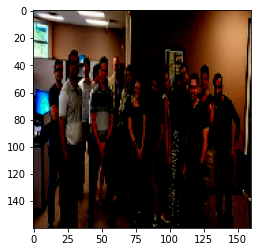

In [30]:
plt.imshow(pic['pic']);

In [31]:
pic['hashtag'], pic['deep_features'].shape, pic['pic'].shape

('Employee Image', (1280,), TensorShape([160, 160, 3]))

#Building our ALS Model
###In order to appreciably populate a fresh post with new hashtags, we need more than just the singular hashtag that a categorization approach such as our neural network can provide. ALS provides a solution through collaborative filtering: essentially the idea is that if a set of posts all have the same few hashtags in common and a bunch of other unique hashtags, the hashtags that are unique to those posts can probably be applied to all of them. In practice this works uncannily well and is the basis of many modern recommendation systems--remember seeing "People who bought this also bought..."?
In addition to supplementing our cold start solution, ALS can add new hashtags to images that already have them in much the same way that it can sell new products to users that have already bought things. So if any image has no hashtags at all or just doesn't have as many as we want it to have yet, we can add more to it either way.

In [32]:
spark = SparkSession.builder.master('local').getOrCreate()

In [33]:
# hashtag_rec_data.shape

(53116, 3)

In [34]:
# hashtag_rec_data.tail()

,image_id,hashtag_id,rating
53111,9298,25,1
53112,9298,20,1
53113,9298,23,1
53114,9298,21,1
53115,9298,26,1


In [89]:
# type(hashtag_rec_data)

pandas.core.frame.DataFrame

In [33]:
als = ALS(userCol='image_id',
          itemCol='hashtag_id',
          implicitPrefs=True,
          alpha=40)

als.setSeed(0)

hashtag_spark_df = spark.createDataFrame(hashtag_rec_data)
als_model = als.fit(hashtag_spark_df)


In [34]:
hashtag_rec_data = []
for i in metadata_df.index:
    hashtag_list = metadata_df.loc[i, 'Keywords']
    for hashtag in hashtag_list:
        hashtag_rec_data.append(
            {'image_id': i,
             'hashtag_id': hashtag_lookup[hashtag],
             'rating': 1}
        )
hashtag_rec_data = pd.DataFrame(hashtag_rec_data)
hashtag_rec_data.tail()

,image_id,hashtag_id,rating
64076,8911,28,1
64077,8911,29,1
64078,8911,25,1
64079,8911,24,1
64080,8911,26,1


In [62]:
recs = als_model.recommendForAllUsers(numItems=100).toPandas()
recs.tail()

,image_id,recommendations
8891,6438,"[(12, 0.9725444912910461), (1, 0.9684848189353..."
8892,6638,"[(24, 0.9865080118179321), (28, 0.982079148292..."
8893,89,"[(53, 0.9973416924476624), (57, 0.976091742515..."
8894,6819,"[(0, 0.9773290157318115), (1, 0.96908545494079..."
8895,7999,"[(14, 0.8935960531234741), (51, 0.619129240512..."


In [63]:
hashtag_index = list(use_category_name)
def lookup_hashtag(hashtag_id):
    return hashtag_index[hashtag_id]

def lookup_hashtag_recs(rec_scores):
    return [lookup_hashtag(rec) for (rec, score) in rec_scores]

In [64]:
recs['recommended_hashtags'] = recs['recommendations'].apply(lookup_hashtag_recs)
recs.index = recs['image_id']
recs = recs.join(metadata_df, how='left')[['recommendations',
                                                 'recommended_hashtags',
                                                 'Keywords',
                                                 'Record ID',
                                                 'Search_Keywords']]

In [65]:
recs.drop('recommendations', axis=1, inplace=True)
image_factors = als_model.userFactors.toPandas()
image_factors.index = image_factors['id']
recs.join(image_factors);


In [66]:
recs_deep = recs.join(pics, on='Record ID', how='inner')
recs_deep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 1580 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   recommended_hashtags  6499 non-null   object
 1   Keywords              6499 non-null   object
 2   Record ID             6499 non-null   int64 
 3   Search_Keywords       6499 non-null   object
 4   pic                   6499 non-null   object
 5   hashtag               6499 non-null   object
 6   name                  6499 non-null   int64 
 7   deep_features         6499 non-null   object
dtypes: int64(2), object(6)
memory usage: 457.0+ KB


In [67]:
hashtags_df = pd.DataFrame.from_dict(hashtag_lookup, orient='index')
hashtags_df.head()

,0
People @ Work,0
Events,1
44th Floor,2
Texas,3
Hearst Magazines,4


In [68]:
hashtags_df = hashtags_df.reset_index()
hashtags_df.columns = ['hashtag', 'id']
hashtags_df.index = hashtags_df['id']
hashtags_df.drop('id', axis=1, inplace=True)
hashtags_df.head()

,hashtag
id,
0,People @ Work
1,Events
2,44th Floor
3,Texas
4,Hearst Magazines


In [69]:
img_features = als_model.userFactors.toPandas()
hashtag_features = als_model.itemFactors.toPandas()

In [70]:
# Only use certain columns
recs_deep_clean = recs_deep[['Record ID', 'Keywords', 'deep_features']]

img_features.index = img_features['id']
img_features.drop(['id'], axis=1)

# Add image feature into dataframe
recommender_df = recs_deep_clean.join(img_features, how='inner')
recommender_df.head()

,Record ID,Keywords,deep_features,id,features
1580,208707853,"[Photography, 2021, Headshots, Hearst Televisi...","[0.008831677, 0.0, 0.7844242, 0.8746388, 0.0, ...",1580,"[0.8885645866394043, -0.026053790003061295, -0..."
4900,207913700,"[Hearst Magazines, Spotlight 2019, 44th Floor,...","[0.0, 0.19181913, 0.4988789, 0.6576313, 0.4324...",4900,"[0.760493278503418, 1.8382158279418945, -1.216..."
5300,207905657,"[People @ Work, Texas 2019, 2019, Friday, Texa...","[0.701524, 0.55246234, 0.15457527, 2.4325135, ...",5300,"[-0.6556178331375122, 0.4910915791988373, -1.0..."
471,208782976,"[Alfred E. Smith Memorial Foundation Dinner, C...","[1.6710511, 0.20942925, 0.002399773, 0.8078527...",471,"[-0.30629509687423706, -0.398790180683136, -0...."
1591,208708726,"[People @ Work, Corporate, Tower Tuesdays, Tow...","[0.14359295, 0.0, 0.16376142, 0.0, 0.0, 0.0172...",1591,"[0.8736164569854736, 0.10187200456857681, 0.50..."


#Generating Hashtags for New Images
###Collaborative filtering methods such as ALS are extremely effective, but as previously mentioned they are limited in that they assume you have at least some information about each thing you are recommending for. This is the cold start problem.
###A conventional solution to the cold start problem might be to average the feature vectors for every single user (or in this case, image) in the dataset so far. Intuitively we would expect this to lead to recommending products or hashtags with broad and popular appeal, which is a good and safe option.
###However, recommending hashtags for images is an unusual problem and gives us unusual opportunities. We decided to generate a deep features vector for each new image, find the 5 most similar images in our dataset based (based on cosine vector similarity), and base our hashtag recommendations off of the hashtags of those 5 most similar images. Next steps in iteratively improving this model would include cross-validating against different approaches, such as using the NN to generate a first hashtag and then proceeding with the normal collaborative filtering approach.

In [71]:
# Function that finds k nearest neighbors by cosine similarity
def find_neighbor_vectors(image_path, k=100, recommender_df=recommender_df):
    """Find image features (user vectors) for similar images."""
    prep_image = prepare_image(image_path, where='local')
    pics = extract_features(prep_image, neural_network)
    rdf = recommender_df.copy()
    rdf['dist'] = rdf['deep_features'].apply(lambda x: cosine(x, pics))
    rdf = rdf.sort_values(by='dist')
    return rdf.head(k)

In [82]:
def generate_hashtags(image_path):
    fnv = find_neighbor_vectors(image_path, k=100, recommender_df=recommender_df)
    # Find the average of the 5 user features found based on cosine similarity.
    features = []
    for item in fnv.features.values:
        features.append(item)

    avg_features = np.mean(np.asarray(features), axis=0)
    
    # Add new column to the hashtag features which will be the dot product with the average image(user) features
    hashtag_features['dot_product'] = hashtag_features['features'].apply(lambda x: np.asarray(x).dot(avg_features))

    # Find the 10 hashtags with the highest feature dot products
    final_recs = hashtag_features.sort_values(by='dot_product', ascending=False).head(10)
    # Look up hashtags by their numeric IDs
    output = []
    for hashtag_id in final_recs.id.values:
        output.append(hashtags_df.iloc[hashtag_id]['hashtag'])
    return output

In [73]:
def show_results(test_image):
    img = mpimg.imread(f'images/{test_image}.jpg')
    plt.figure(figsize=(9, 9))
    plt.title(f'Original Hashtag: {test_image.upper()}', fontsize=32)        
    plt.imshow(img)
    
    recommended_hashtags = generate_hashtags(f'images/{test_image}.jpg')
    print(', '.join(recommended_hashtags))

In [48]:
test_dataset = metadata_df.iloc[6501:]

In [49]:
test_dataset= test_dataset.reset_index(drop=True)

In [ ]:
# cond = test_dataset['Record ID'].isin(remove_id['Record ID'])
# test_dataset.drop(test_dataset[cond].index, inplace = True)

In [75]:
def testing_dataset():
  accuracy_list =[]
  for item in range(len(test_dataset["Record ID"])):
    test_image =test_dataset["Record ID"][item]
    test_image_tags =test_dataset["Keywords"][item]
    # img = mpimg.imread(f'test/{test_image}.jpg')
    recommended_hashtags = generate_hashtags(f'images/{test_image}.jpg')
    res_images  = [x for x in test_image_tags if x in recommended_hashtags]
    # res_consol = [test_image_tags,recommended_hashtags,res_images,len(res_images)]
    accuracy_list.append(len(res_images))
  return accuracy_list

In [133]:
# test_dataset = test_dataset.reset_index(drop=True)

In [51]:
test_dataset["Record ID"][530:535]

530    207889689
531    207889691
532    207889693
533    207889694
534    207889695
Name: Record ID, dtype: int64

In [52]:
test_acc = testing_dataset()

In [49]:
test_acc

list

In [64]:
# test_dataset["Keywords"][6502]
# test_dataset = test_dataset.reset_index(drop =True)

In [151]:
acc_lst = []
for item in test_acc:
  acc_lst.append(item[3])

In [53]:
# len(acc_lst)
sum(test_acc)/(5*len(test_acc))

0.6182045929018789

People @ Work, Events, Masterclass, Headshots, Portraits, Joseph Urban Theater, 2017, 44th Floor, David Carey, 2016


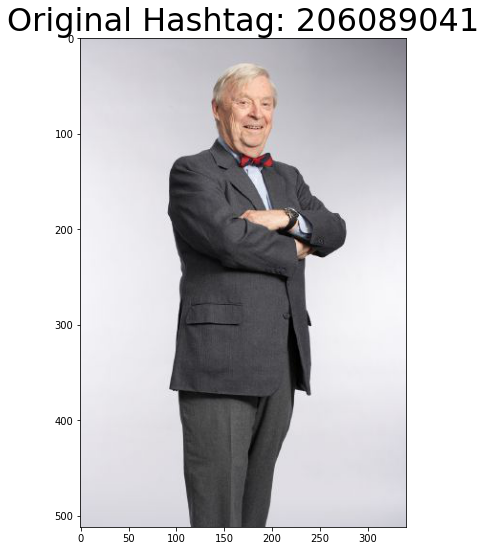

In [55]:
show_results('206089041')

In [58]:
metadata_images[metadata_images["Record ID"]==206088961]["Keywords"].values

array(['Frank Bennack,FAB,MAC,GCM,Michael A. Clinton,Frank A. Bennack,Victor Ganzi,Events,Michael Clinton,Cathie Black,Gilbert C. Maurer,Gil Maurer,Hearst Tower,gala'],
      dtype=object)

Events, People @ Work, 44th Floor, FAB, Frank Bennack


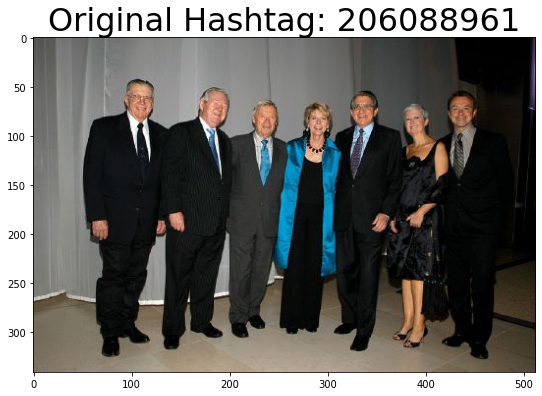

In [76]:
show_results('206088961')

In [59]:
metadata_images[metadata_images["Record ID"]==206145830]["Keywords"].values

array(['Frank A. Bennack,Frank Bennack,Headshots,FAB,Portraits'],
      dtype=object)

People @ Work, Events, 44th Floor, 2013, FAB, Frank Bennack, Frank A. Bennack, The Long Gray Line, Homecoming, GCM


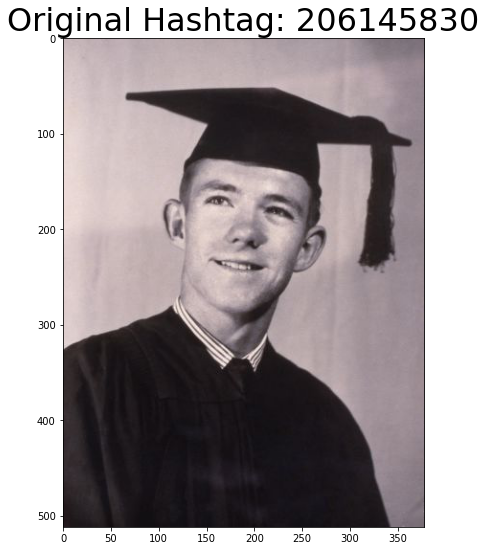

In [83]:
show_results('206145830')

In [79]:
metadata_images[metadata_images["Record ID"]==206293089]["Keywords"].values

array(['Hearst Family,Headshots,Portraits'], dtype=object)

Events, People @ Work, 2018, Texas 2018, Retreat, Friday, Texas, Thursday, 44th Floor, SRS


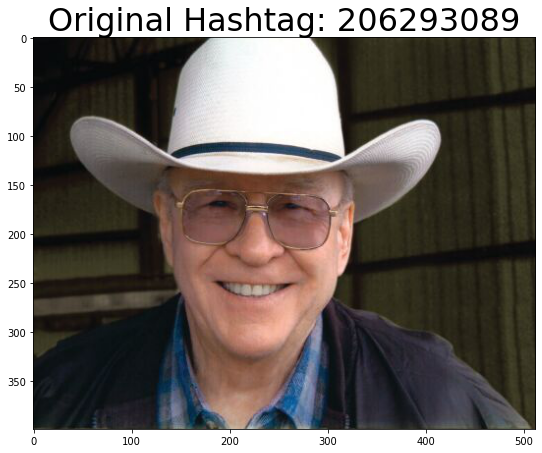

In [84]:
show_results('206293089')

In [85]:
metadata_images[metadata_images["Record ID"]==207386253]["Keywords"].values

array(['Hearst Family,135,Headshots,Portraits'], dtype=object)

Events, People @ Work, 44th Floor, Homecoming, The Long Gray Line, 2013, FAB, Frank Bennack, Frank A. Bennack, GCM


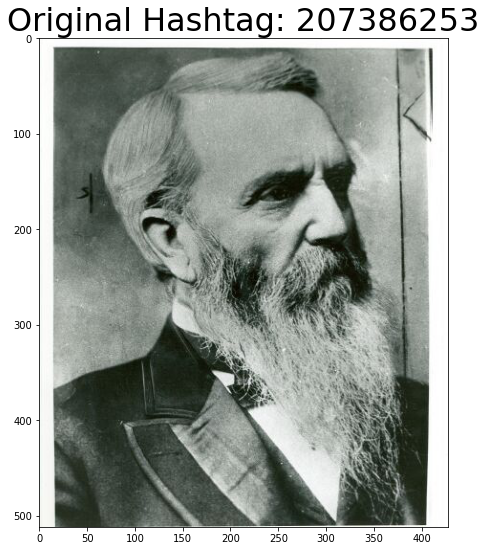

In [86]:
show_results('207386253')

In [ ]:
metadata_images[metadata_images["Record ID"]==206145830]["Keywords"].values

In [ ]:
show_results('207386253')

In [87]:
metadata_images["Record ID"][6502:6512]

6502    207900891
6503    207900892
6504    207900893
6505    207900894
6506    207900895
6507    207900896
6508    207900897
6509    207900898
6510    207900899
6511    207900900
Name: Record ID, dtype: int64

In [93]:
metadata_images[metadata_images["Record ID"]==207900891]["Keywords"].values

array(['People @ Work,2018,Events,Friday,Texas,Texas 2018,Retreat'],
      dtype=object)

Events, People @ Work, Texas, Thursday, 2018, Texas 2018, Retreat, Friday, SRS, Steven R. Swartz


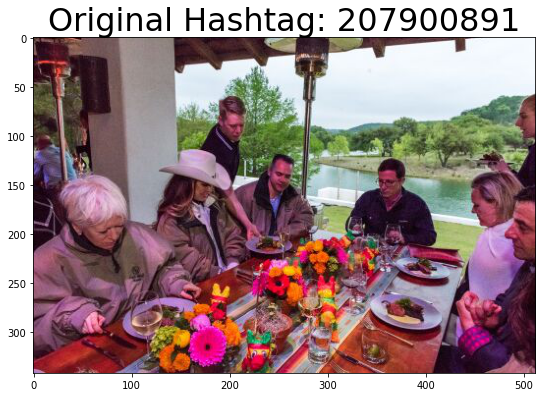

In [92]:
show_results('207900891')

In [94]:
metadata_images[metadata_images["Record ID"]==207900895]["Keywords"].values

array(['People @ Work,2018,Events,Friday,Texas,Texas 2018,Retreat'],
      dtype=object)

Events, People @ Work, 2018, Texas, Friday, Thursday, Retreat, Texas 2018, 44th Floor, 2016


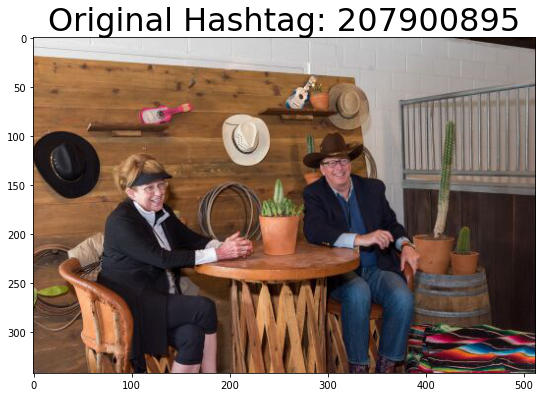

In [96]:
show_results('207900895')